<a href="https://colab.research.google.com/github/dmunozbe/TFM_DataScience/blob/main/Preanalisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploración de datos**

1. [Importar bibliotecas](#Importar-bibliotecas)
2. [Carga de datos](#Carga-de-datos)




**Forecasting** es el proceso de predecir eventos futuros basados en patrones históricos y datos existentes.

El objetivo principal es el de hacer predicciones precisas sobre el futuro utilizando datos pasados y presentes y se utiliza en una amplia variaedad de constextos, como en finanzas, meteorologia, ventas entre otros

##Importar bibliotecas

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import metrics


import warnings
warnings.filterwarnings("ignore")

##Carga de datos

In [ ]:
# Cargar datos
data = pd.read_csv('/content/drive/MyDrive/UOC/TFM/Datasets definitivos/Final.csv')
data.head()

Any  Trimestre  Mes  Codi_Districte Nom_Districte  Codi_Barri Nom_Barri  \
0  2014          1    1               1  Ciutat Vella           1  el Raval   
1  2014          1    2               1  Ciutat Vella           1  el Raval   
2  2014          1    3               1  Ciutat Vella           1  el Raval   
3  2014          2    4               1  Ciutat Vella           1  el Raval   
4  2014          2    5               1  Ciutat Vella           1  el Raval   

   Compraventa_Unitario  ParadosReg  Estudios_Obligatorios  ConsumResidencial  \
0                2813.0        4588                    NaN                NaN   
1                2813.0        4539                    NaN                NaN   
2                2813.0        4572                    NaN                NaN   
3                2948.8        4510                    NaN                NaN   
4                2948.8        4379                    NaN                NaN   

   Pm25  Pm10  Participacion  AñosEspVida  Internet  Movil  Index_Turisme  \
0   NaN   NaN           41.8         80.7       NaN    NaN            NaN   
1   NaN   NaN           41.8         80.7       NaN    NaN            NaN   
2   NaN   NaN           41.8         80.7       NaN    NaN            NaN   
3   NaN   NaN           41.8         80.7       NaN    NaN            NaN   
4   NaN   NaN           41.8         80.7       NaN    NaN            NaN   

   m² por habitante  
0               6.2  
1               6.2  
2               6.2  
3               6.2  
4               6.2

In [ ]:
print(data.dtypes)

Any                        int64
Trimestre                  int64
Mes                        int64
Codi_Districte             int64
Nom_Districte             object
Codi_Barri                 int64
Nom_Barri                 object
Compraventa_Unitario     float64
ParadosReg                 int64
Estudios_Obligatorios    float64
ConsumResidencial        float64
Pm25                     float64
Pm10                     float64
Participacion            float64
AñosEspVida              float64
Internet                 float64
Movil                    float64
Index_Turisme            float64
m² por habitante         float64
dtype: object


##Preparacion de los datos

Ahora comprobamos cuantos valores NaN alberga el dataframe

In [ ]:
data.isnull().sum()

Any                         0
Trimestre                   0
Mes                         0
Codi_Districte              0
Nom_Districte               0
Codi_Barri                  0
Nom_Barri                   0
Compraventa_Unitario        0
ParadosReg                  0
Estudios_Obligatorios    2409
ConsumResidencial        4380
Pm25                     4161
Pm10                     4161
Participacion               0
AñosEspVida              3573
Internet                 2409
Movil                    2409
Index_Turisme            5913
m² por habitante         1533
dtype: int64

El objetivo principal del TFM es analizar el valor de compraventa en la ciudad de Barcelona a partir de los indicadores de la ISO 37120.

Como serie temporal principal tenemos el valor de compraventa unitario por barrio desde 2014 hasta 2023 y por otro lado, tenemos las diferentes series temporales que corresponden a los indicadores.

Como se puede observar muchos de los indicadores obtenidos, tienen valores NaN. Esto se debe a que no hemos obtenido datos en el mismo rango de fechas que la serie principal. Este hecho limita el analisis de datos de forma global, ya que cada indicador tiene su casuistica.

Es por ello que se tendra que realizar el analisis por grupos de indicadores.

*   Paro
*   Estudios
*   Consumo de energia
*   Contaminacion
*   Participacion electoral
*   Esperanza de vida
*   Tecnologia
*   Indice Motor
*   Zonas Verdes

En un principio el estudio se realizara para toda la ciudad de Barcelona.

In [ ]:
# Creamos la variable de fecha de la siguiente manera:
# Agregar un día fijo para cada mes, por ejemplo, el día 1
data['Fecha'] = pd.to_datetime(data['Any'].astype(str) + '-' + data['Mes'].astype(str) + '-1')

In [ ]:
# Modificamos el indice del dataset por la fecha
data = data.set_index('Fecha')

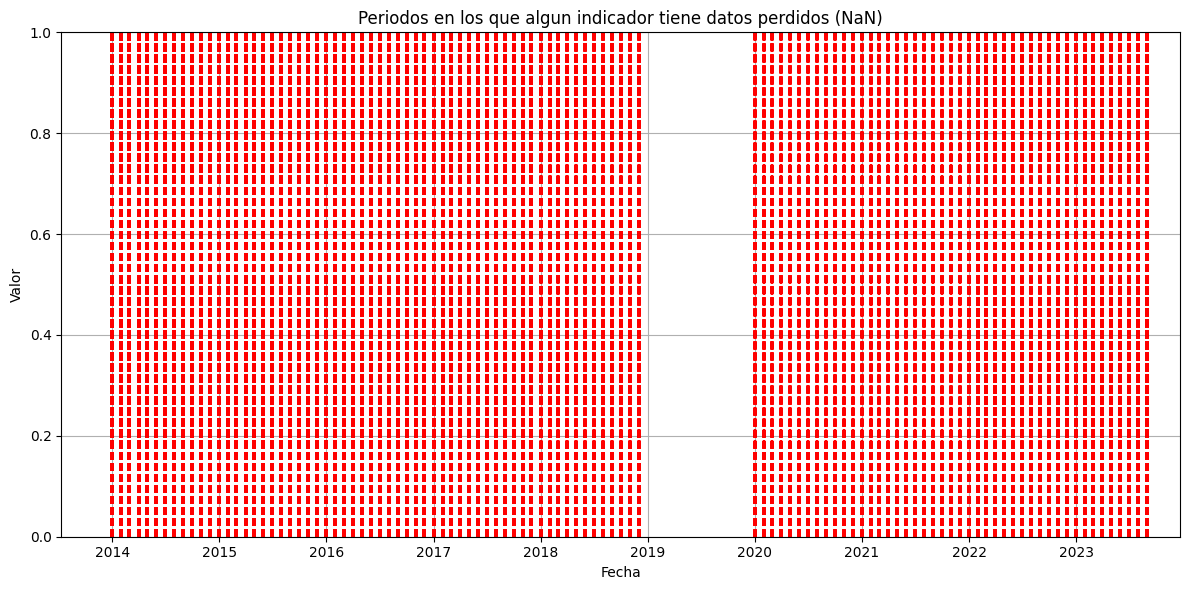

In [ ]:
# Graficar las series temporales
plt.figure(figsize=(12, 6))

# Resaltar los periodos donde hay datos en cada serie temporal
for column in data.columns:
    missing_periods = data[data[column].isnull()].index
    for period in missing_periods:
        plt.axvline(x=period, color='red', linestyle='--', label='Datos faltantes' if column == 'Serie1' else '')

plt.title('Periodos en los que algun indicador tiene datos perdidos (NaN)')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)
plt.tight_layout()

# Colocar la leyenda fuera del gráfico
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Viendo el resultado, concluimos que el unico periodo que contiene valores para todos los indicadores es el periodo comprendido entre 2019 y 2020. El resto de años contiene para algun indicador valores perdidos.

## Exploracion de pares de datos

###Compraventa Unitario vs indicador nº1. Paro

In [ ]:
df_paro = data[['Any', 'Trimestre', 'Mes', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Compraventa_Unitario', 'ParadosReg']]

In [ ]:
df_paro.head()

Any  Trimestre  Mes  Codi_Districte Nom_Districte  Codi_Barri  \
Fecha                                                                        
2014-01-01  2014          1    1               1  Ciutat Vella           1   
2014-02-01  2014          1    2               1  Ciutat Vella           1   
2014-03-01  2014          1    3               1  Ciutat Vella           1   
2014-04-01  2014          2    4               1  Ciutat Vella           1   
2014-05-01  2014          2    5               1  Ciutat Vella           1   

           Nom_Barri  Compraventa_Unitario  ParadosReg  
Fecha                                                   
2014-01-01  el Raval                2813.0        4588  
2014-02-01  el Raval                2813.0        4539  
2014-03-01  el Raval                2813.0        4572  
2014-04-01  el Raval                2948.8        4510  
2014-05-01  el Raval                2948.8        4379

In [ ]:
df_paro.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8541 entries, 2014-01-01 to 2023-09-01
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Any                   8541 non-null   int64  
 1   Trimestre             8541 non-null   int64  
 2   Mes                   8541 non-null   int64  
 3   Codi_Districte        8541 non-null   int64  
 4   Nom_Districte         8541 non-null   object 
 5   Codi_Barri            8541 non-null   int64  
 6   Nom_Barri             8541 non-null   object 
 7   Compraventa_Unitario  8541 non-null   float64
 8   ParadosReg            8541 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 667.3+ KB


In [ ]:
# Calcular la media de 'Compraventa_Unitario' agrupada por categoría, año y mes
media_compraventa = df_paro.groupby(['Codi_Districte', 'Nom_Districte','Any', 'Mes'])['Compraventa_Unitario'].mean().reset_index()

In [ ]:
# Calcular la suma de 'ParadosReg' agrupada por categoría
suma_parados = df_paro.groupby(['Codi_Districte', 'Nom_Districte','Any', 'Mes'])['ParadosReg'].sum().reset_index()

In [ ]:
# Unimos los dos dataframes
df_merged = pd.merge(media_compraventa, suma_parados, how='inner', left_on=['Codi_Districte',	'Nom_Districte',	'Any',	'Mes'], right_on=['Codi_Districte',	'Nom_Districte',	'Any',	'Mes'])

In [ ]:
# Añadimos la columna de fecha y la establecemos como indice
df_merged['Fecha'] = df_merged.apply(lambda row: pd.to_datetime(f"{row[2]}-{row[3]}"), axis=1)
df_merged.set_index('Fecha', inplace=True)

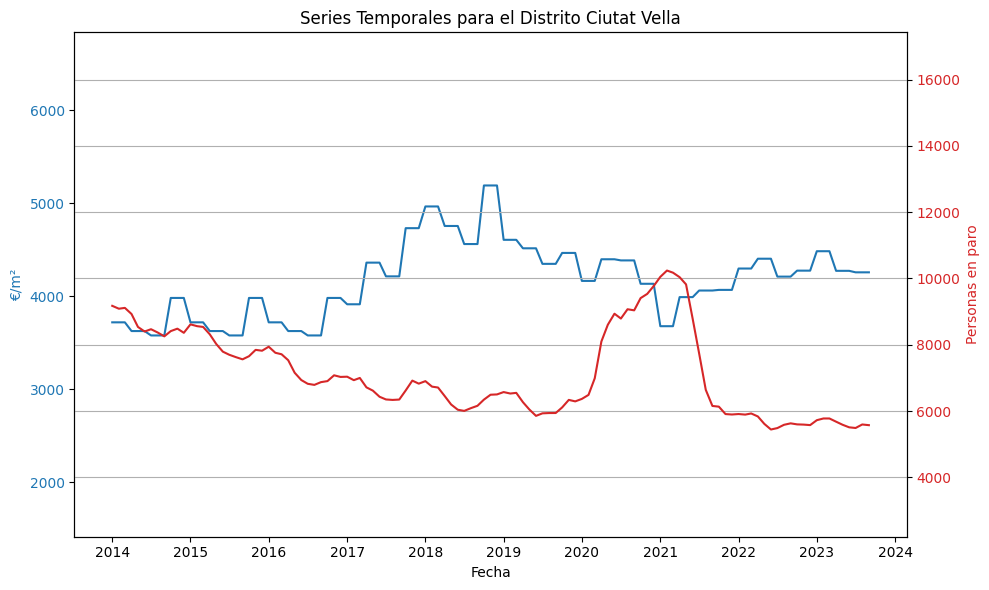

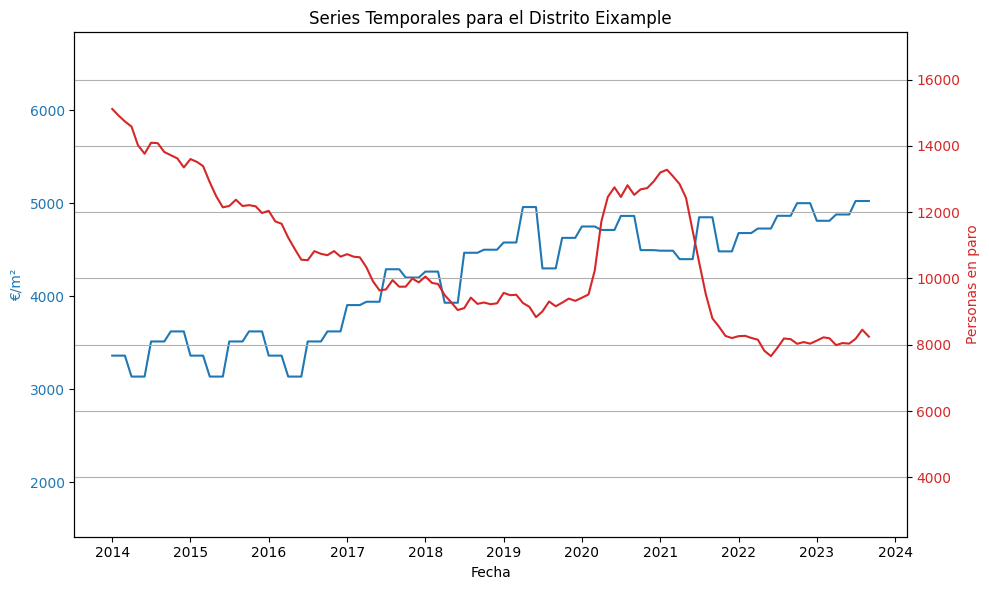

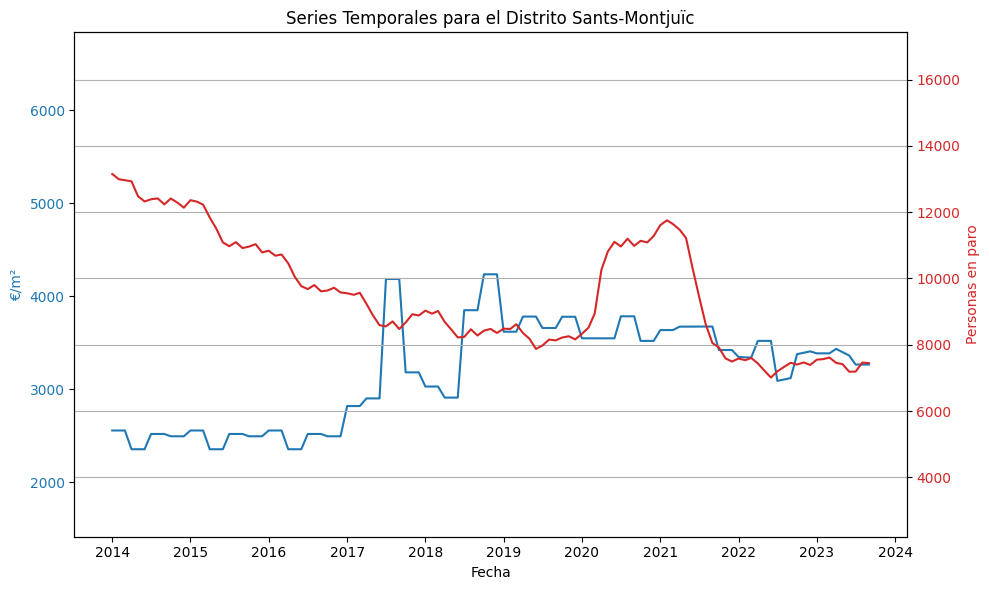

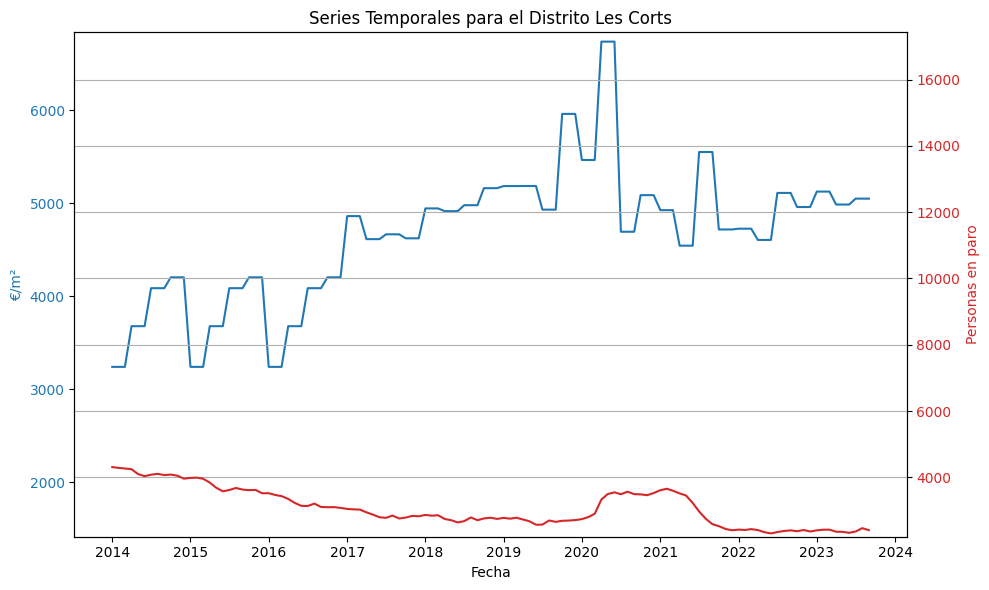

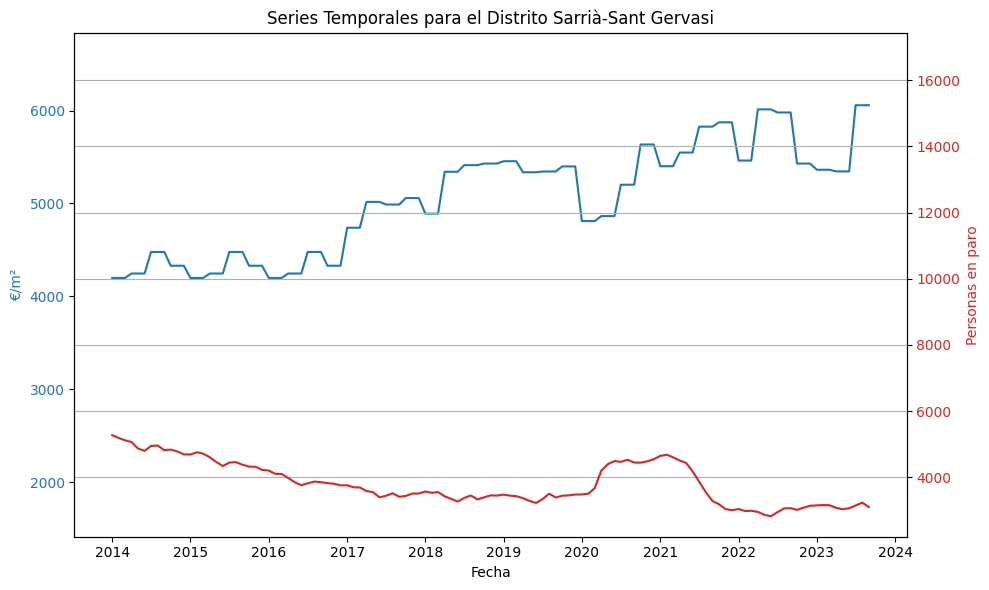

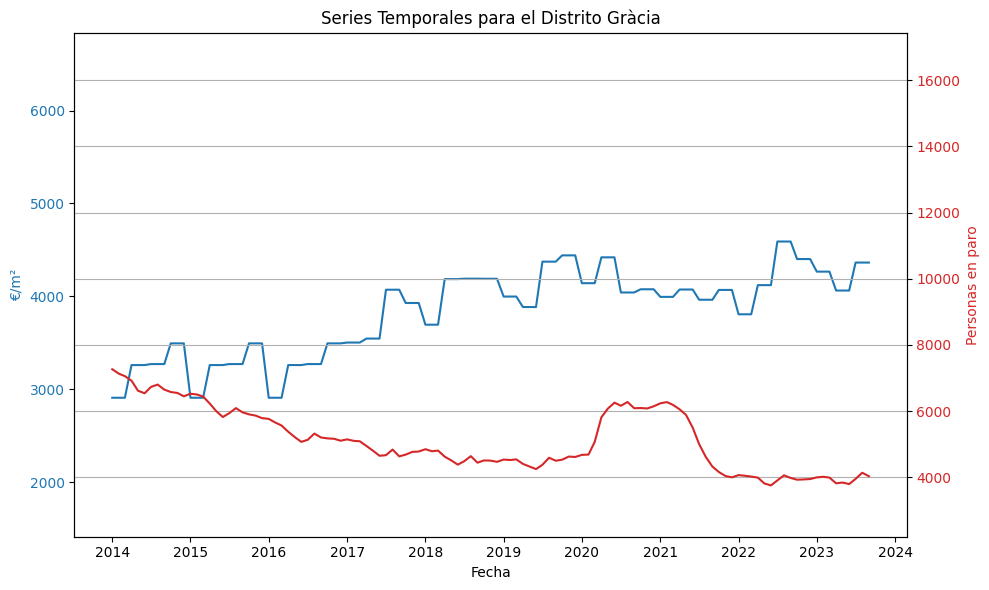

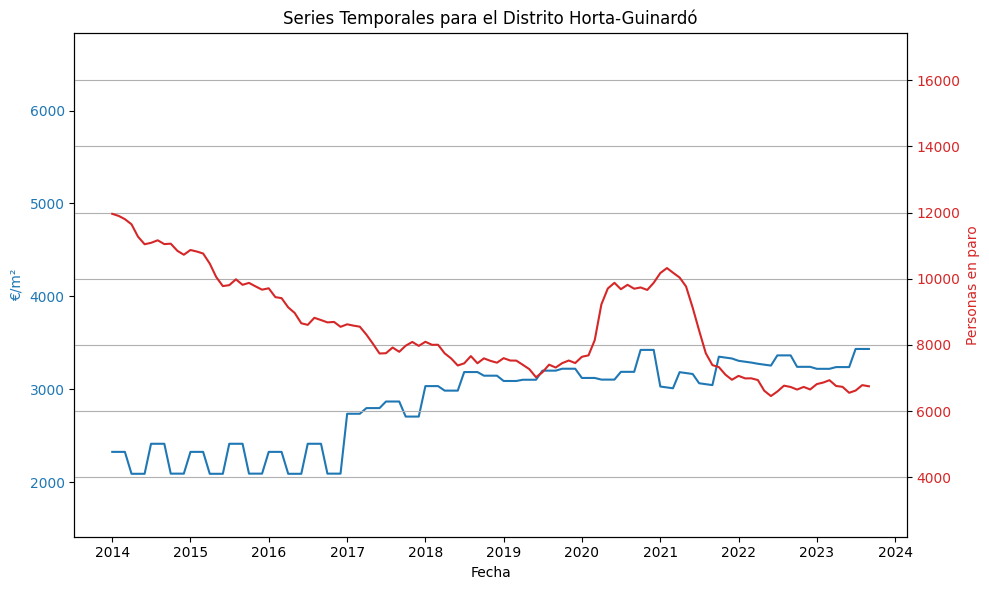

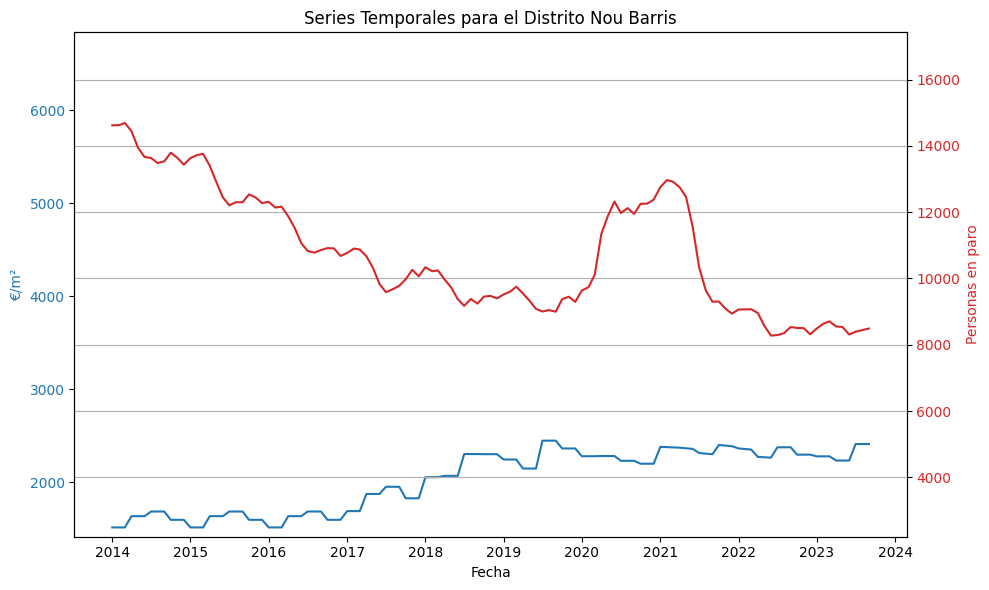

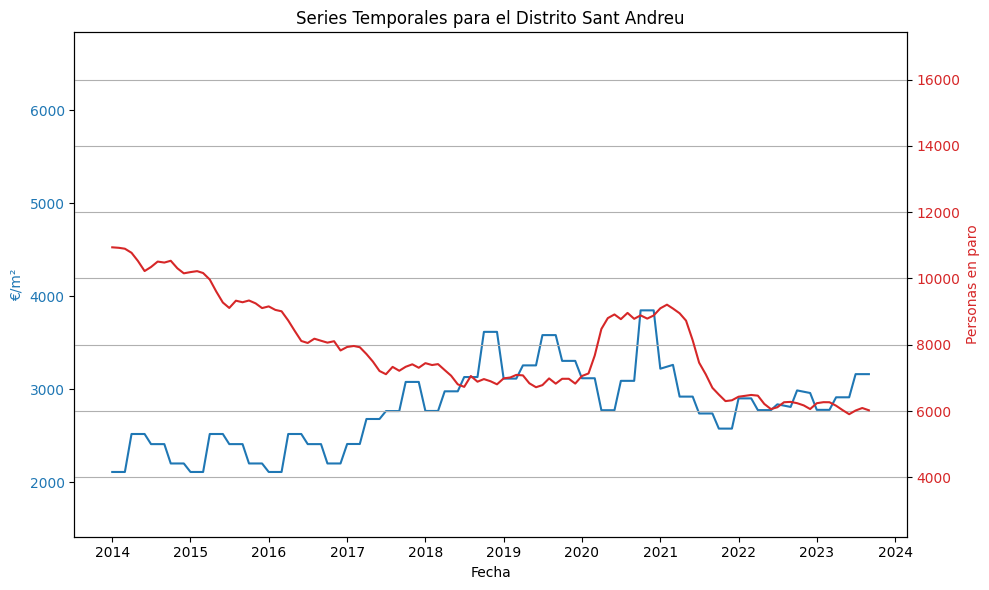

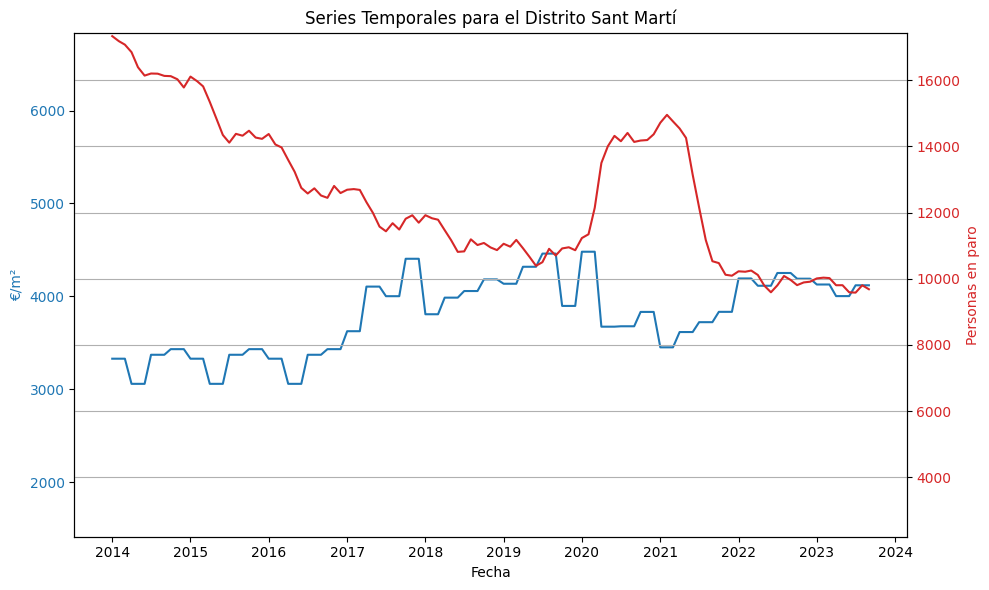

In [ ]:
# Establecer límites para los ejes y
ylim_serie1 = (df_merged['Compraventa_Unitario'].min()-100, df_merged['Compraventa_Unitario'].max()+100)  # Límites para Serie1
ylim_serie2 = (df_merged['ParadosReg'].min()-100, df_merged['ParadosReg'].max()+100)  # Límites para Serie2

#Crear un gráfico para la media de 'Compraventa_Unitario' por cada categoría, año y mes
for categoria, datos_categoria in df_merged.groupby(['Codi_Districte', 'Nom_Districte']):
    # Crear una figura y un conjunto de ejes
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Serie1 en el primer eje y (izquierda)
    color1 = 'tab:blue'
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('€/m²', color=color1)
    ax1.plot(datos_categoria.index, datos_categoria['Compraventa_Unitario'], label=f'Media de Compraventa_Unitario', color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.set_ylim(ylim_serie1)  # Establecer límites para Serie1

    # Crear un segundo eje y (derecha) para Serie2
    ax2 = ax1.twinx()
    color2 = 'tab:red'
    ax2.set_ylabel('Personas en paro', color=color2)
    ax2.plot(datos_categoria.index, datos_categoria['ParadosReg'], label=f'Suma de ParadosReg', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)
    ax2.set_ylim(ylim_serie2)  # Establecer límites para Serie2

    # Añadir título y leyendas
    plt.title(f'Series Temporales para el Distrito {categoria[1]}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Independientemente de la escala de las dos variables, en la grafica se puede diferenciar entre la tendencia de valor de compraventas unitario y la tendencia de personas en paro. Mientras que una tiene tendencia al alta en la mayoria de distritos, la otra tiene tendencia a la baja.

Por otro lado los años de pandemia Covid-19, 2020-2021, el paro tiene un acusado cambio de tendencia al alza, mientras que el valor de compraventa unitario parece no inmutarse.

Tambien se puede generalizar que, a valor mas alto de unitario de compraventa, valor mas bajo de personas en paro y viceversa. Podemos observarlo en el distrito de Sarrià-Sant Gervasi y en contraposicion en el distrito de Nou Barris

###Compraventa Unitario vs indicador nº10. Estudios

In [ ]:
df_estudios = data[['Any', 'Trimestre', 'Mes', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Compraventa_Unitario', 'Estudios_Obligatorios']]

In [ ]:
df_estudios.head()

Any  Trimestre  Mes  Codi_Districte Nom_Districte  Codi_Barri  \
Fecha                                                                        
2014-01-01  2014          1    1               1  Ciutat Vella           1   
2014-02-01  2014          1    2               1  Ciutat Vella           1   
2014-03-01  2014          1    3               1  Ciutat Vella           1   
2014-04-01  2014          2    4               1  Ciutat Vella           1   
2014-05-01  2014          2    5               1  Ciutat Vella           1   

           Nom_Barri  Compraventa_Unitario  Estudios_Obligatorios  
Fecha                                                              
2014-01-01  el Raval                2813.0                    NaN  
2014-02-01  el Raval                2813.0                    NaN  
2014-03-01  el Raval                2813.0                    NaN  
2014-04-01  el Raval                2948.8                    NaN  
2014-05-01  el Raval                2948.8                    NaN

In [ ]:
df_estudios.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8541 entries, 2014-01-01 to 2023-09-01
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Any                    8541 non-null   int64  
 1   Trimestre              8541 non-null   int64  
 2   Mes                    8541 non-null   int64  
 3   Codi_Districte         8541 non-null   int64  
 4   Nom_Districte          8541 non-null   object 
 5   Codi_Barri             8541 non-null   int64  
 6   Nom_Barri              8541 non-null   object 
 7   Compraventa_Unitario   8541 non-null   float64
 8   Estudios_Obligatorios  6132 non-null   float64
dtypes: float64(2), int64(5), object(2)
memory usage: 667.3+ KB


In [ ]:
df_estudios=df_estudios.dropna()

In [ ]:
# Calcular la media de 'Compraventa_Unitario' agrupada por categoría, año y mes
media_compraventa = df_estudios.groupby(['Codi_Districte', 'Nom_Districte','Any', 'Mes'])['Compraventa_Unitario'].mean().reset_index()

In [ ]:
# Calcular la media de 'Estudios_Obligatorios' agrupada por categoría
media_estudios = df_estudios.groupby(['Codi_Districte', 'Nom_Districte','Any', 'Mes'])['Estudios_Obligatorios'].mean().reset_index()

In [ ]:
# Unimos los dos dataframes
df_merged = pd.merge(media_compraventa, media_estudios, how='inner', left_on=['Codi_Districte',	'Nom_Districte',	'Any',	'Mes'], right_on=['Codi_Districte',	'Nom_Districte',	'Any',	'Mes'])

In [ ]:
# Añadimos la columna de fecha y la establecemos como indice
df_merged['Fecha'] = df_merged.apply(lambda row: pd.to_datetime(f"{row[2]}-{row[3]}"), axis=1)
df_merged.set_index('Fecha', inplace=True)

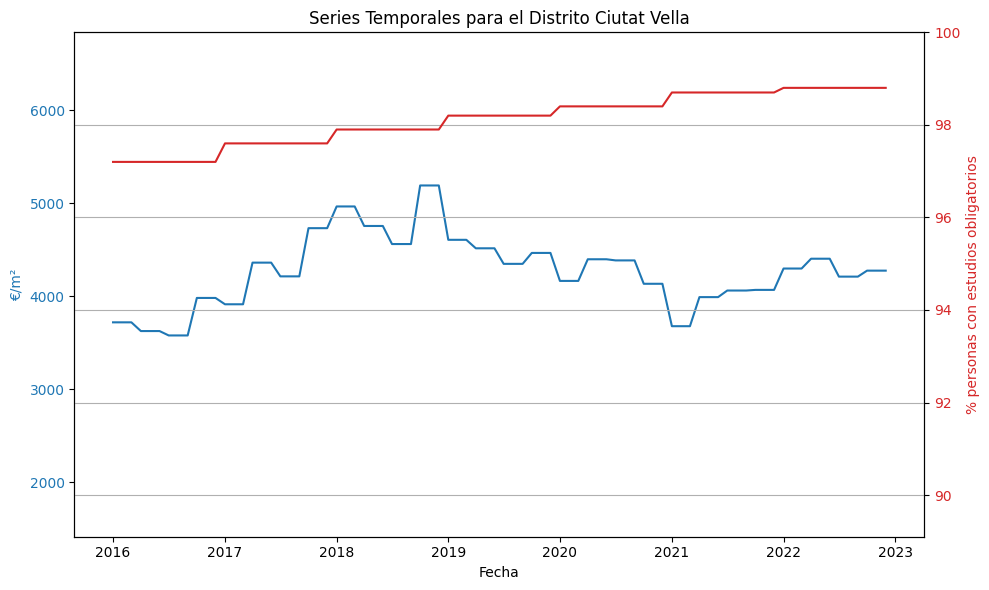

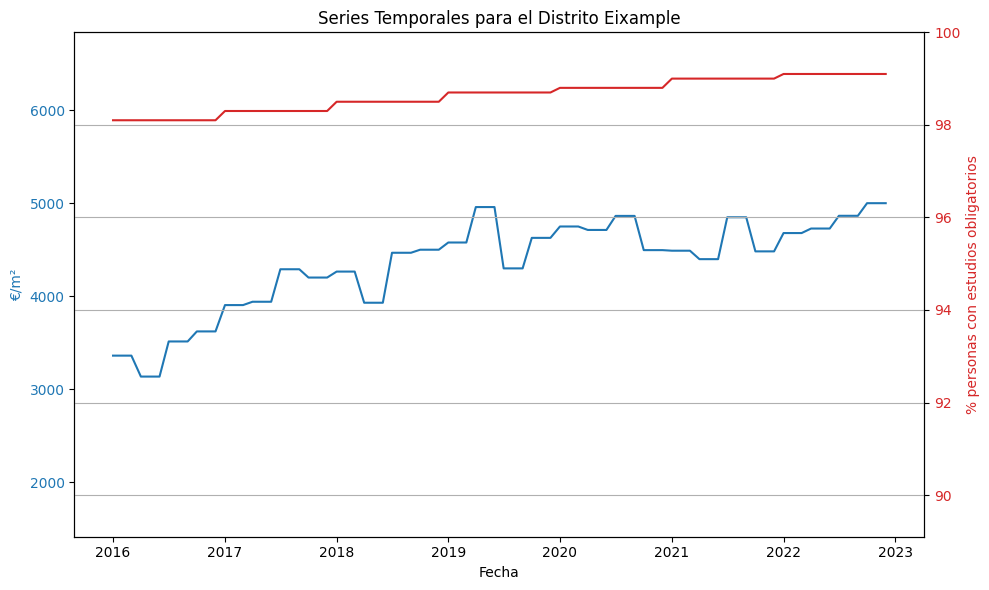

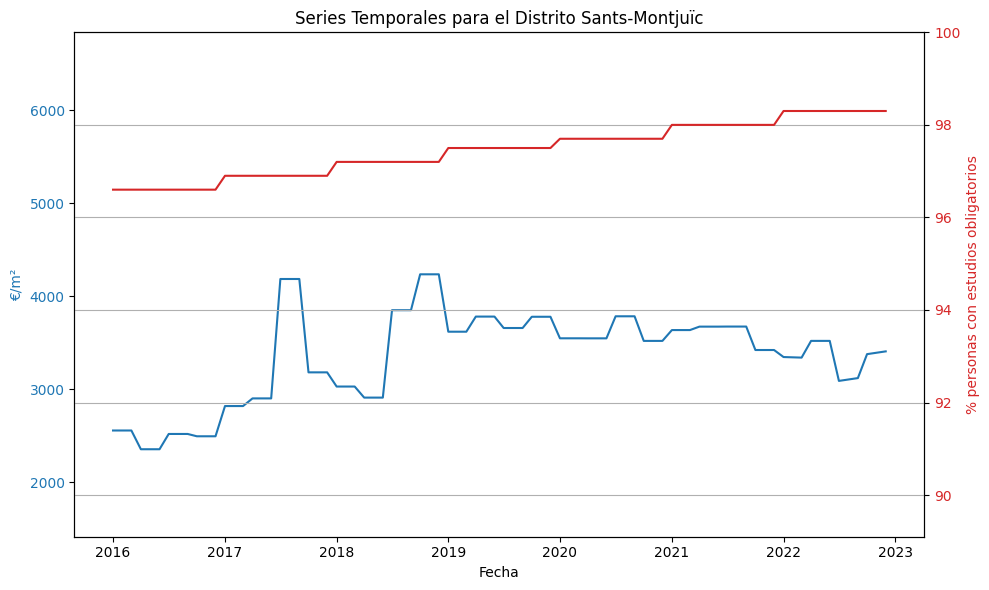

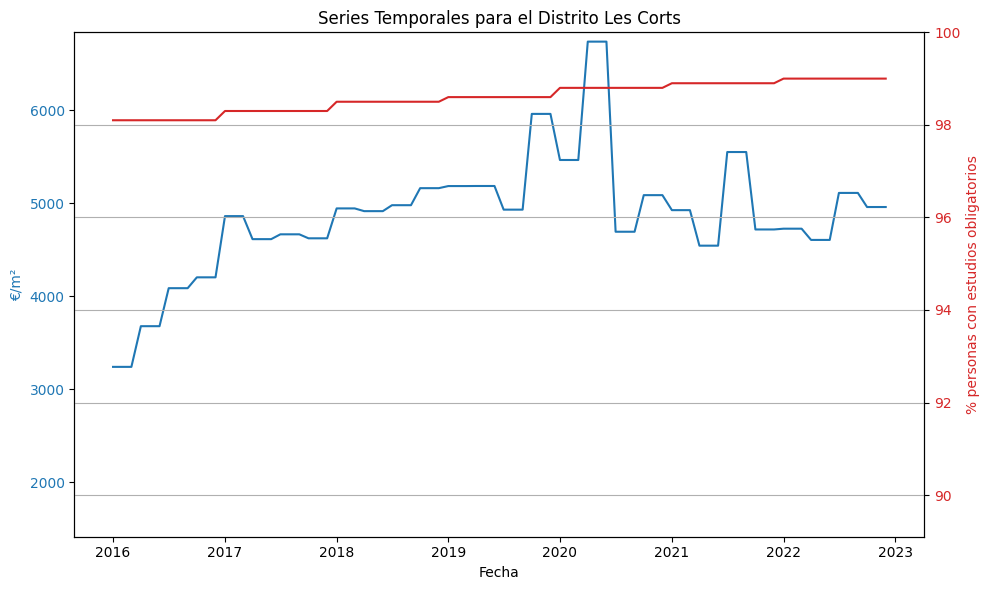

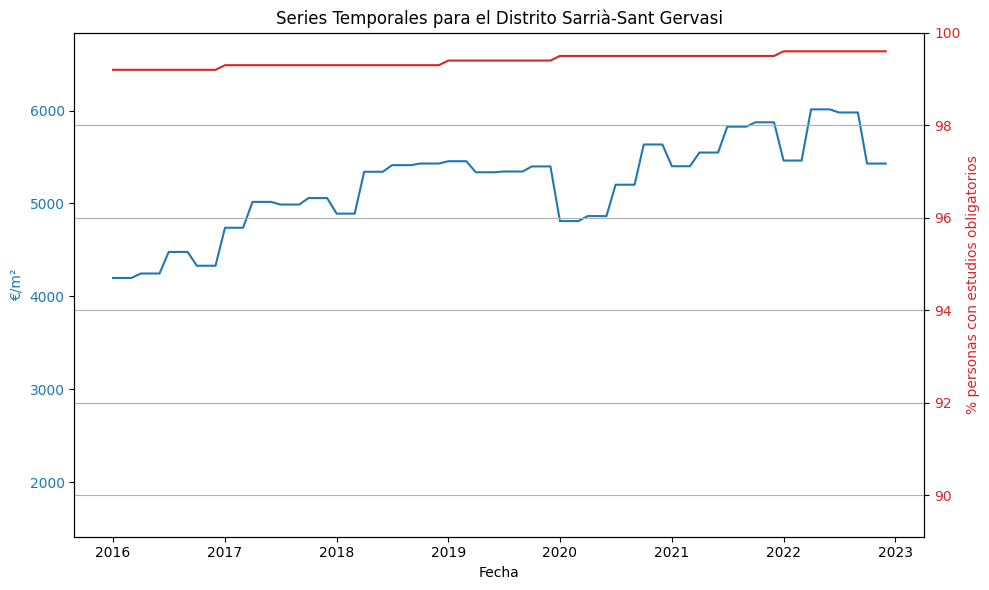

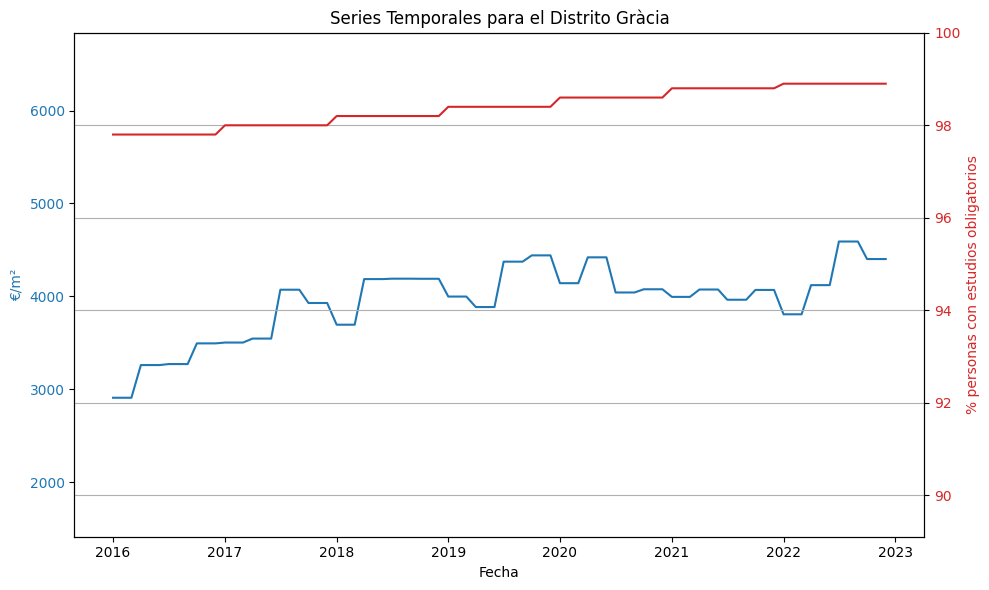

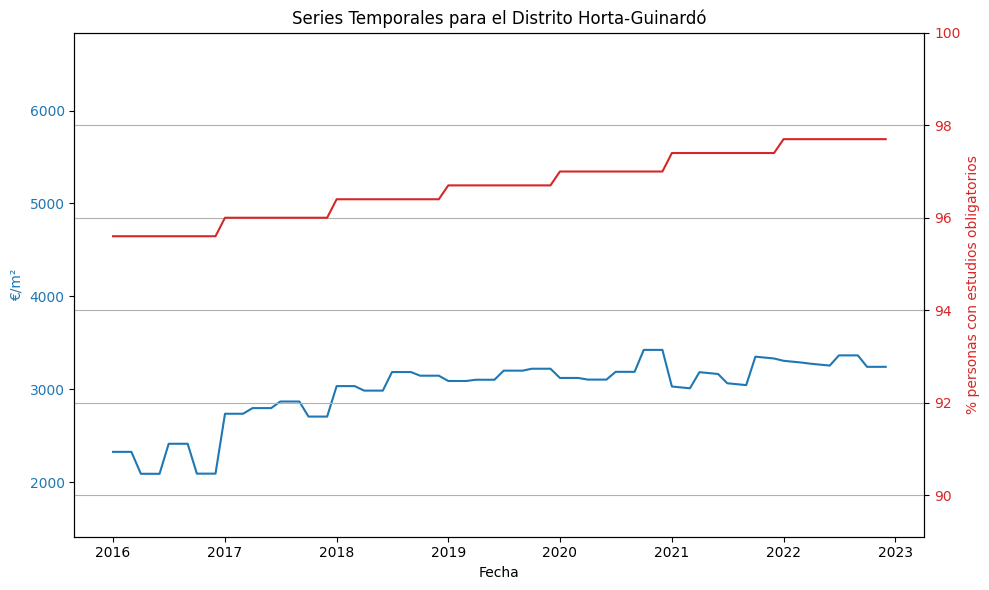

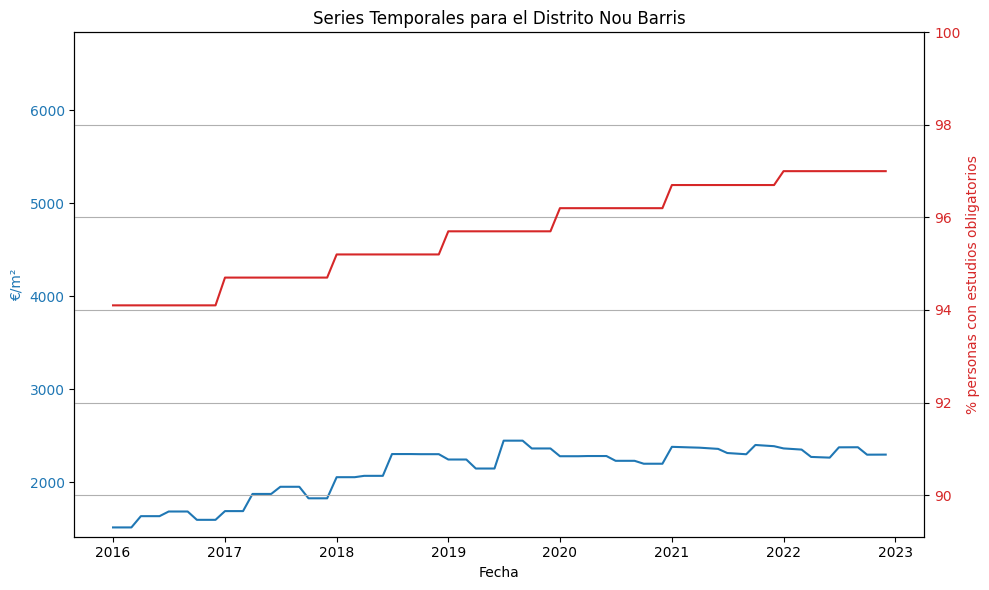

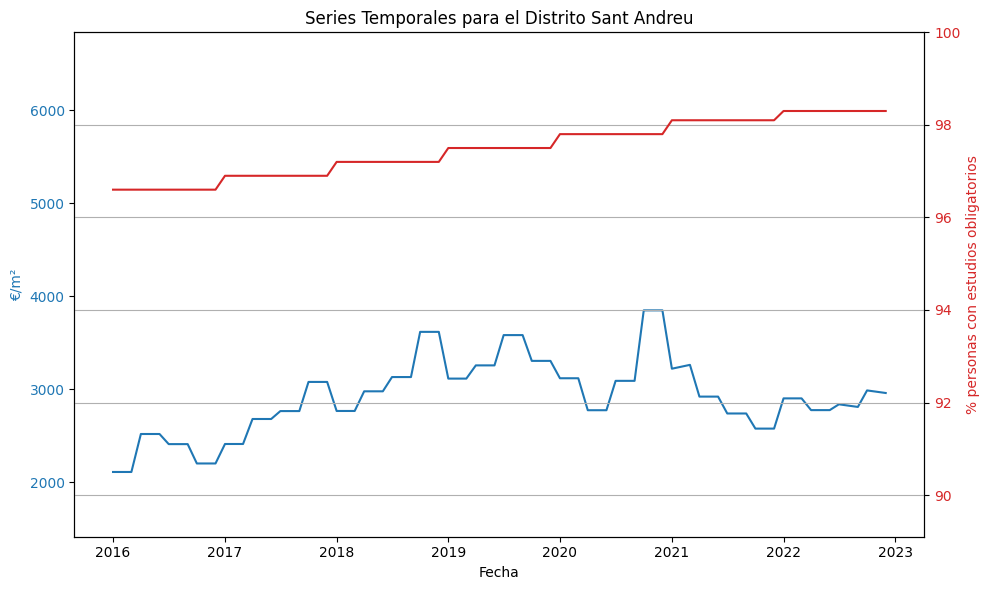

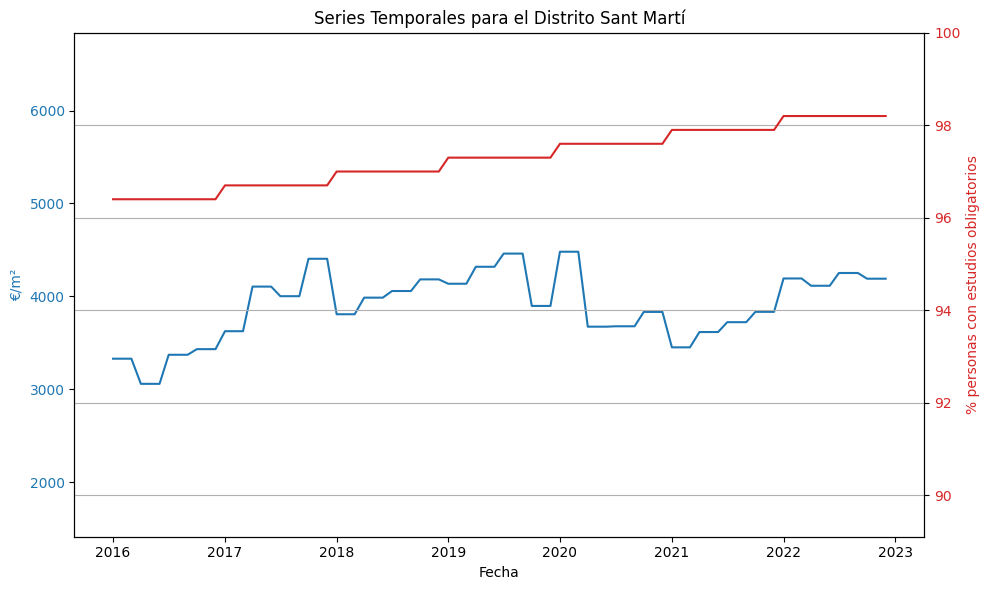

In [ ]:
# Establecer límites para los ejes y
ylim_serie1 = (df_merged['Compraventa_Unitario'].min()-100, df_merged['Compraventa_Unitario'].max()+100)  # Límites para Serie1
ylim_serie2 = (df_merged['Estudios_Obligatorios'].min()-5, 100)  # Límites para Serie2

#Crear un gráfico para la media de 'Compraventa_Unitario' por cada categoría, año y mes
for categoria, datos_categoria in df_merged.groupby(['Codi_Districte', 'Nom_Districte']):
    # Crear una figura y un conjunto de ejes
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Serie1 en el primer eje y (izquierda)
    color1 = 'tab:blue'
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('€/m²', color=color1)
    ax1.plot(datos_categoria.index, datos_categoria['Compraventa_Unitario'], label=f'Media de Compraventa_Unitario', color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.set_ylim(ylim_serie1)  # Establecer límites para Serie1

    # Crear un segundo eje y (derecha) para Serie2
    ax2 = ax1.twinx()
    color2 = 'tab:red'
    ax2.set_ylabel('% personas con estudios obligatorios', color=color2)
    ax2.plot(datos_categoria.index, datos_categoria['Estudios_Obligatorios'], label=f'Media de Estudios_Obligatorios', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)
    ax2.set_ylim(ylim_serie2)  # Establecer límites para Serie2

    # Añadir título y leyendas
    plt.title(f'Series Temporales para el Distrito {categoria[1]}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Independientemente de la escala de las dos variables, en la grafica se puede diferenciar entre la tendencia de valor de compraventas unitario y la tendencia del porcentaje de personas con estudio obligatorios. Ambas series temporales tienen tendencia al alta en la mayoria de distritos.

Por otro lado ninguna de las dos series parece tener especial influencia sobre la otra.

Tambien se puede generalizar que, a valor mas alto de unitario de compraventa,
% de personas con estudios obligatorios mas alto. Podemos observarlo en el distrito de Sarrià-Sant Gervasi y en contraposicion en el distrito de Nou Barris

###Compraventa Unitario vs indicador nº15. Consumo energia electrica

In [ ]:
df_energia = data[['Any', 'Trimestre', 'Mes', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Compraventa_Unitario', 'ConsumResidencial']]

In [ ]:
df_energia.head()

Any  Trimestre  Mes  Codi_Districte Nom_Districte  Codi_Barri  \
Fecha                                                                        
2014-01-01  2014          1    1               1  Ciutat Vella           1   
2014-02-01  2014          1    2               1  Ciutat Vella           1   
2014-03-01  2014          1    3               1  Ciutat Vella           1   
2014-04-01  2014          2    4               1  Ciutat Vella           1   
2014-05-01  2014          2    5               1  Ciutat Vella           1   

           Nom_Barri  Compraventa_Unitario  ConsumResidencial  
Fecha                                                          
2014-01-01  el Raval                2813.0                NaN  
2014-02-01  el Raval                2813.0                NaN  
2014-03-01  el Raval                2813.0                NaN  
2014-04-01  el Raval                2948.8                NaN  
2014-05-01  el Raval                2948.8                NaN

In [ ]:
df_energia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8541 entries, 2014-01-01 to 2023-09-01
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Any                   8541 non-null   int64  
 1   Trimestre             8541 non-null   int64  
 2   Mes                   8541 non-null   int64  
 3   Codi_Districte        8541 non-null   int64  
 4   Nom_Districte         8541 non-null   object 
 5   Codi_Barri            8541 non-null   int64  
 6   Nom_Barri             8541 non-null   object 
 7   Compraventa_Unitario  8541 non-null   float64
 8   ConsumResidencial     4161 non-null   float64
dtypes: float64(2), int64(5), object(2)
memory usage: 667.3+ KB


In [ ]:
df_energia=df_energia.dropna()

In [ ]:
# Calcular la media de 'Compraventa_Unitario' agrupada por categoría, año y mes
media_compraventa = df_energia.groupby(['Codi_Districte', 'Nom_Districte','Any', 'Mes'])['Compraventa_Unitario'].mean().reset_index()

In [ ]:
# Calcular la suma de 'ConsumResidencial' agrupada por categoría
suma_energia = df_energia.groupby(['Codi_Districte', 'Nom_Districte','Any', 'Mes'])['ConsumResidencial'].sum().reset_index()

In [ ]:
# Unimos los dos dataframes
df_merged = pd.merge(media_compraventa, suma_energia, how='inner', left_on=['Codi_Districte',	'Nom_Districte',	'Any',	'Mes'], right_on=['Codi_Districte',	'Nom_Districte',	'Any',	'Mes'])

In [ ]:
# Añadimos la columna de fecha y la establecemos como indice
df_merged['Fecha'] = df_merged.apply(lambda row: pd.to_datetime(f"{row[2]}-{row[3]}"), axis=1)
df_merged.set_index('Fecha', inplace=True)

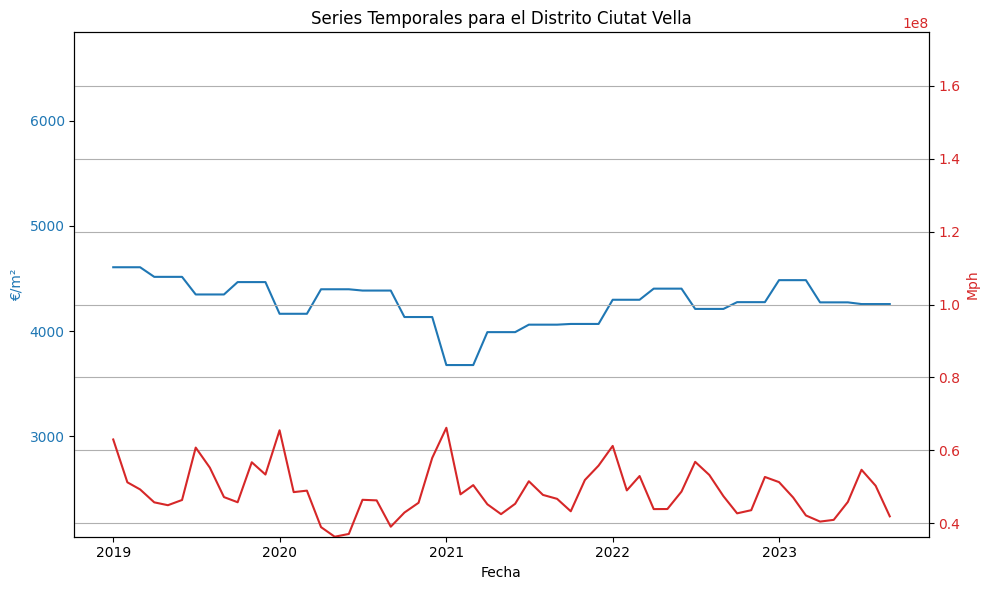

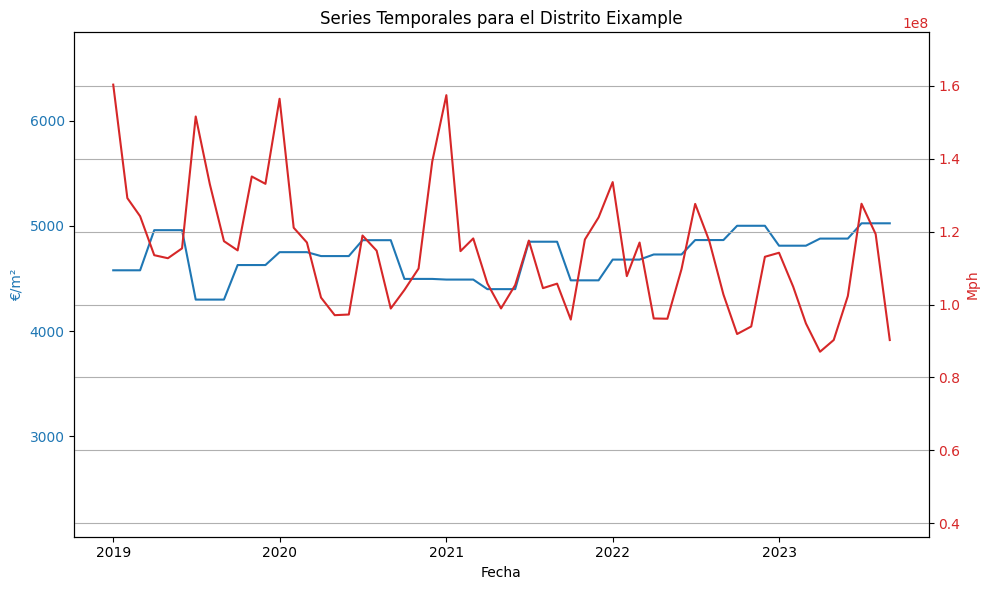

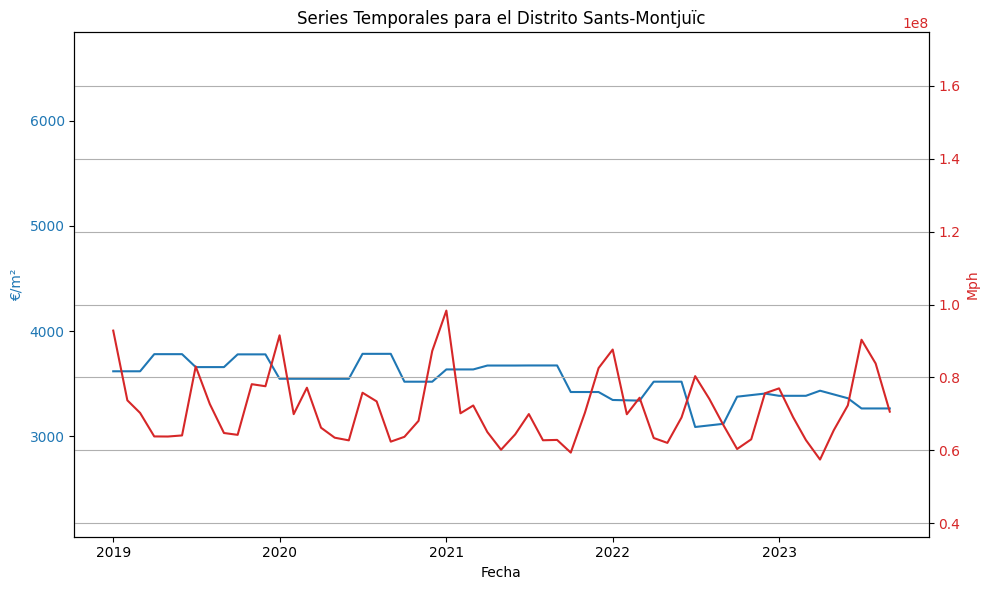

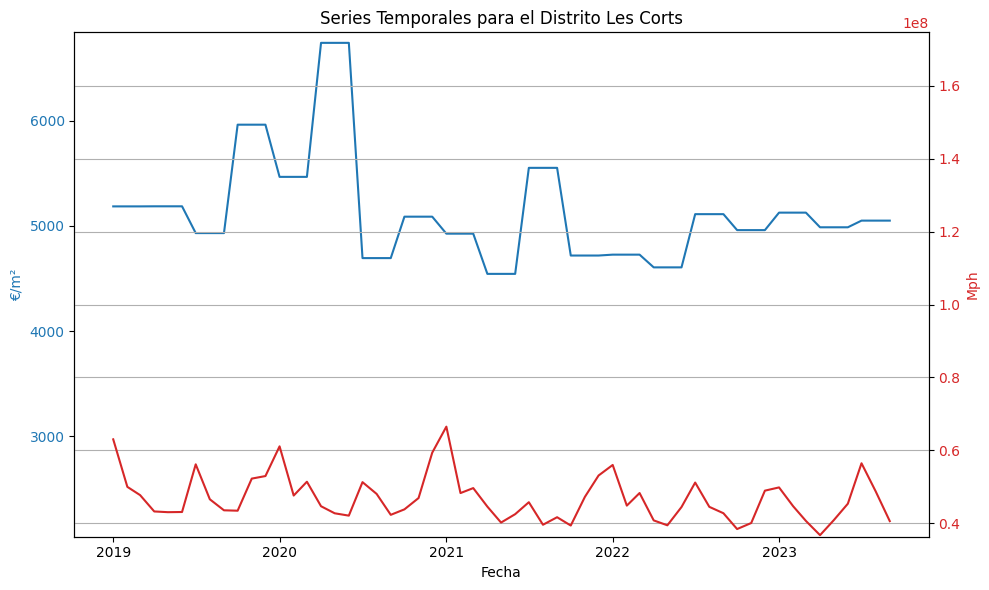

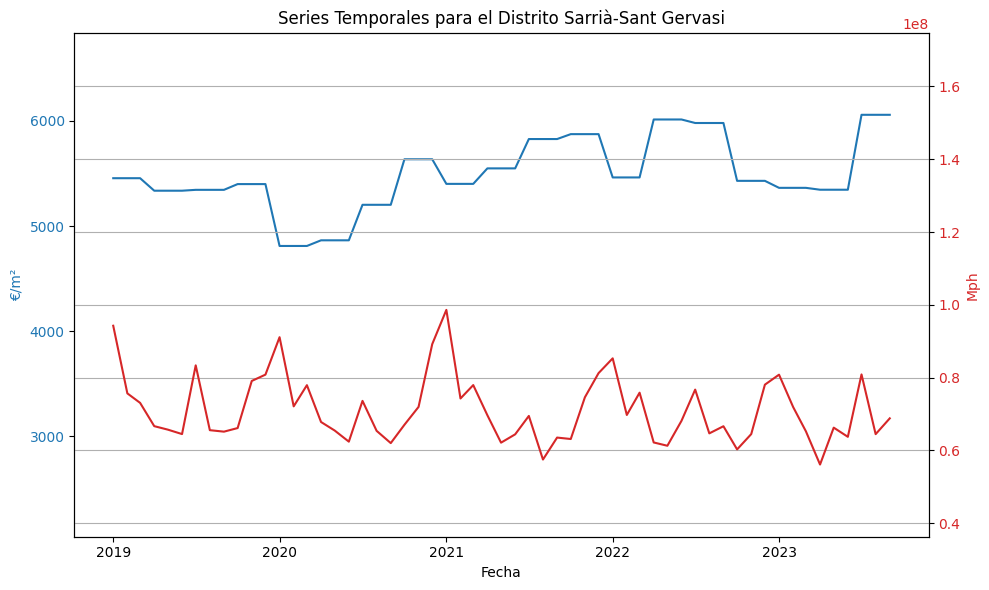

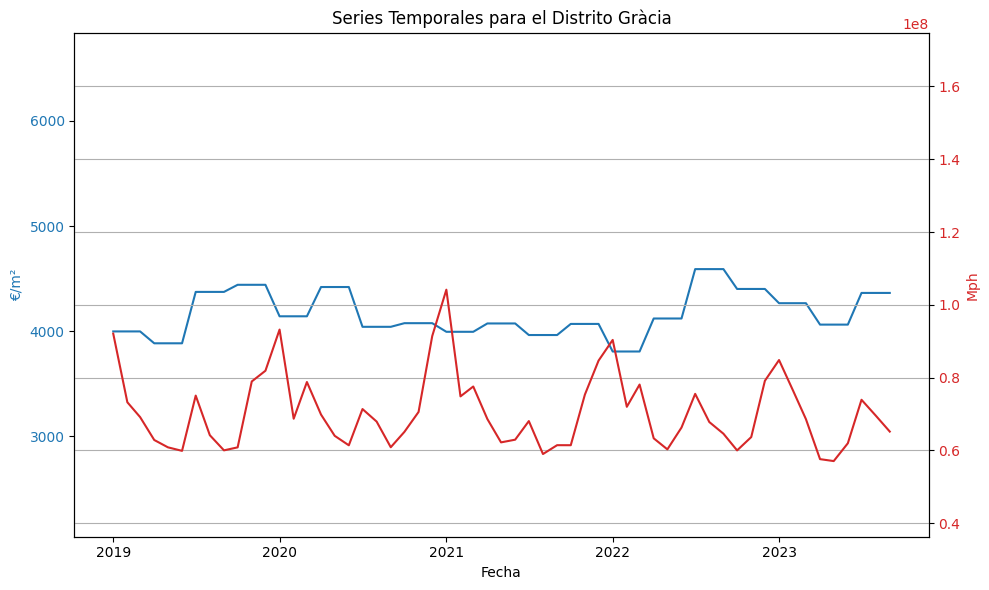

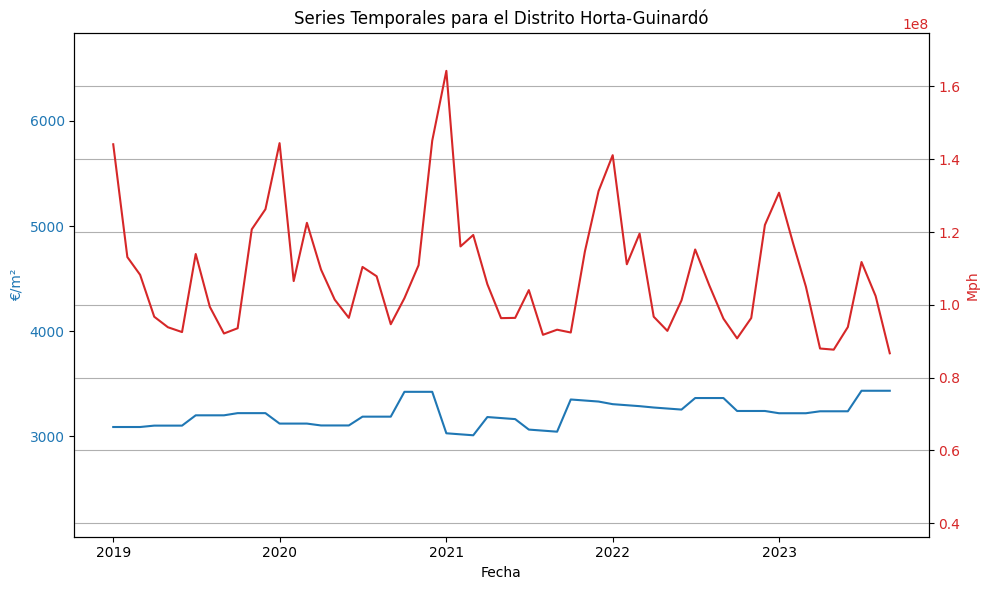

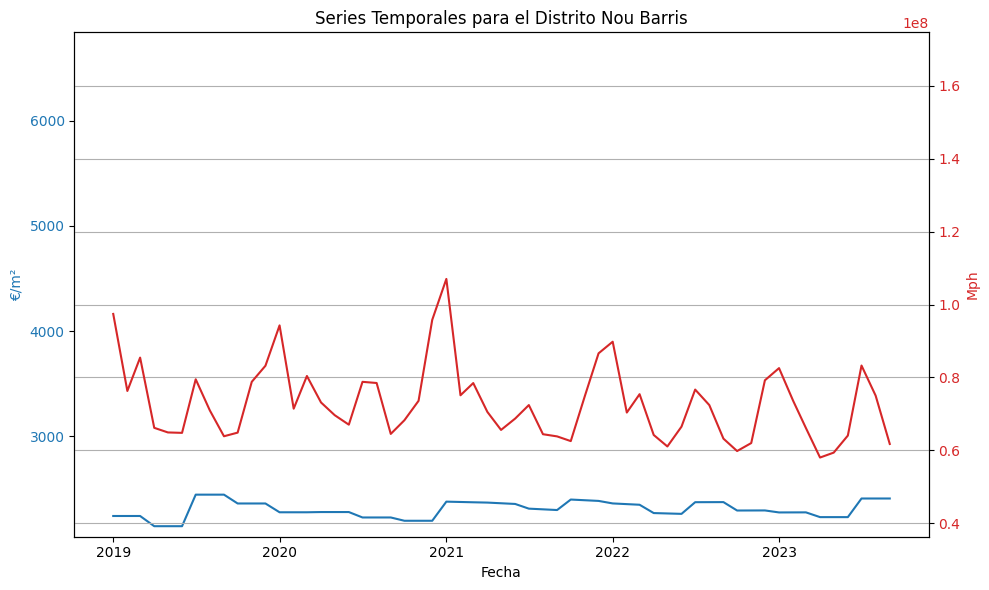

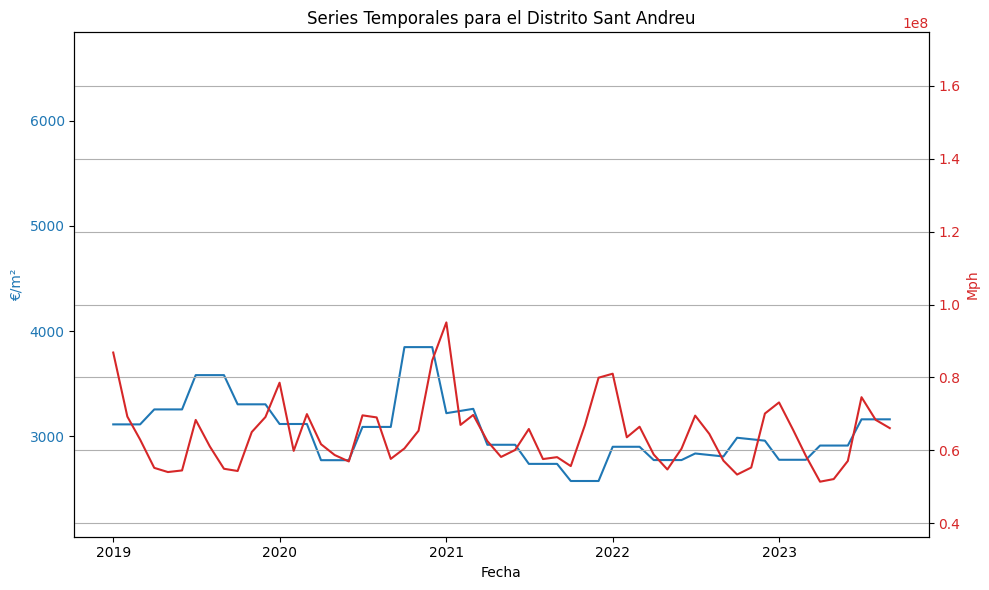

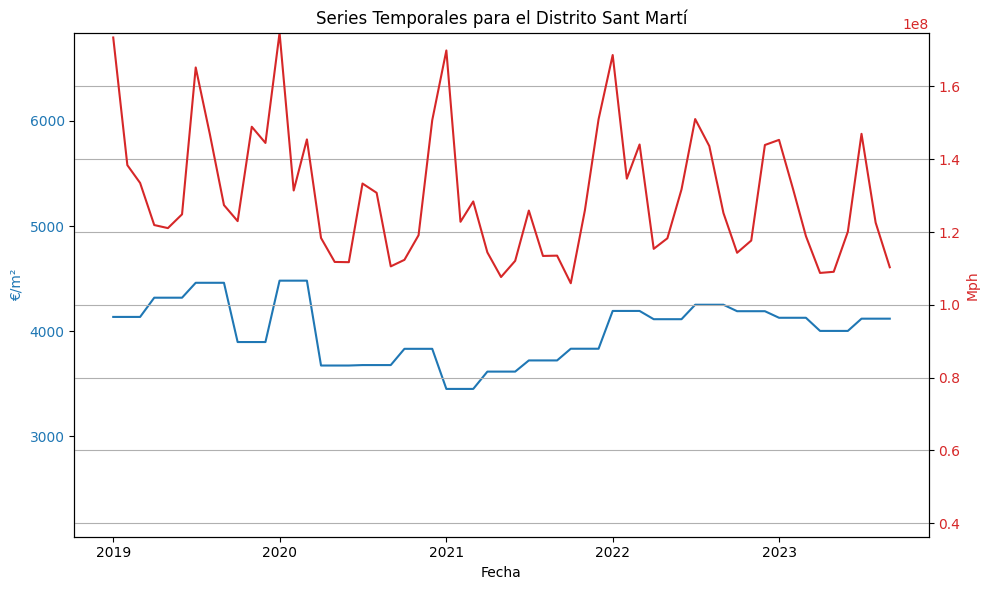

In [ ]:
# Establecer límites para los ejes y
ylim_serie1 = (df_merged['Compraventa_Unitario'].min()-100, df_merged['Compraventa_Unitario'].max()+100)  # Límites para Serie1
ylim_serie2 = (df_merged['ConsumResidencial'].min()-100, df_merged['ConsumResidencial'].max()-100)  # Límites para Serie2

#Crear un gráfico para la media de 'Compraventa_Unitario' por cada categoría, año y mes
for categoria, datos_categoria in df_merged.groupby(['Codi_Districte', 'Nom_Districte']):
    # Crear una figura y un conjunto de ejes
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Serie1 en el primer eje y (izquierda)
    color1 = 'tab:blue'
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('€/m²', color=color1)
    ax1.plot(datos_categoria.index, datos_categoria['Compraventa_Unitario'], label=f'Media de Compraventa_Unitario', color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.set_ylim(ylim_serie1)  # Establecer límites para Serie1

    # Crear un segundo eje y (derecha) para Serie2
    ax2 = ax1.twinx()
    color2 = 'tab:red'
    ax2.set_ylabel('Mph', color=color2)
    ax2.plot(datos_categoria.index, datos_categoria['ConsumResidencial'], label=f'Suma de Energia electrica residencial', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)
    ax2.set_ylim(ylim_serie2)  # Establecer límites para Serie2

    # Añadir título y leyendas
    plt.title(f'Series Temporales para el Distrito {categoria[1]}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Independientemente de la escala de las dos variables, en la grafica se puede diferenciar entre la tendencia de valor de compraventas unitario y la tendencia del consumo electrico residencial. Ambas series temporales tienen tendencia al alza en la mayoria de distritos.

Por otro lado ninguna de las dos series parece tener especial influencia sobre la otra.

Tambien se puede generalizar que, no parece haber ninguna relacion entre el valor de compraventa unitario y el consumo electrico residencial.

###Compraventa Unitario vs indicador nº22. Concentracion de particulas Pm 2.5

In [ ]:
df_pm25 = data[['Any', 'Trimestre', 'Mes', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Compraventa_Unitario', 'Pm25']]

In [ ]:
df_pm25.head()

Any  Trimestre  Mes  Codi_Districte Nom_Districte  Codi_Barri  \
Fecha                                                                        
2014-01-01  2014          1    1               1  Ciutat Vella           1   
2014-02-01  2014          1    2               1  Ciutat Vella           1   
2014-03-01  2014          1    3               1  Ciutat Vella           1   
2014-04-01  2014          2    4               1  Ciutat Vella           1   
2014-05-01  2014          2    5               1  Ciutat Vella           1   

           Nom_Barri  Compraventa_Unitario  Pm25  
Fecha                                             
2014-01-01  el Raval                2813.0   NaN  
2014-02-01  el Raval                2813.0   NaN  
2014-03-01  el Raval                2813.0   NaN  
2014-04-01  el Raval                2948.8   NaN  
2014-05-01  el Raval                2948.8   NaN

In [ ]:
df_pm25.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8541 entries, 2014-01-01 to 2023-09-01
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Any                   8541 non-null   int64  
 1   Trimestre             8541 non-null   int64  
 2   Mes                   8541 non-null   int64  
 3   Codi_Districte        8541 non-null   int64  
 4   Nom_Districte         8541 non-null   object 
 5   Codi_Barri            8541 non-null   int64  
 6   Nom_Barri             8541 non-null   object 
 7   Compraventa_Unitario  8541 non-null   float64
 8   Pm25                  4380 non-null   float64
dtypes: float64(2), int64(5), object(2)
memory usage: 667.3+ KB


In [ ]:
df_pm25=df_pm25.dropna()

In [ ]:
# Calcular la media de 'Compraventa_Unitario' agrupada por categoría, año y mes
media_compraventa = df_pm25.groupby(['Codi_Districte', 'Nom_Districte','Any', 'Mes'])['Compraventa_Unitario'].mean().reset_index()

In [ ]:
# Calcular la suma de 'ConsumResidencial' agrupada por categoría
media_pm25 = df_pm25.groupby(['Codi_Districte', 'Nom_Districte','Any', 'Mes'])['Pm25'].mean().reset_index()

In [ ]:
# Unimos los dos dataframes
df_merged = pd.merge(media_compraventa, media_pm25, how='inner', left_on=['Codi_Districte',	'Nom_Districte',	'Any',	'Mes'], right_on=['Codi_Districte',	'Nom_Districte',	'Any',	'Mes'])

In [ ]:
# Añadimos la columna de fecha y la establecemos como indice
df_merged['Fecha'] = df_merged.apply(lambda row: pd.to_datetime(f"{row[2]}-{row[3]}"), axis=1)
df_merged.set_index('Fecha', inplace=True)

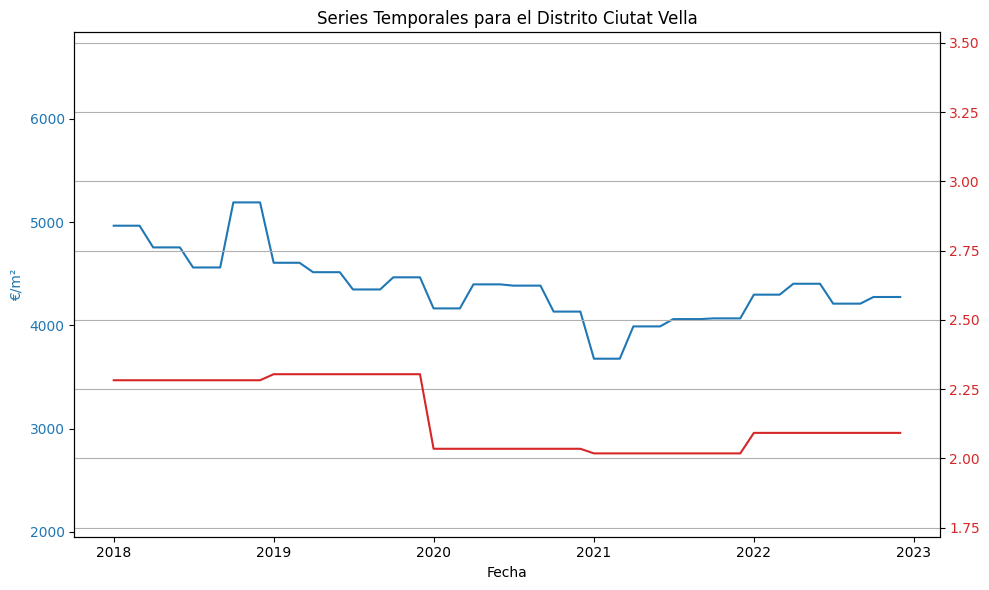

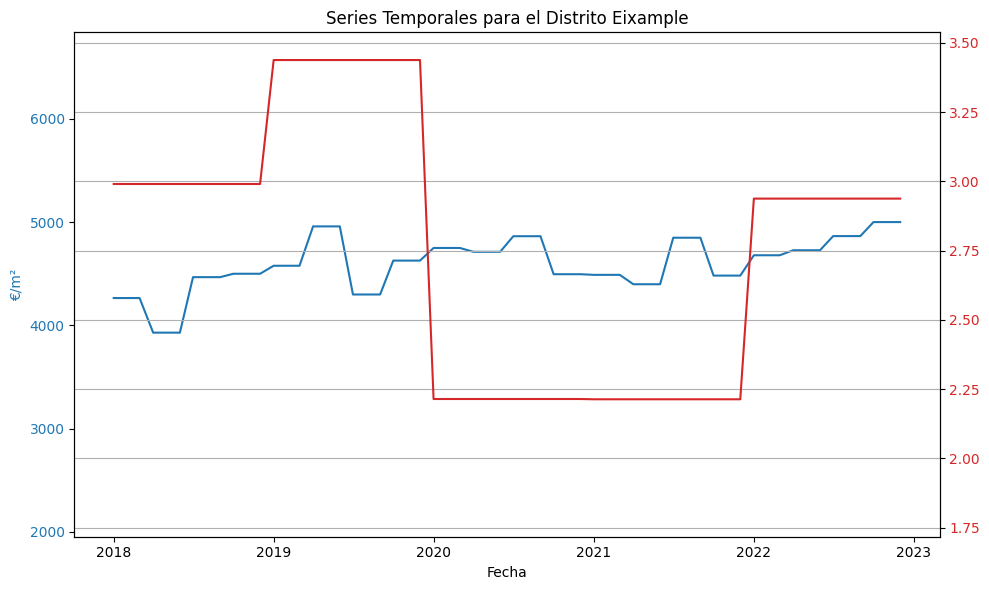

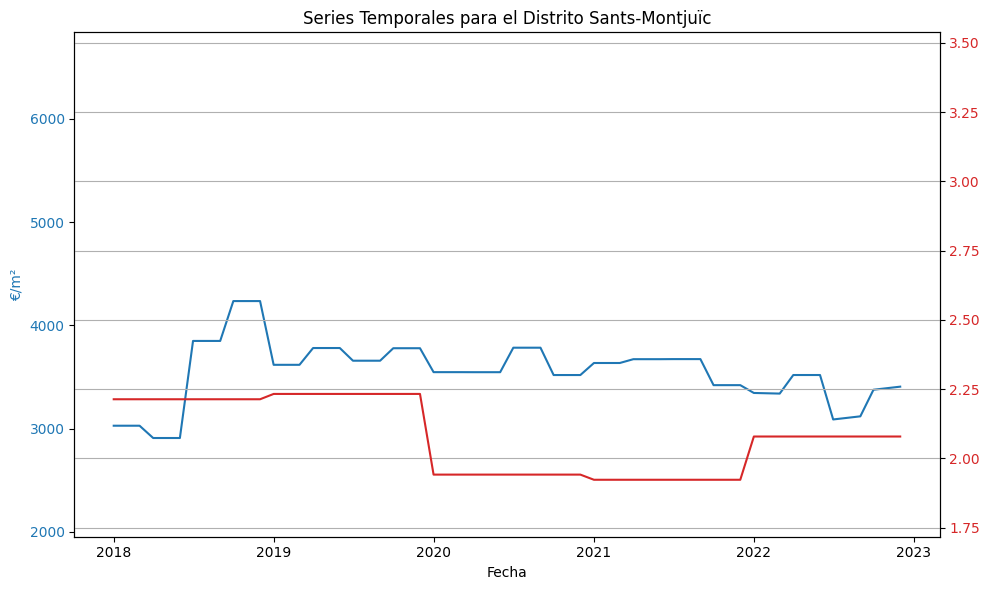

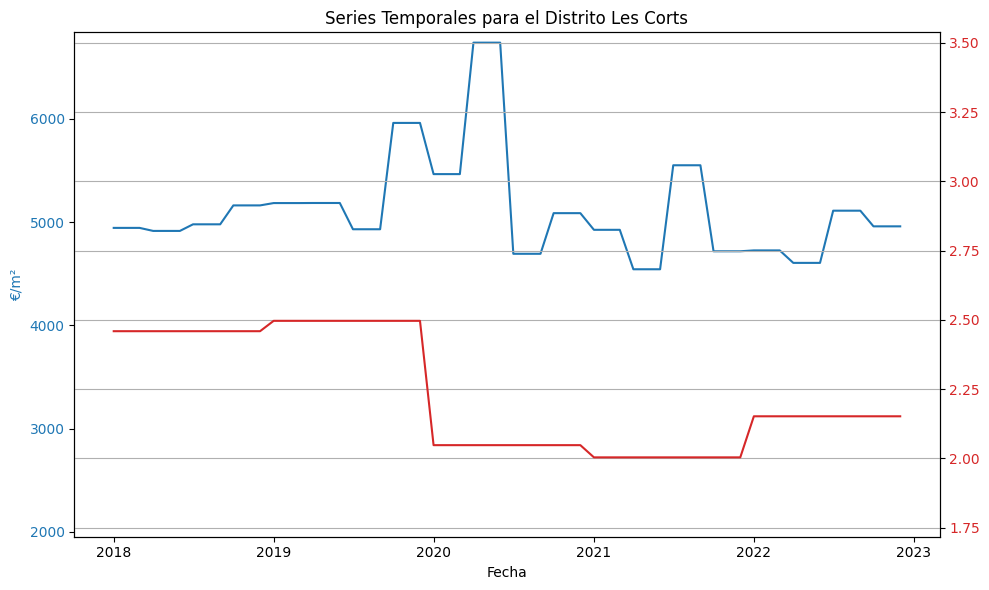

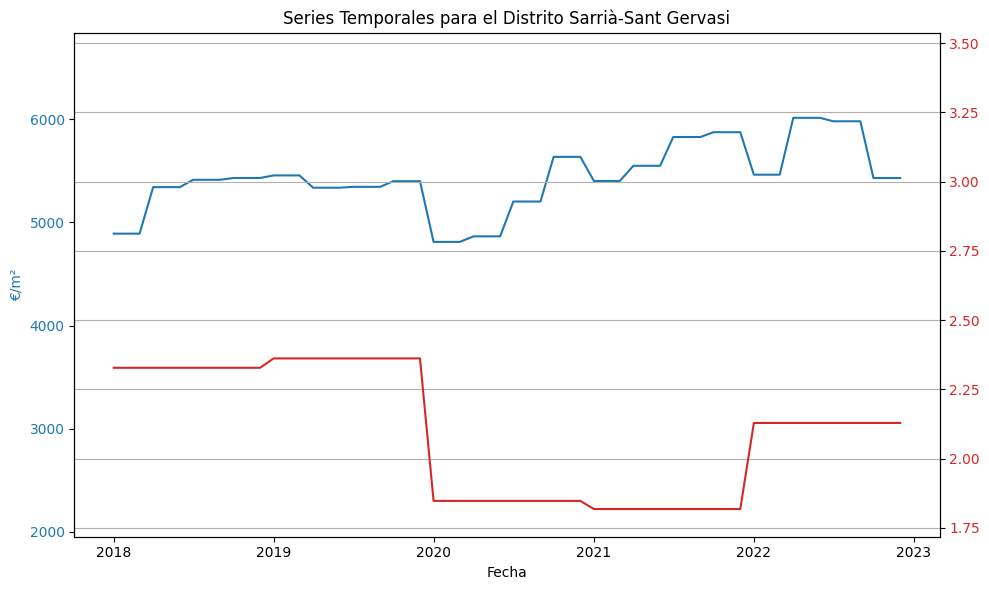

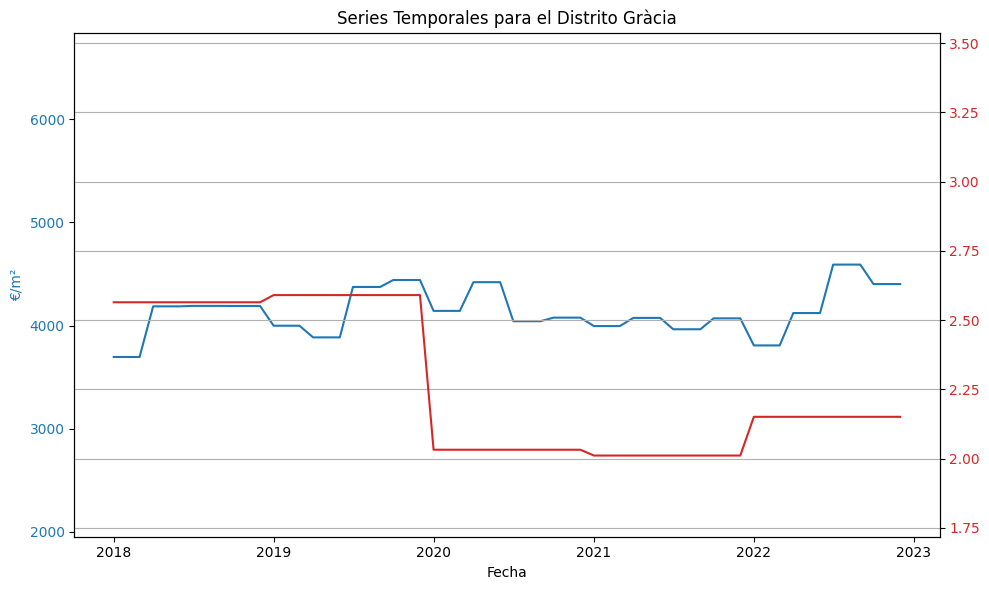

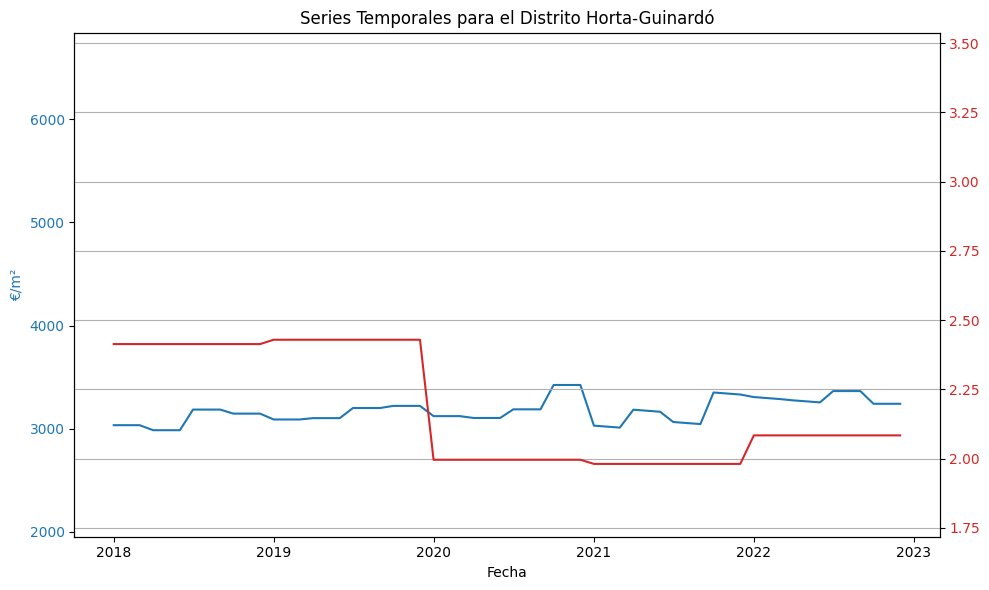

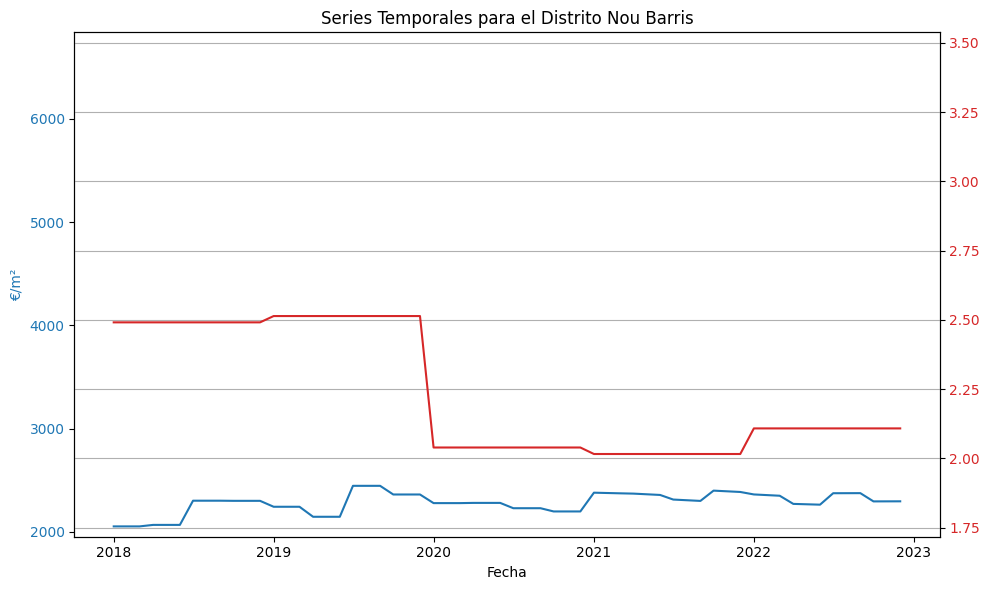

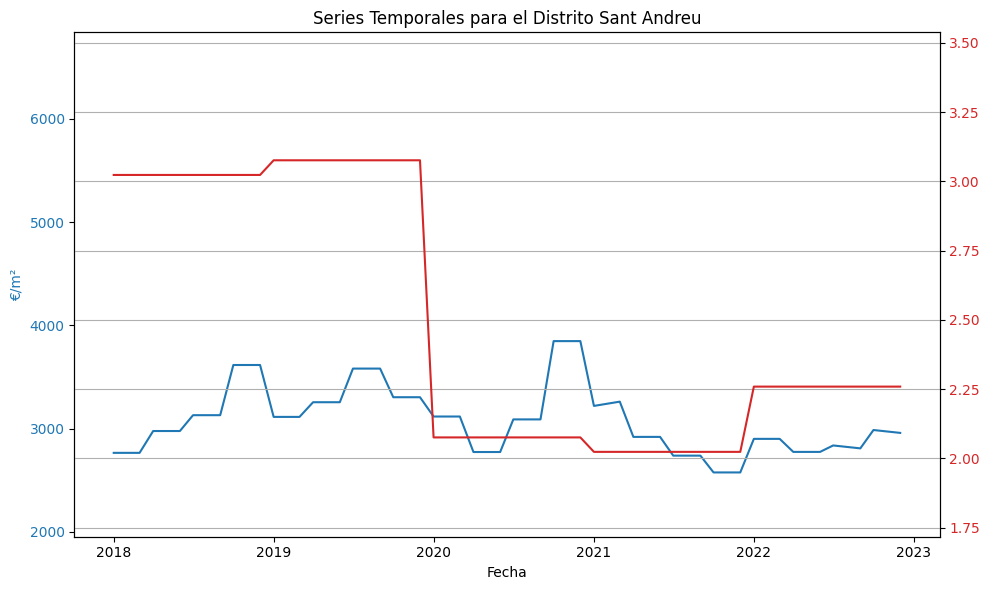

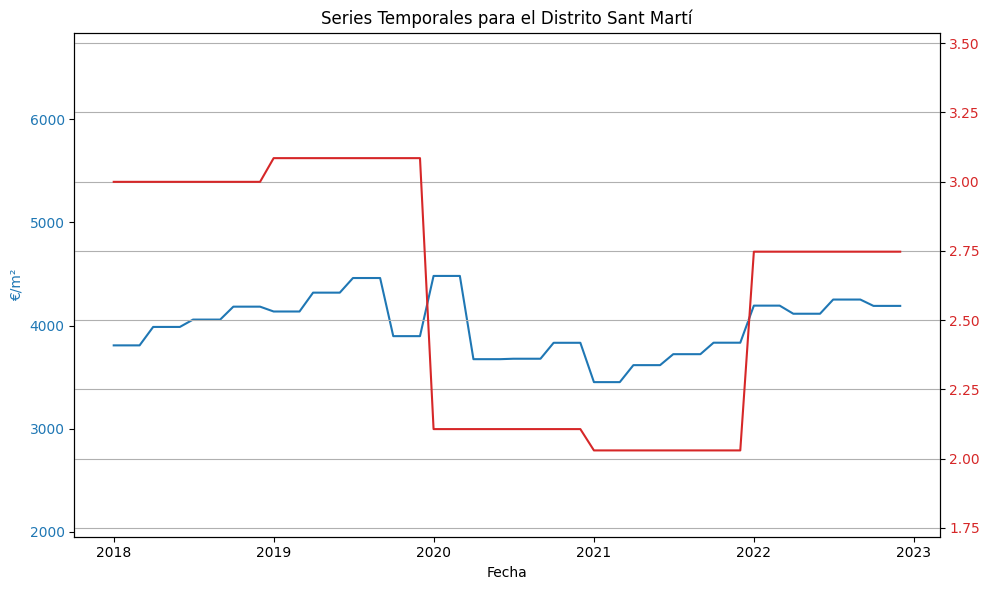

In [ ]:
# Establecer límites para los ejes y
ylim_serie1 = (df_merged['Compraventa_Unitario'].min()-100, df_merged['Compraventa_Unitario'].max()+100)  # Límites para Serie1
ylim_serie2 = (df_merged['Pm25'].min()-0.1, df_merged['Pm25'].max()+0.1)  # Límites para Serie2

#Crear un gráfico para la media de 'Compraventa_Unitario' por cada categoría, año y mes
for categoria, datos_categoria in df_merged.groupby(['Codi_Districte', 'Nom_Districte']):
    # Crear una figura y un conjunto de ejes
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Serie1 en el primer eje y (izquierda)
    color1 = 'tab:blue'
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('€/m²', color=color1)
    ax1.plot(datos_categoria.index, datos_categoria['Compraventa_Unitario'], label=f'Media de Compraventa_Unitario', color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.set_ylim(ylim_serie1)  # Establecer límites para Serie1

    # Crear un segundo eje y (derecha) para Serie2
    ax2 = ax1.twinx()
    color2 = 'tab:red'
    ax2.set_ylabel('', color=color2)
    ax2.plot(datos_categoria.index, datos_categoria['Pm25'], label=f'Media de concentracion de particulas Pm25', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)
    ax2.set_ylim(ylim_serie2)  # Establecer límites para Serie2

    # Añadir título y leyendas
    plt.title(f'Series Temporales para el Distrito {categoria[1]}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Independientemente de la escala de las dos variables, en la grafica se puede diferenciar entre la tendencia de valor de compraventas unitario y la tendencia de la concentracion de particulas Pm 2.5. Mientras que la serie de compraventa unitario tiene una tendencia al alza, la serie de concentración de particulas no. En los graficos puede verse como la serie de concentracion de particulas esta muy influenciada por el periodo de la pandemia del Covid-19 independientemente del distrito que sea.

Generalizando se puede decir que ninguna de las dos series parece tener especial influencia sobre la otra a nivel.


###Compraventa Unitario vs indicador nº23. Concentracion de particulas Pm 10

In [ ]:
df_pm10 = data[['Any', 'Trimestre', 'Mes', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Compraventa_Unitario', 'Pm10']]

In [ ]:
df_pm10.head()

Any  Trimestre  Mes  Codi_Districte Nom_Districte  Codi_Barri  \
Fecha                                                                        
2014-01-01  2014          1    1               1  Ciutat Vella           1   
2014-02-01  2014          1    2               1  Ciutat Vella           1   
2014-03-01  2014          1    3               1  Ciutat Vella           1   
2014-04-01  2014          2    4               1  Ciutat Vella           1   
2014-05-01  2014          2    5               1  Ciutat Vella           1   

           Nom_Barri  Compraventa_Unitario  Pm10  
Fecha                                             
2014-01-01  el Raval                2813.0   NaN  
2014-02-01  el Raval                2813.0   NaN  
2014-03-01  el Raval                2813.0   NaN  
2014-04-01  el Raval                2948.8   NaN  
2014-05-01  el Raval                2948.8   NaN

In [ ]:
df_pm10.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8541 entries, 2014-01-01 to 2023-09-01
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Any                   8541 non-null   int64  
 1   Trimestre             8541 non-null   int64  
 2   Mes                   8541 non-null   int64  
 3   Codi_Districte        8541 non-null   int64  
 4   Nom_Districte         8541 non-null   object 
 5   Codi_Barri            8541 non-null   int64  
 6   Nom_Barri             8541 non-null   object 
 7   Compraventa_Unitario  8541 non-null   float64
 8   Pm10                  4380 non-null   float64
dtypes: float64(2), int64(5), object(2)
memory usage: 667.3+ KB


In [ ]:
df_pm10=df_pm10.dropna()

In [ ]:
# Calcular la media de 'Compraventa_Unitario' agrupada por categoría, año y mes
media_compraventa = df_pm10.groupby(['Codi_Districte', 'Nom_Districte','Any', 'Mes'])['Compraventa_Unitario'].mean().reset_index()

In [ ]:
# Calcular la suma de 'ConsumResidencial' agrupada por categoría
media_pm10 = df_pm10.groupby(['Codi_Districte', 'Nom_Districte','Any', 'Mes'])['Pm10'].mean().reset_index()

In [ ]:
# Unimos los dos dataframes
df_merged = pd.merge(media_compraventa, media_pm10, how='inner', left_on=['Codi_Districte',	'Nom_Districte',	'Any',	'Mes'], right_on=['Codi_Districte',	'Nom_Districte',	'Any',	'Mes'])

In [ ]:
# Añadimos la columna de fecha y la establecemos como indice
df_merged['Fecha'] = df_merged.apply(lambda row: pd.to_datetime(f"{row[2]}-{row[3]}"), axis=1)
df_merged.set_index('Fecha', inplace=True)

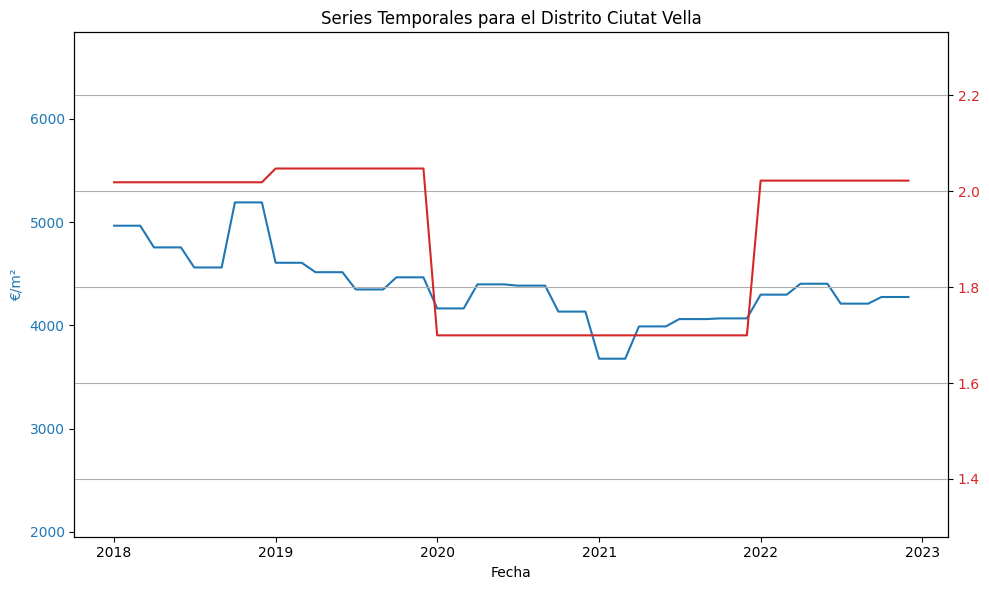

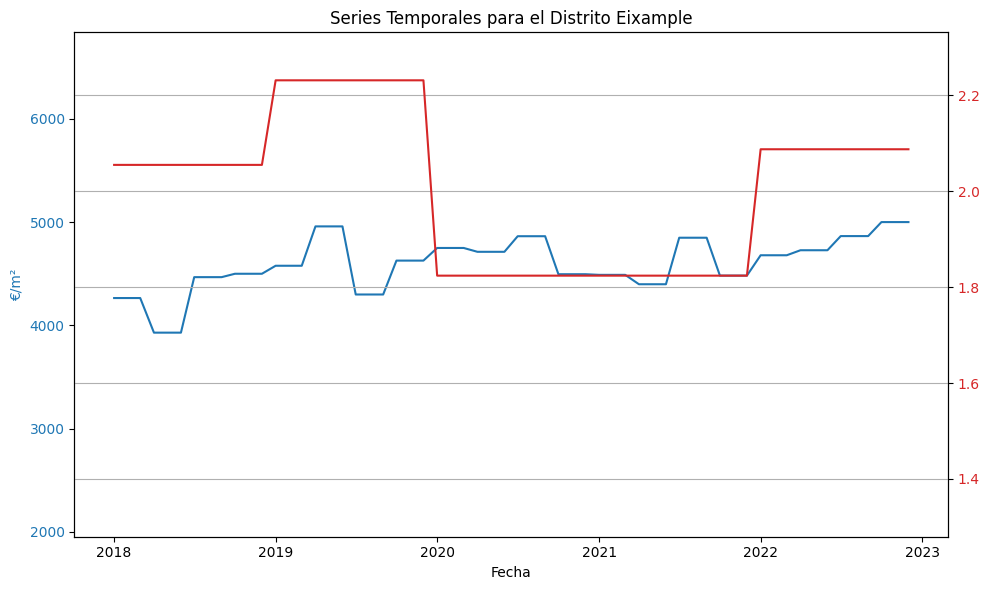

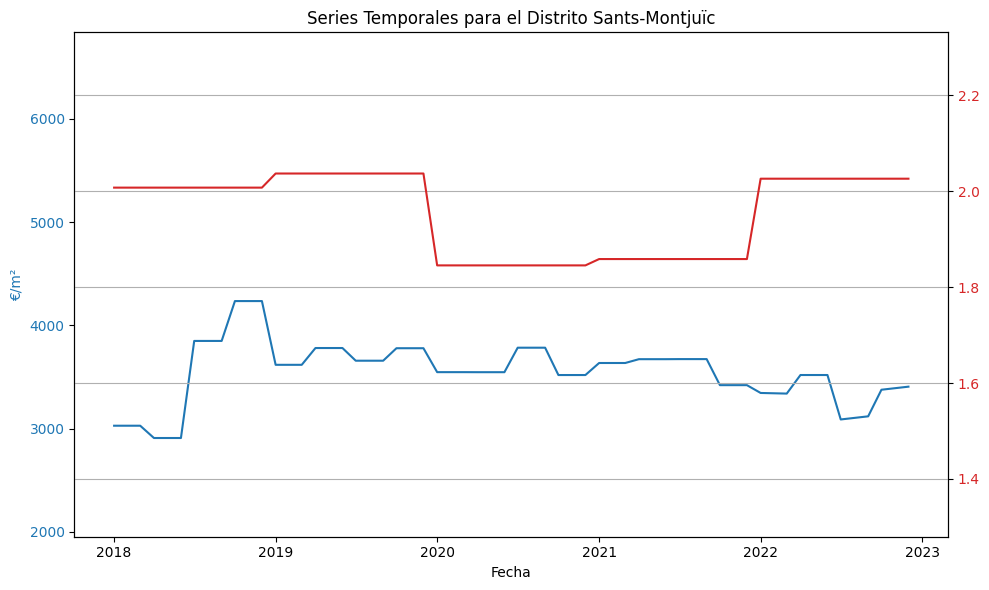

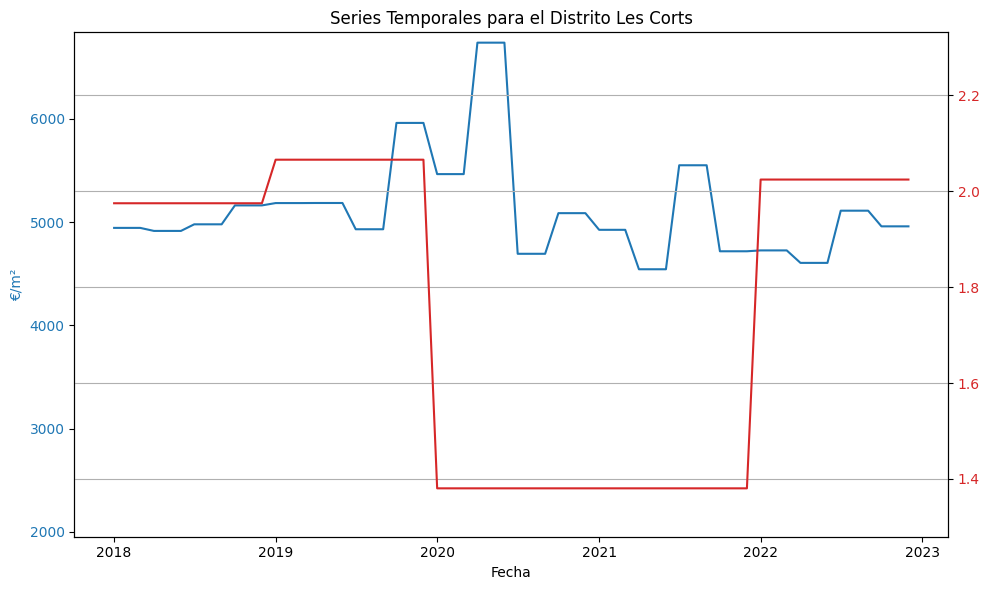

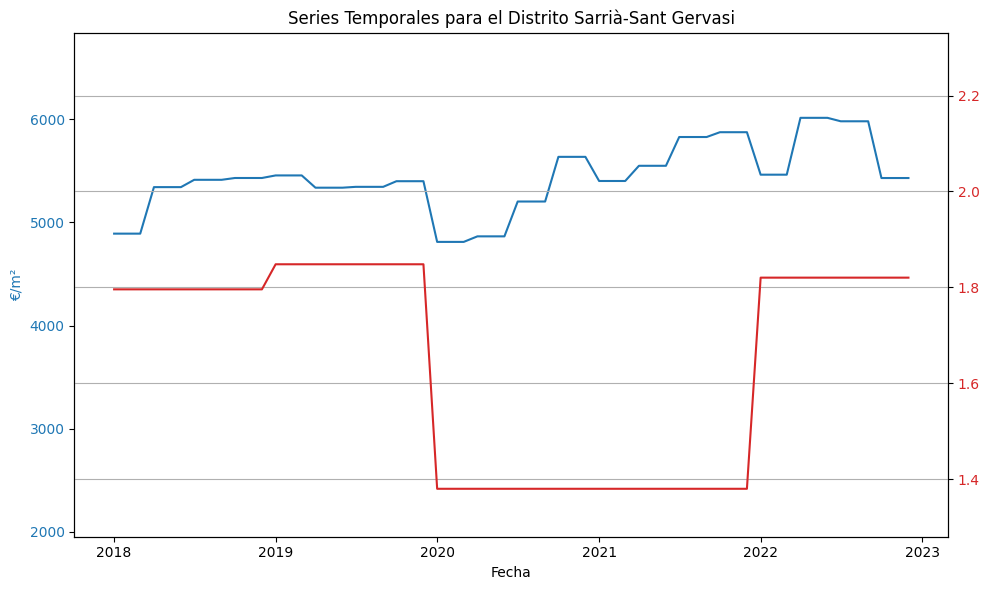

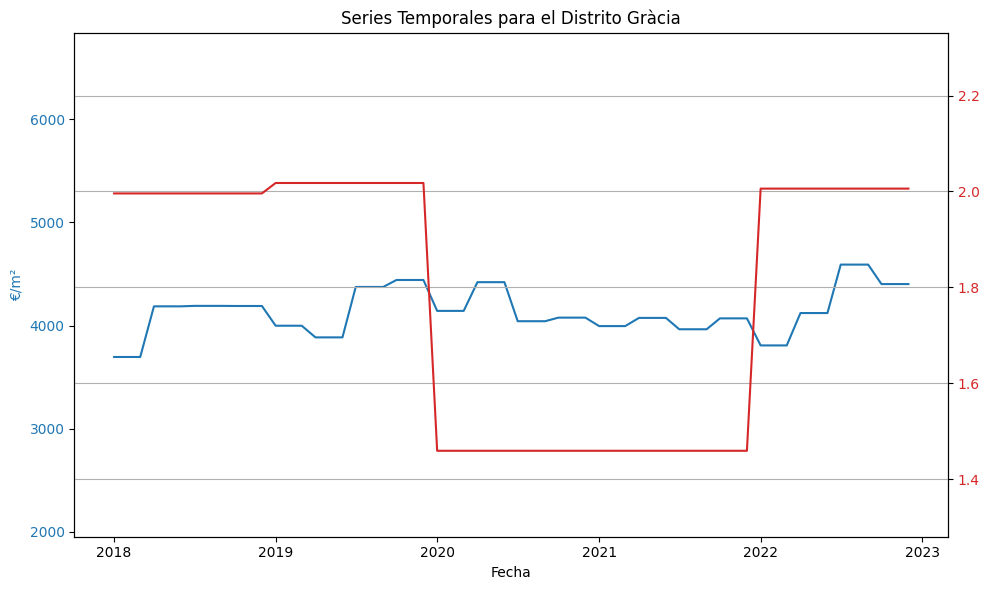

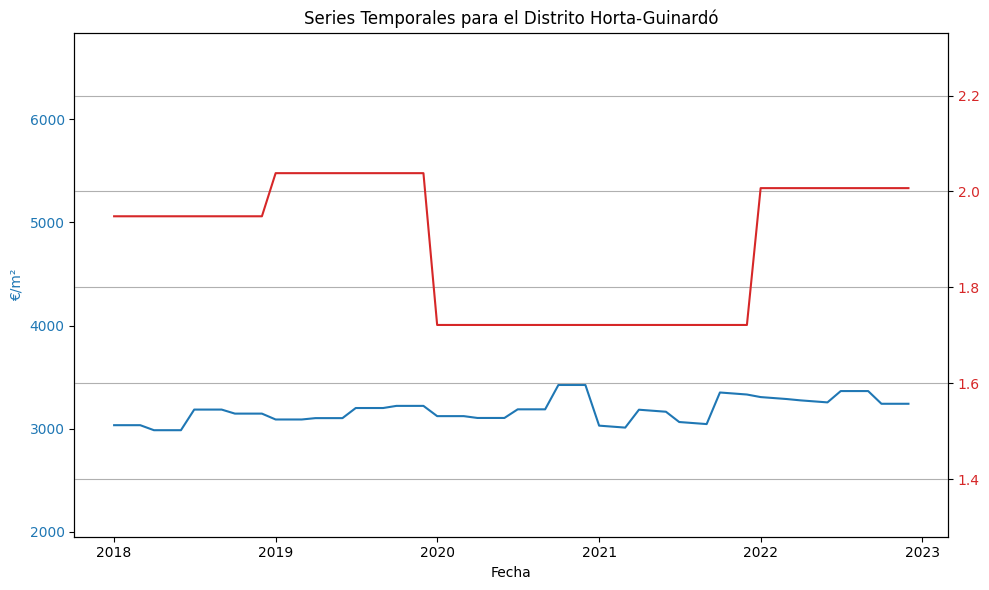

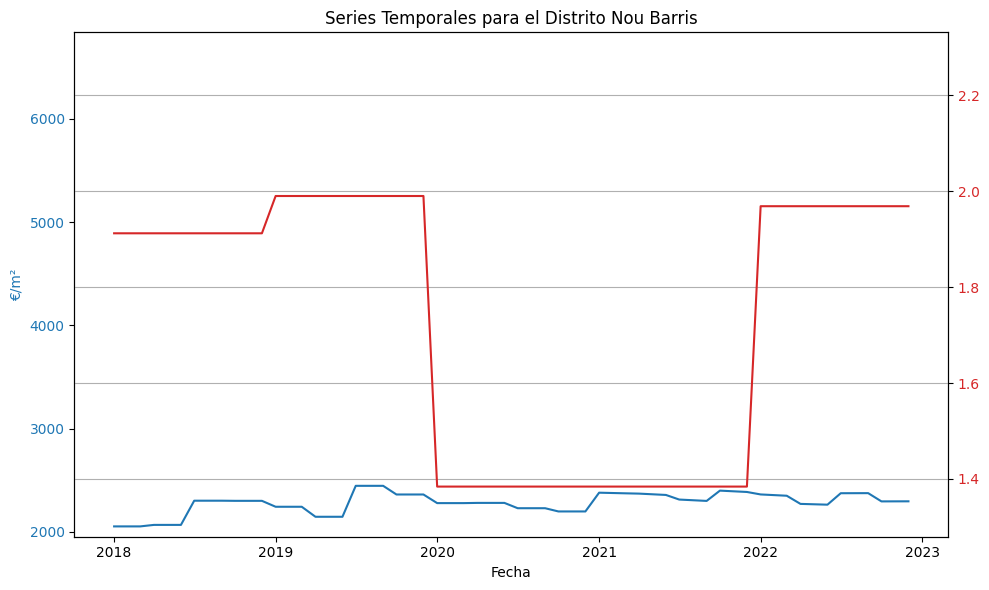

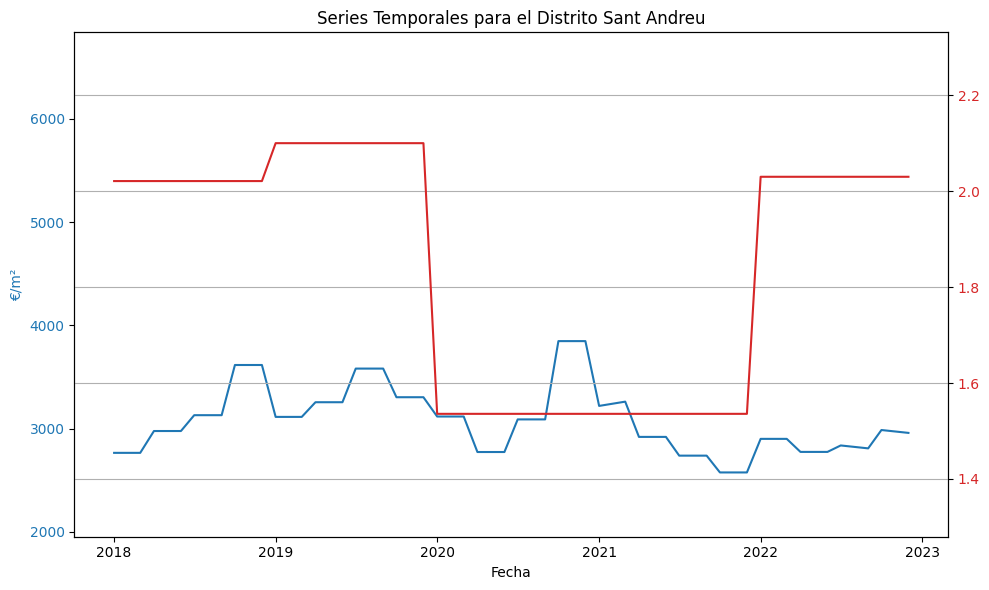

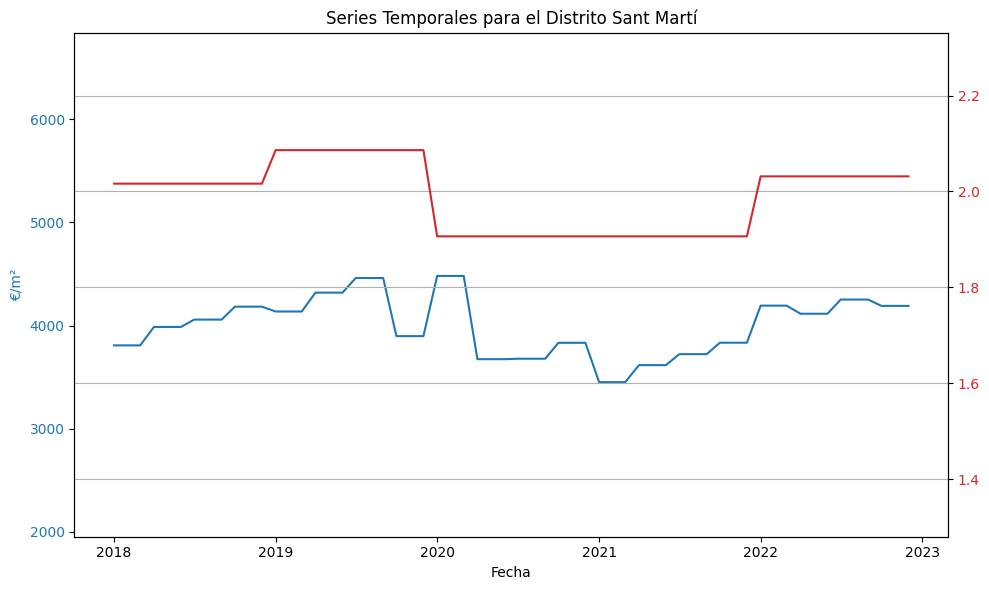

In [ ]:
# Establecer límites para los ejes y
ylim_serie1 = (df_merged['Compraventa_Unitario'].min()-100, df_merged['Compraventa_Unitario'].max()+100)  # Límites para Serie1
ylim_serie2 = (df_merged['Pm10'].min()-0.1, df_merged['Pm10'].max()+0.1)  # Límites para Serie2

#Crear un gráfico para la media de 'Compraventa_Unitario' por cada categoría, año y mes
for categoria, datos_categoria in df_merged.groupby(['Codi_Districte', 'Nom_Districte']):
    # Crear una figura y un conjunto de ejes
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Serie1 en el primer eje y (izquierda)
    color1 = 'tab:blue'
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('€/m²', color=color1)
    ax1.plot(datos_categoria.index, datos_categoria['Compraventa_Unitario'], label=f'Media de Compraventa_Unitario', color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.set_ylim(ylim_serie1)  # Establecer límites para Serie1

    # Crear un segundo eje y (derecha) para Serie2
    ax2 = ax1.twinx()
    color2 = 'tab:red'
    ax2.set_ylabel('', color=color2)
    ax2.plot(datos_categoria.index, datos_categoria['Pm10'], label=f'Media de concentracion de particulas Pm10', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)
    ax2.set_ylim(ylim_serie2)  # Establecer límites para Serie2

    # Añadir título y leyendas
    plt.title(f'Series Temporales para el Distrito {categoria[1]}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Independientemente de la escala de las dos variables, en la grafica se puede diferenciar entre la tendencia de valor de compraventas unitario y la tendencia de la concentracion de particulas Pm 10. Mientras que la serie de compraventa unitario tiene una tendencia al alza, la serie de concentración de particulas no. En los graficos puede verse como la serie de concentracion de particulas esta muy influenciada por el periodo de la pandemia del Covid-19, cabe destacar los distritos de Nou Barris y Les Corts.

Generalizando se puede decir que ninguna de las dos series parece tener especial influencia sobre la otra a nivel.

###Compraventa Unitario vs indicador nº40. Participacion electoral

In [ ]:
df_participacion = data[['Any', 'Trimestre', 'Mes', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Compraventa_Unitario', 'Participacion']]

In [ ]:
df_participacion.head()

Any  Trimestre  Mes  Codi_Districte Nom_Districte  Codi_Barri  \
Fecha                                                                        
2014-01-01  2014          1    1               1  Ciutat Vella           1   
2014-02-01  2014          1    2               1  Ciutat Vella           1   
2014-03-01  2014          1    3               1  Ciutat Vella           1   
2014-04-01  2014          2    4               1  Ciutat Vella           1   
2014-05-01  2014          2    5               1  Ciutat Vella           1   

           Nom_Barri  Compraventa_Unitario  Participacion  
Fecha                                                      
2014-01-01  el Raval                2813.0           41.8  
2014-02-01  el Raval                2813.0           41.8  
2014-03-01  el Raval                2813.0           41.8  
2014-04-01  el Raval                2948.8           41.8  
2014-05-01  el Raval                2948.8           41.8

In [ ]:
df_participacion.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8541 entries, 2014-01-01 to 2023-09-01
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Any                   8541 non-null   int64  
 1   Trimestre             8541 non-null   int64  
 2   Mes                   8541 non-null   int64  
 3   Codi_Districte        8541 non-null   int64  
 4   Nom_Districte         8541 non-null   object 
 5   Codi_Barri            8541 non-null   int64  
 6   Nom_Barri             8541 non-null   object 
 7   Compraventa_Unitario  8541 non-null   float64
 8   Participacion         8541 non-null   float64
dtypes: float64(2), int64(5), object(2)
memory usage: 667.3+ KB


In [ ]:
df_participacion=df_participacion.dropna()

In [ ]:
# Calcular la media de 'Compraventa_Unitario' agrupada por categoría, año y mes
media_compraventa = df_participacion.groupby(['Codi_Districte', 'Nom_Districte','Any', 'Mes'])['Compraventa_Unitario'].mean().reset_index()

In [ ]:
# Calcular la suma de 'ConsumResidencial' agrupada por categoría
media_participacion = df_participacion.groupby(['Codi_Districte', 'Nom_Districte','Any', 'Mes'])['Participacion'].mean().reset_index()

In [ ]:
# Unimos los dos dataframes
df_merged = pd.merge(media_compraventa, media_participacion, how='inner', left_on=['Codi_Districte',	'Nom_Districte',	'Any',	'Mes'], right_on=['Codi_Districte',	'Nom_Districte',	'Any',	'Mes'])

In [ ]:
# Añadimos la columna de fecha y la establecemos como indice
df_merged['Fecha'] = df_merged.apply(lambda row: pd.to_datetime(f"{row[2]}-{row[3]}"), axis=1)
df_merged.set_index('Fecha', inplace=True)

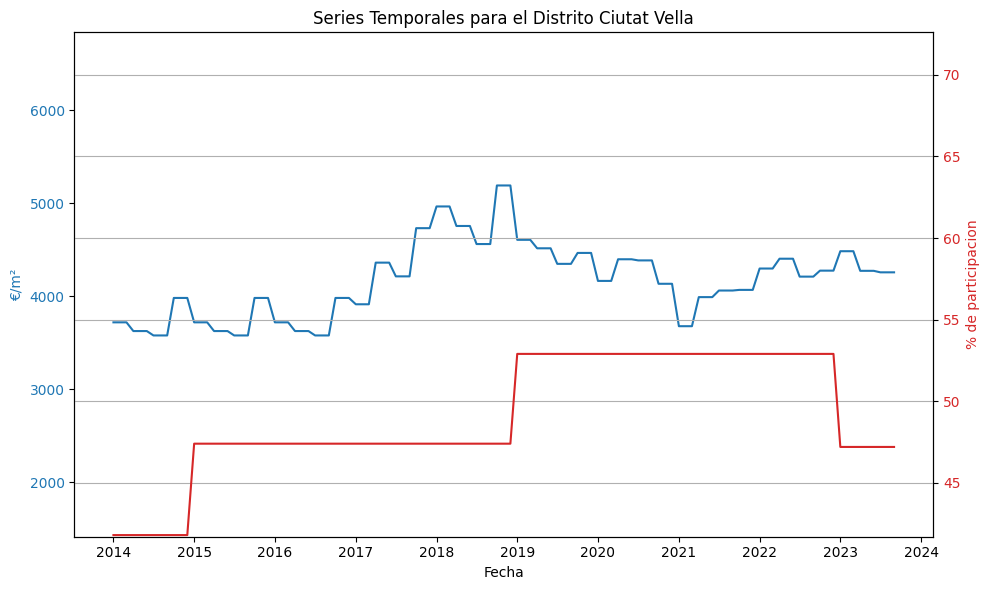

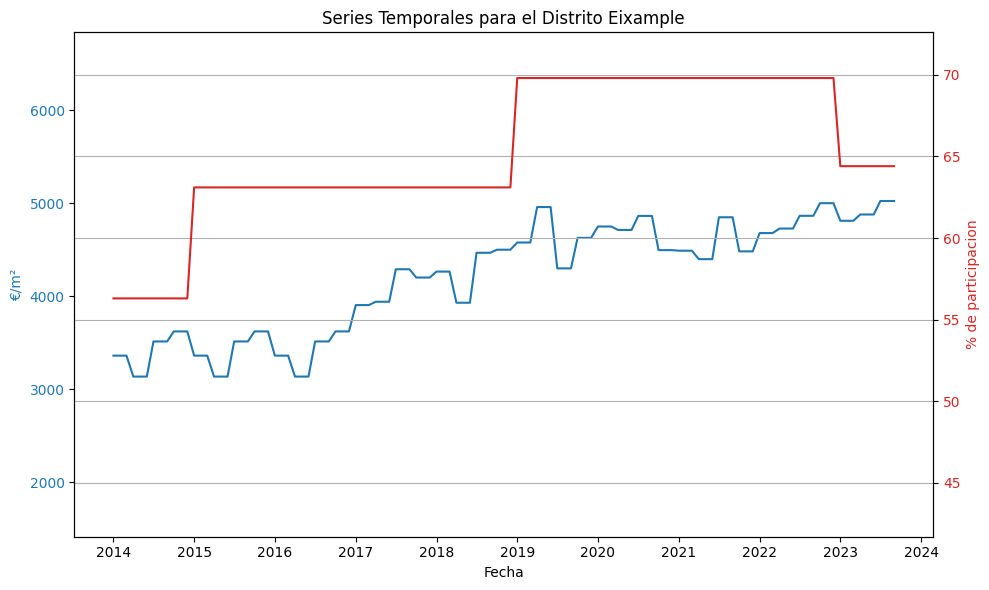

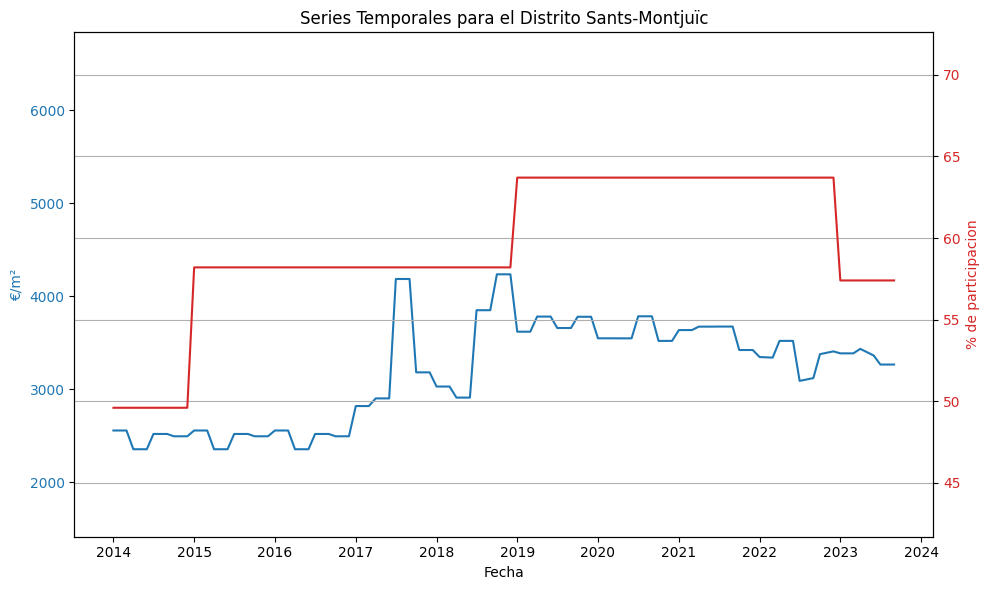

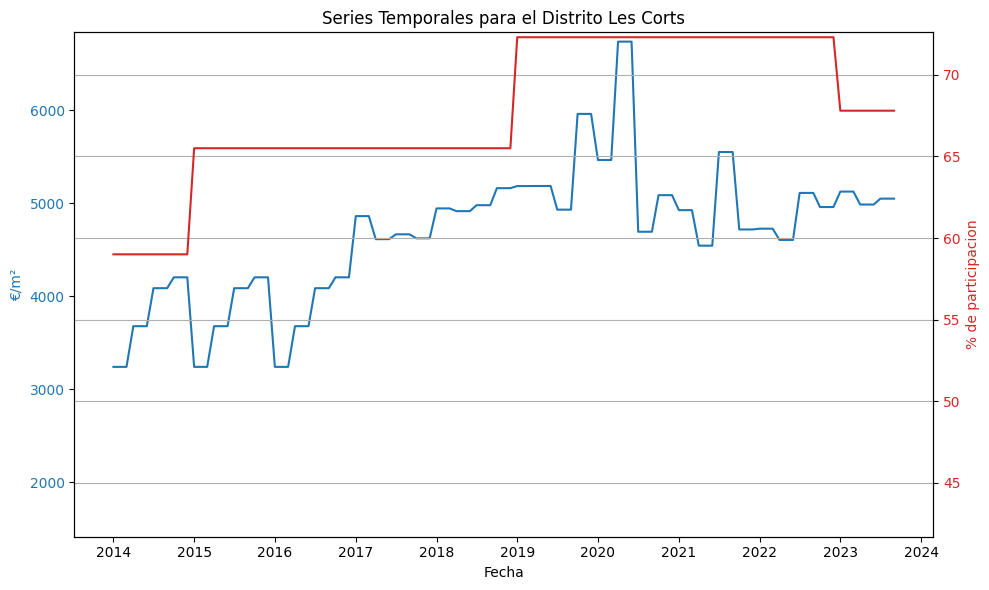

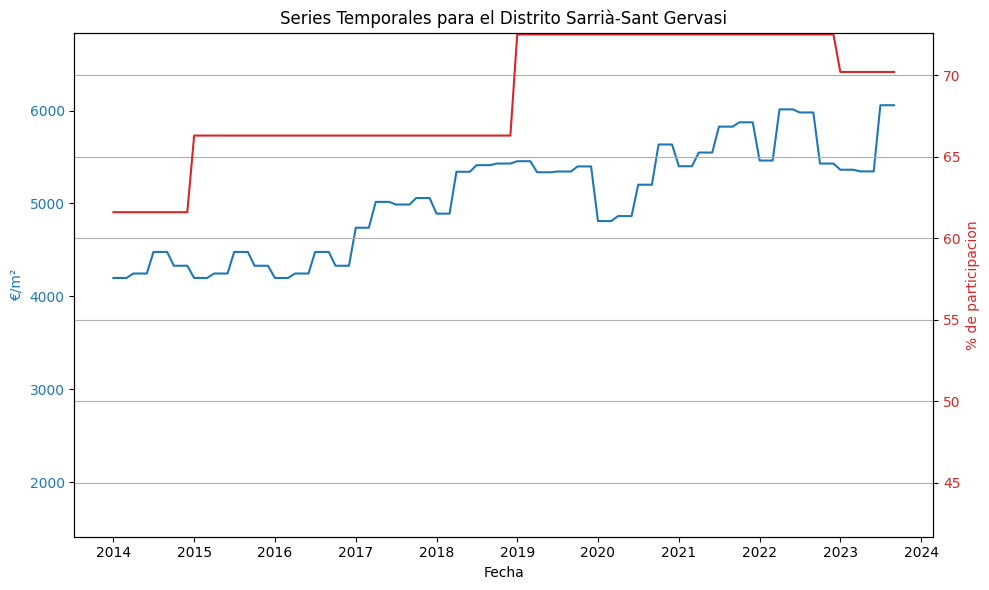

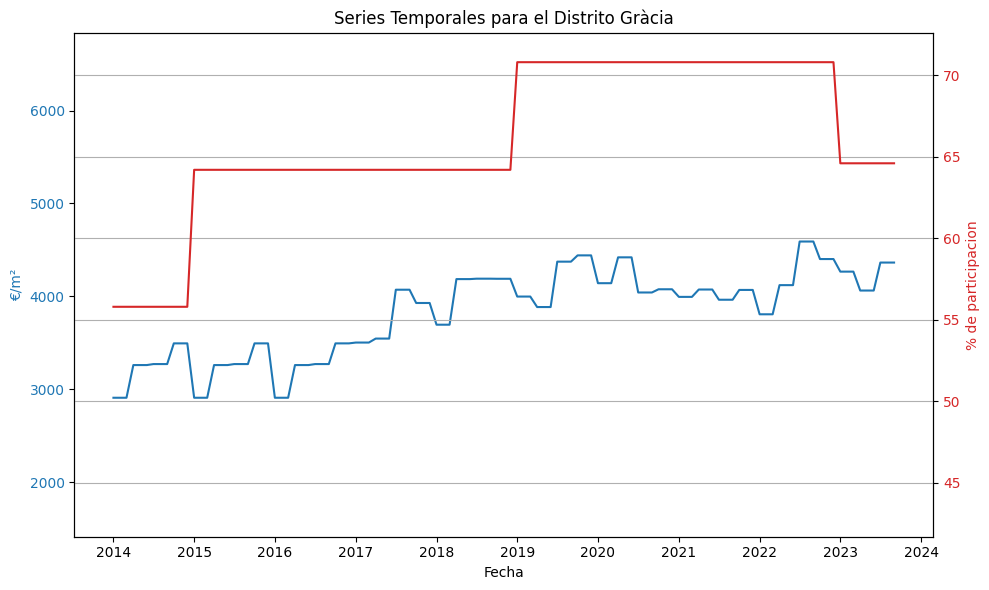

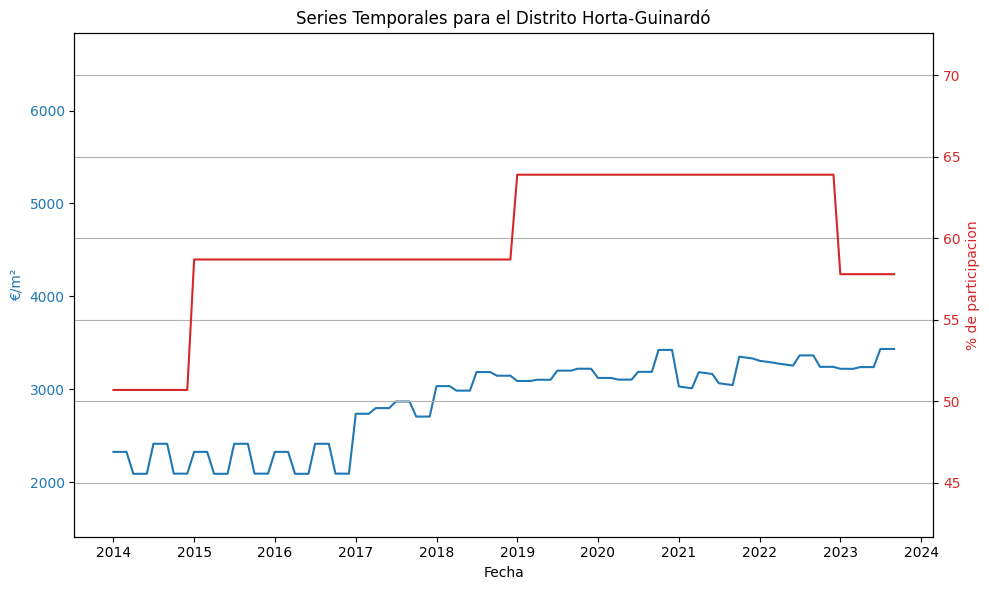

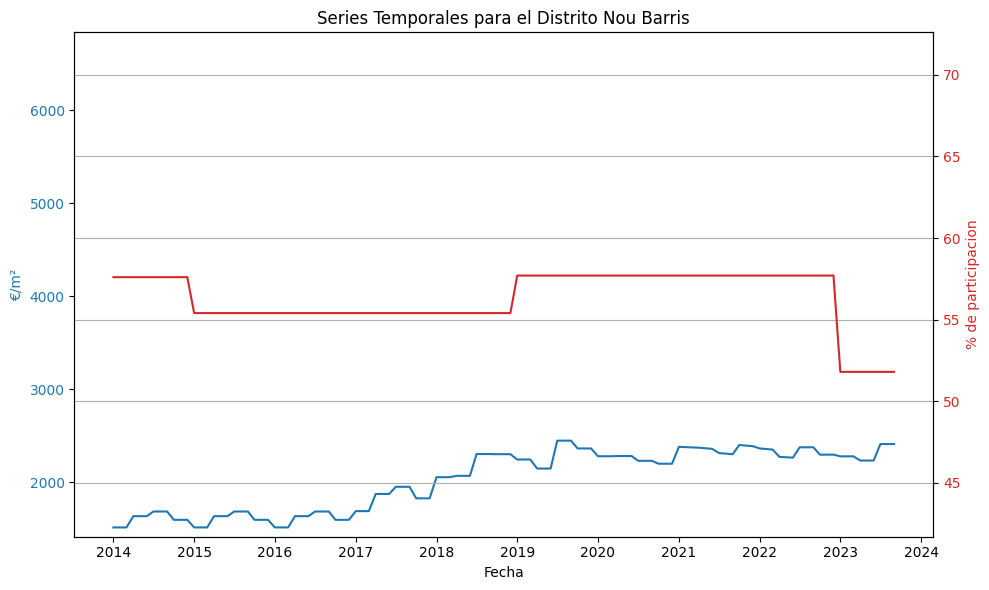

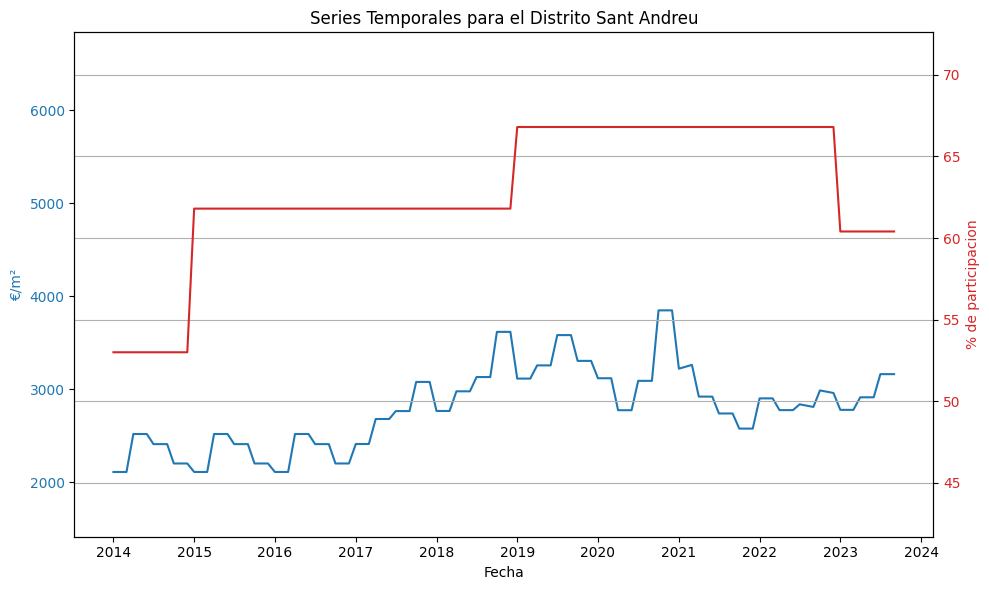

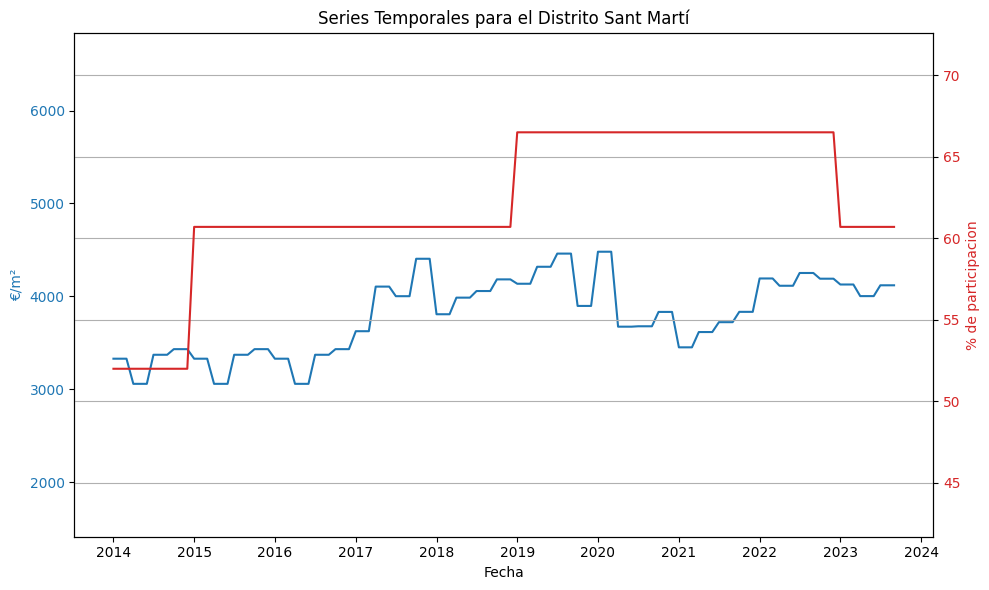

In [ ]:
# Establecer límites para los ejes y
ylim_serie1 = (df_merged['Compraventa_Unitario'].min()-100, df_merged['Compraventa_Unitario'].max()+100)  # Límites para Serie1
ylim_serie2 = (df_merged['Participacion'].min()-0.1, df_merged['Participacion'].max()+0.1)  # Límites para Serie2

#Crear un gráfico para la media de 'Compraventa_Unitario' por cada categoría, año y mes
for categoria, datos_categoria in df_merged.groupby(['Codi_Districte', 'Nom_Districte']):
    # Crear una figura y un conjunto de ejes
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Serie1 en el primer eje y (izquierda)
    color1 = 'tab:blue'
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('€/m²', color=color1)
    ax1.plot(datos_categoria.index, datos_categoria['Compraventa_Unitario'], label=f'Media de Compraventa_Unitario', color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.set_ylim(ylim_serie1)  # Establecer límites para Serie1

    # Crear un segundo eje y (derecha) para Serie2
    ax2 = ax1.twinx()
    color2 = 'tab:red'
    ax2.set_ylabel('% de participacion', color=color2)
    ax2.plot(datos_categoria.index, datos_categoria['Participacion'], label=f'Media de participacion electoral', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)
    ax2.set_ylim(ylim_serie2)  # Establecer límites para Serie2

    # Añadir título y leyendas
    plt.title(f'Series Temporales para el Distrito {categoria[1]}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Independientemente de la escala de las dos variables, en la grafica se puede diferenciar entre la tendencia de valor de compraventas unitario y la tendencia del porcentaje de participacion electoral. Ambas series tiene una tendencia al alza. Curiosamente parace que cuanto mas elevado es el unitario de compraventa, el porcentaje de participación tambien es mas alto.

Generalizando se puede decir que a mas unitario de compraventa, mejor porcentaje de participacion electoral o viceversa. Si analizamos los casos de Nou Barris con el unitario de mercado mas bajo de toda la ciudad de Barcelona, tambien observamos que el % de participacion electoral tambien es el más bajo de toda la ciudad. Por otro lado si nos fijamos en el distrito de Sarrià-Sant Gervasi donde el unitario de compraventa es el más alto de toda la ciudad de Barcelona, el % porcentaje de participacion electoral tambien lo es.

###Compraventa Unitario vs indicador nº46. Esperanza de vida media

In [ ]:
df_esper = data[['Any', 'Trimestre', 'Mes', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Compraventa_Unitario', 'AñosEspVida']]

In [ ]:
df_esper.head()

Any  Trimestre  Mes  Codi_Districte Nom_Districte  Codi_Barri  \
Fecha                                                                        
2014-01-01  2014          1    1               1  Ciutat Vella           1   
2014-02-01  2014          1    2               1  Ciutat Vella           1   
2014-03-01  2014          1    3               1  Ciutat Vella           1   
2014-04-01  2014          2    4               1  Ciutat Vella           1   
2014-05-01  2014          2    5               1  Ciutat Vella           1   

           Nom_Barri  Compraventa_Unitario  AñosEspVida  
Fecha                                                    
2014-01-01  el Raval                2813.0         80.7  
2014-02-01  el Raval                2813.0         80.7  
2014-03-01  el Raval                2813.0         80.7  
2014-04-01  el Raval                2948.8         80.7  
2014-05-01  el Raval                2948.8         80.7

In [ ]:
df_esper.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8541 entries, 2014-01-01 to 2023-09-01
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Any                   8541 non-null   int64  
 1   Trimestre             8541 non-null   int64  
 2   Mes                   8541 non-null   int64  
 3   Codi_Districte        8541 non-null   int64  
 4   Nom_Districte         8541 non-null   object 
 5   Codi_Barri            8541 non-null   int64  
 6   Nom_Barri             8541 non-null   object 
 7   Compraventa_Unitario  8541 non-null   float64
 8   AñosEspVida           4968 non-null   float64
dtypes: float64(2), int64(5), object(2)
memory usage: 667.3+ KB


In [ ]:
df_esper=df_esper.dropna()

In [ ]:
# Calcular la media de 'Compraventa_Unitario' agrupada por categoría, año y mes
media_compraventa = df_esper.groupby(['Codi_Districte', 'Nom_Districte','Any', 'Mes'])['Compraventa_Unitario'].mean().reset_index()

In [ ]:
# Calcular la suma de 'ConsumResidencial' agrupada por categoría
media_esper = df_esper.groupby(['Codi_Districte', 'Nom_Districte','Any', 'Mes'])['AñosEspVida'].mean().reset_index()

In [ ]:
# Unimos los dos dataframes
df_merged = pd.merge(media_compraventa, media_esper, how='inner', left_on=['Codi_Districte',	'Nom_Districte',	'Any',	'Mes'], right_on=['Codi_Districte',	'Nom_Districte',	'Any',	'Mes'])

In [ ]:
# Añadimos la columna de fecha y la establecemos como indice
df_merged['Fecha'] = df_merged.apply(lambda row: pd.to_datetime(f"{row[2]}-{row[3]}"), axis=1)
df_merged.set_index('Fecha', inplace=True)

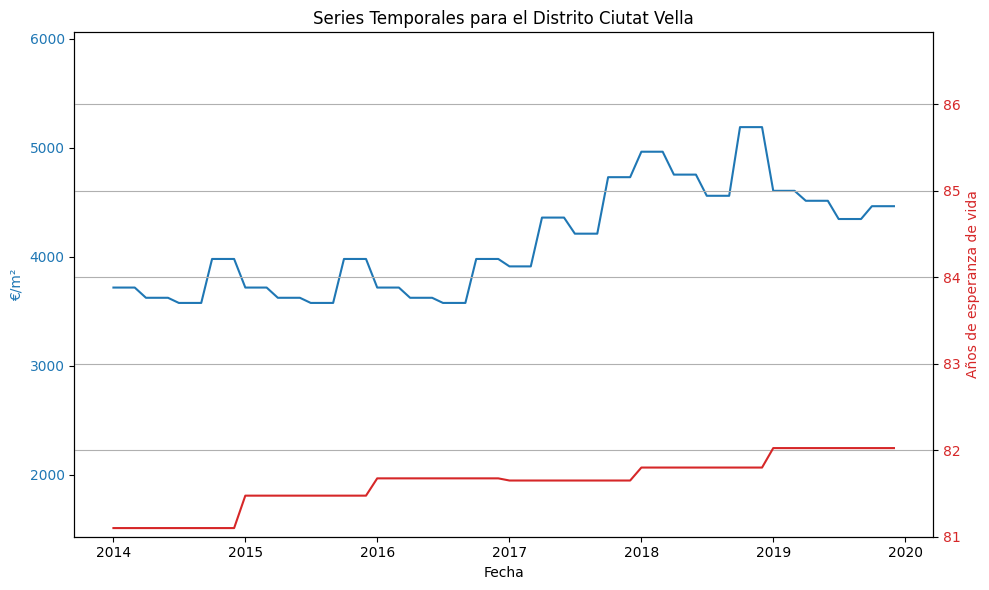

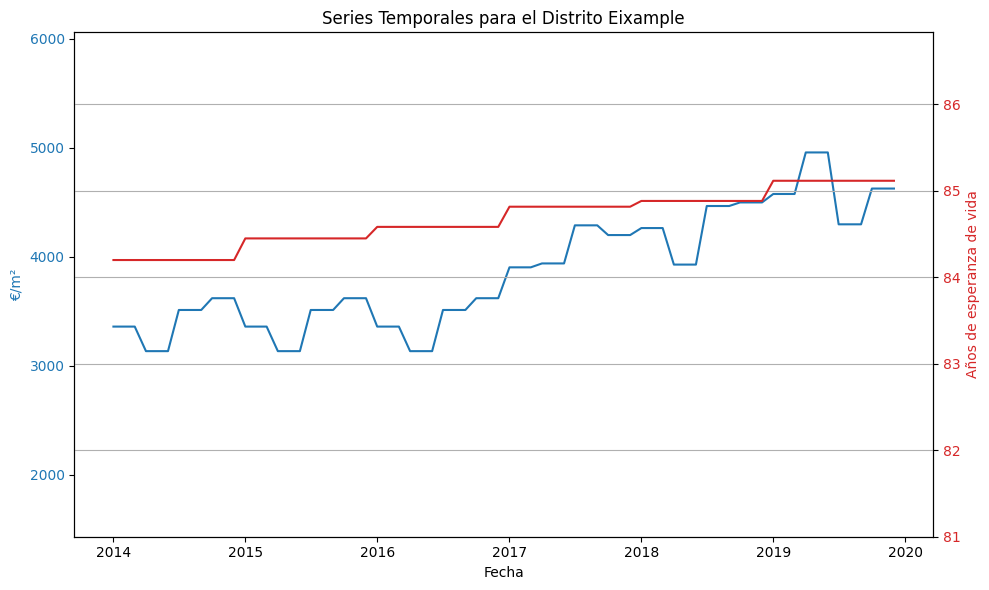

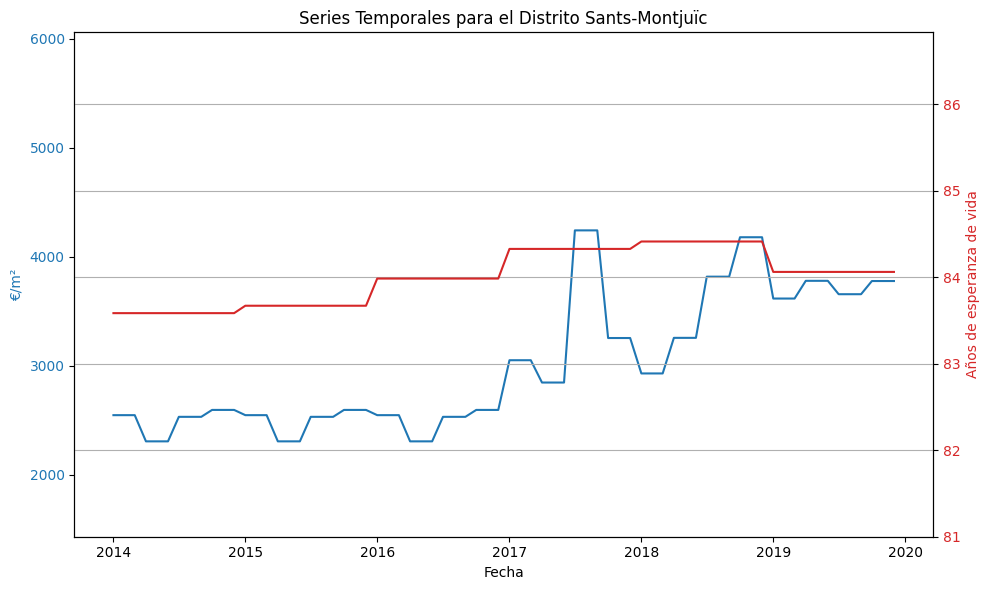

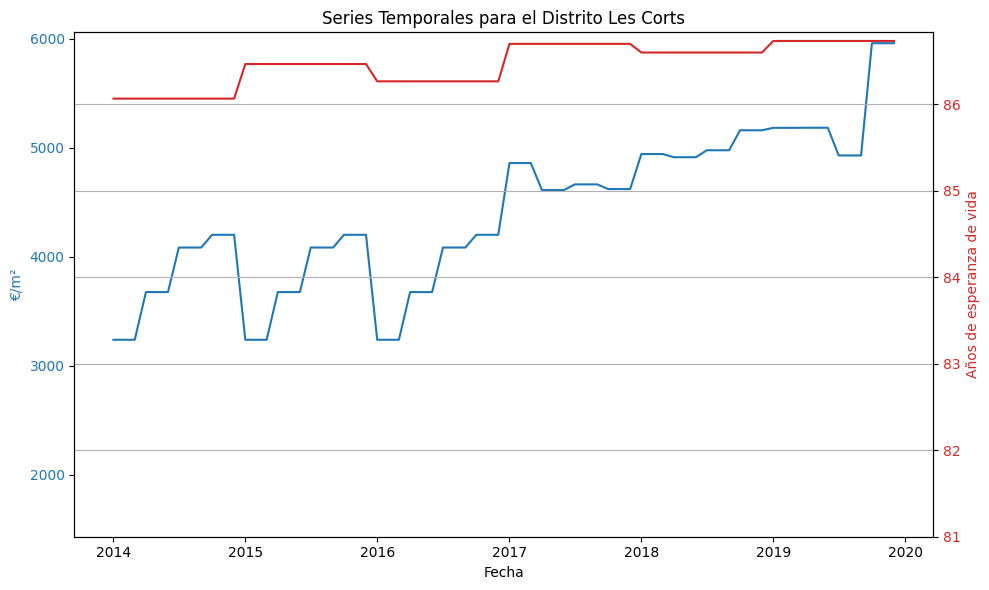

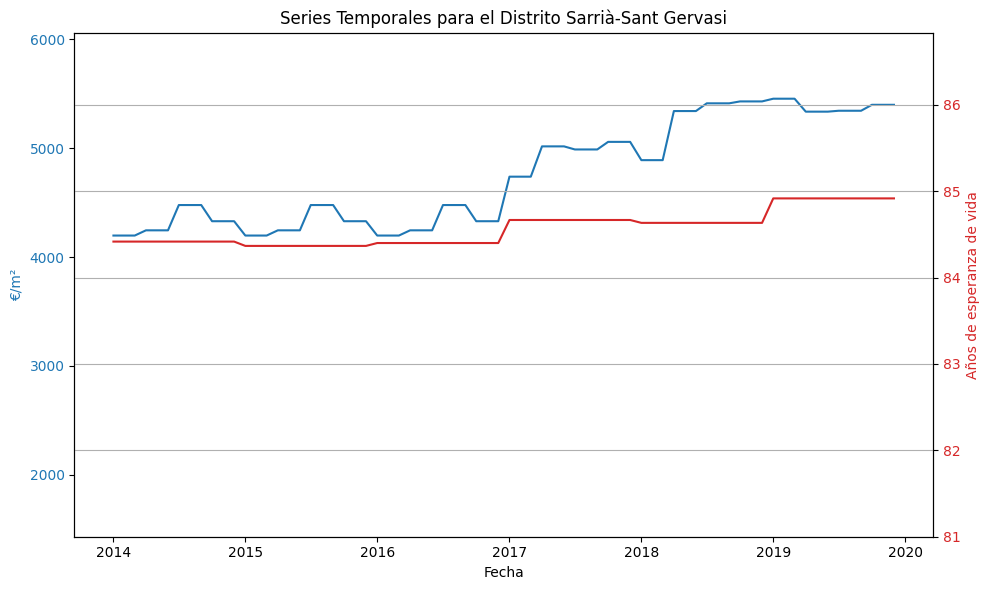

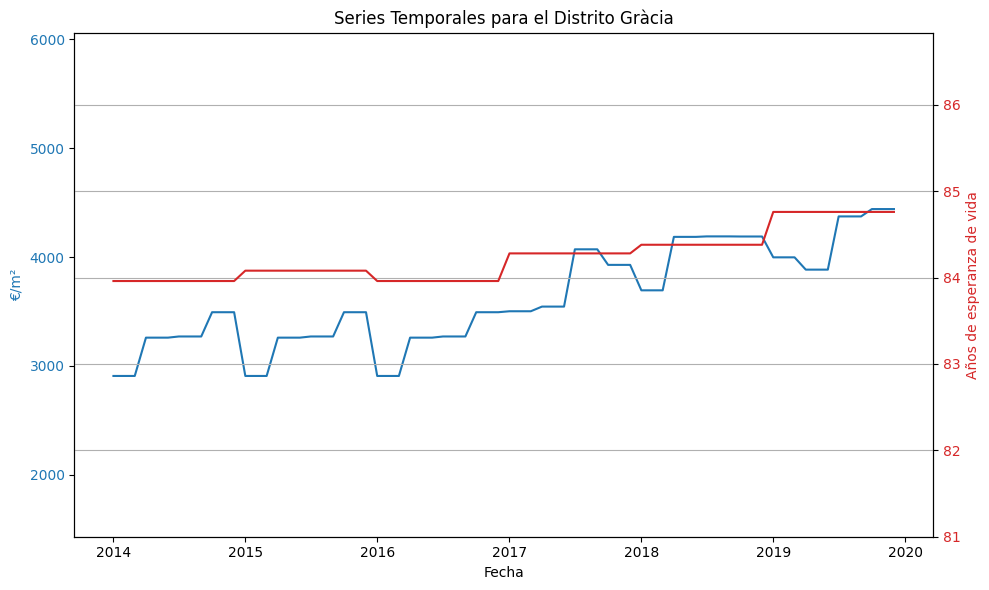

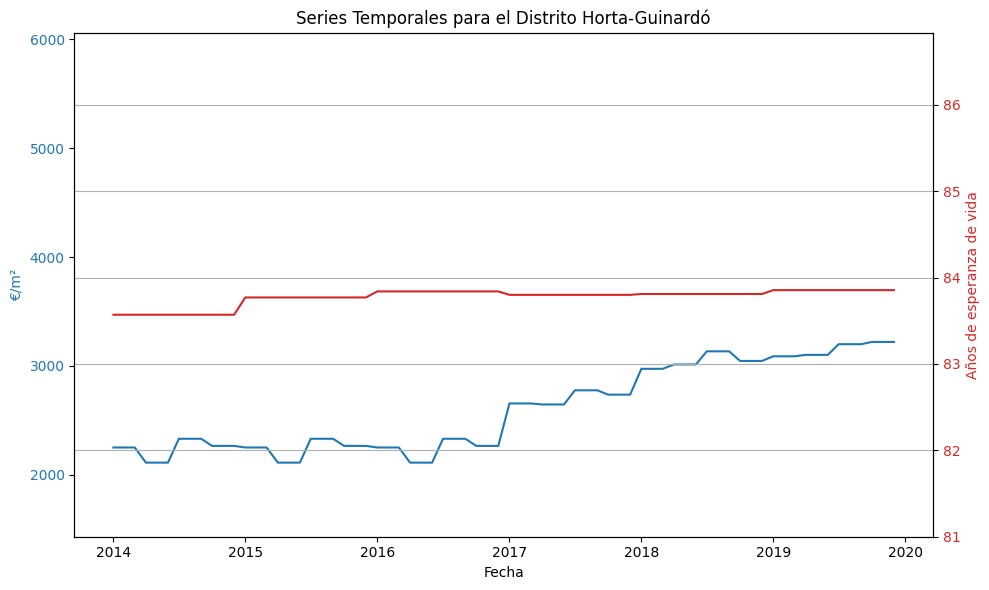

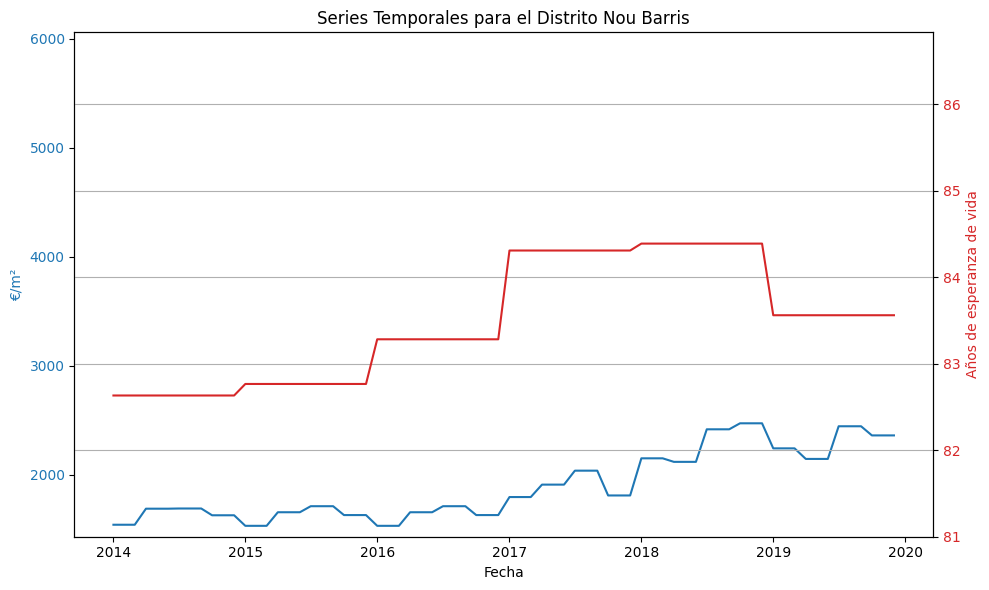

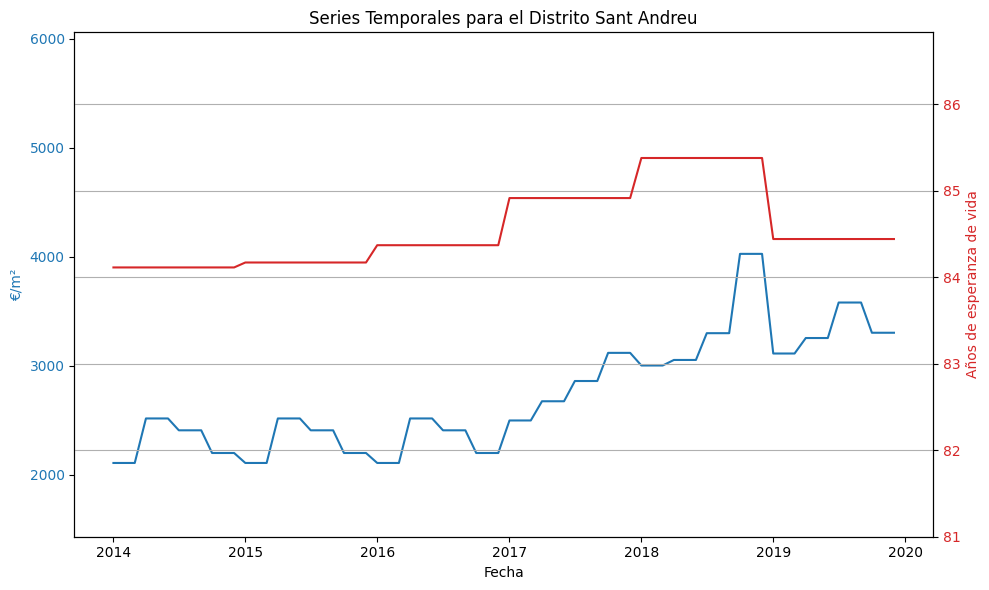

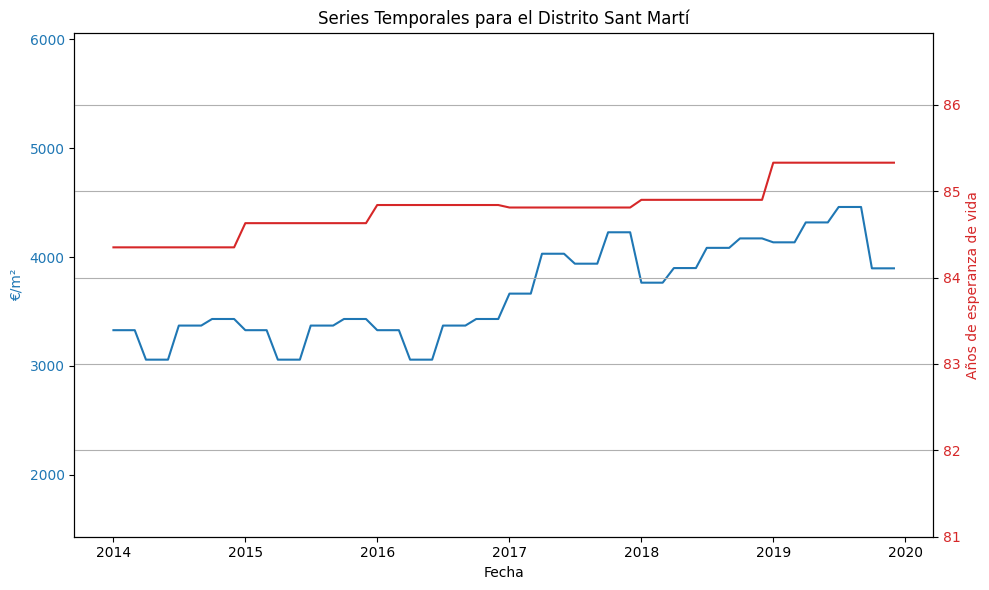

In [ ]:
# Establecer límites para los ejes y
ylim_serie1 = (df_merged['Compraventa_Unitario'].min()-100, df_merged['Compraventa_Unitario'].max()+100)  # Límites para Serie1
ylim_serie2 = (df_merged['AñosEspVida'].min()-0.1, df_merged['AñosEspVida'].max()+0.1)  # Límites para Serie2

#Crear un gráfico para la media de 'Compraventa_Unitario' por cada categoría, año y mes
for categoria, datos_categoria in df_merged.groupby(['Codi_Districte', 'Nom_Districte']):
    # Crear una figura y un conjunto de ejes
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Serie1 en el primer eje y (izquierda)
    color1 = 'tab:blue'
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('€/m²', color=color1)
    ax1.plot(datos_categoria.index, datos_categoria['Compraventa_Unitario'], label=f'Media de Compraventa_Unitario', color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.set_ylim(ylim_serie1)  # Establecer límites para Serie1

    # Crear un segundo eje y (derecha) para Serie2
    ax2 = ax1.twinx()
    color2 = 'tab:red'
    ax2.set_ylabel('Años de esperanza de vida', color=color2)
    ax2.plot(datos_categoria.index, datos_categoria['AñosEspVida'], label=f'Media de esperanza de vida', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)
    ax2.set_ylim(ylim_serie2)  # Establecer límites para Serie2

    # Añadir título y leyendas
    plt.title(f'Series Temporales para el Distrito {categoria[1]}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Independientemente de la escala de las dos variables, en la grafica se puede diferenciar entre la tendencia de valor de compraventas unitario y la tendencia de los años de esperanza de vida. Ambas series tiene una tendencia al alza. Curiosamente parace que cuanto más elevado es el unitario de compraventa, los años de esperanza de vida tambien son más altos.

Con estas dos series temporales, se observan diferentes realidades que no permiten generalizar. Por ejemplo, el distrito de Sarrià-Sant Gervasi donde el unitario de compraventa es el más alto de toda la ciudad de Barcelona, tiene una esperanza de vida entre los 84 y los 85 años, siendo bastante superior el rango de Les Corts con casi 87 años de esperanza de vida. O si nos fijamos en el distrito de Nou Barris con el unitario de compraventa más bajo de toda la ciudad, tiene una esperanza de vida entre los 83 y los 84 años, estando por encima del distrito de Ciutat Vella, con una esperanza de vida de alrededor de 82 años.

###Compraventa Unitario vs indicador nº73. Internet

In [ ]:
df_internet = data[['Any', 'Trimestre', 'Mes', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Compraventa_Unitario', 'Internet']]

In [ ]:
df_internet.head()

Any  Trimestre  Mes  Codi_Districte Nom_Districte  Codi_Barri  \
Fecha                                                                        
2014-01-01  2014          1    1               1  Ciutat Vella           1   
2014-02-01  2014          1    2               1  Ciutat Vella           1   
2014-03-01  2014          1    3               1  Ciutat Vella           1   
2014-04-01  2014          2    4               1  Ciutat Vella           1   
2014-05-01  2014          2    5               1  Ciutat Vella           1   

           Nom_Barri  Compraventa_Unitario  Internet  
Fecha                                                 
2014-01-01  el Raval                2813.0       NaN  
2014-02-01  el Raval                2813.0       NaN  
2014-03-01  el Raval                2813.0       NaN  
2014-04-01  el Raval                2948.8       NaN  
2014-05-01  el Raval                2948.8       NaN

In [ ]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8541 entries, 2014-01-01 to 2023-09-01
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Any                   8541 non-null   int64  
 1   Trimestre             8541 non-null   int64  
 2   Mes                   8541 non-null   int64  
 3   Codi_Districte        8541 non-null   int64  
 4   Nom_Districte         8541 non-null   object 
 5   Codi_Barri            8541 non-null   int64  
 6   Nom_Barri             8541 non-null   object 
 7   Compraventa_Unitario  8541 non-null   float64
 8   Internet              6132 non-null   float64
dtypes: float64(2), int64(5), object(2)
memory usage: 667.3+ KB


In [ ]:
df_internet=df_internet.dropna()

In [ ]:
# Calcular la media de 'Compraventa_Unitario' agrupada por categoría, año y mes
media_compraventa = df_internet.groupby(['Codi_Districte', 'Nom_Districte','Any', 'Mes'])['Compraventa_Unitario'].mean().reset_index()

In [ ]:
# Calcular la suma de 'ConsumResidencial' agrupada por categoría
media_internet = df_internet.groupby(['Codi_Districte', 'Nom_Districte','Any', 'Mes'])['Internet'].mean().reset_index()

In [ ]:
# Unimos los dos dataframes
df_merged = pd.merge(media_compraventa, media_internet, how='inner', left_on=['Codi_Districte',	'Nom_Districte',	'Any',	'Mes'], right_on=['Codi_Districte',	'Nom_Districte',	'Any',	'Mes'])

In [ ]:
# Añadimos la columna de fecha y la establecemos como indice
df_merged['Fecha'] = df_merged.apply(lambda row: pd.to_datetime(f"{row[2]}-{row[3]}"), axis=1)
df_merged.set_index('Fecha', inplace=True)

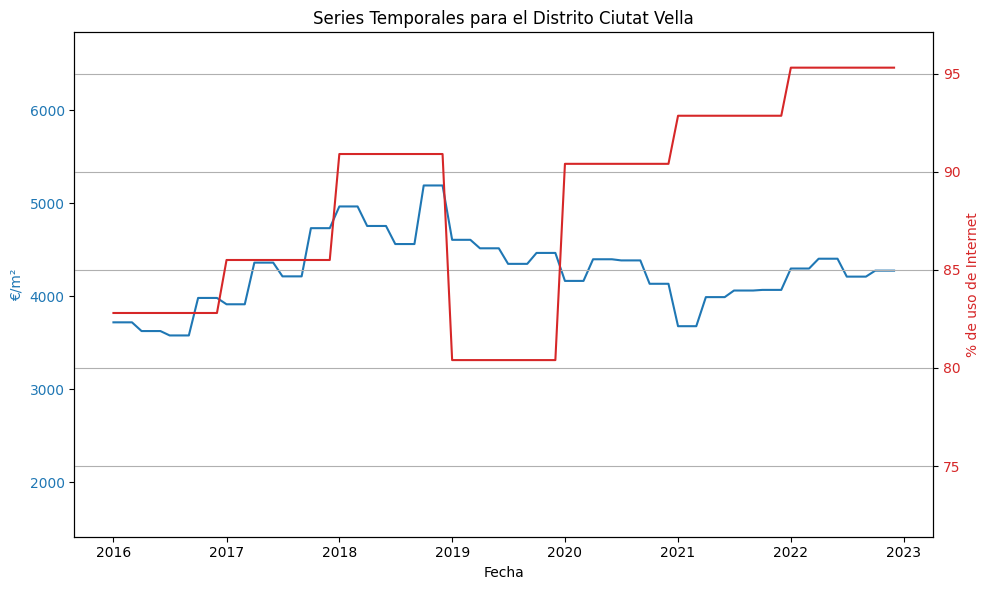

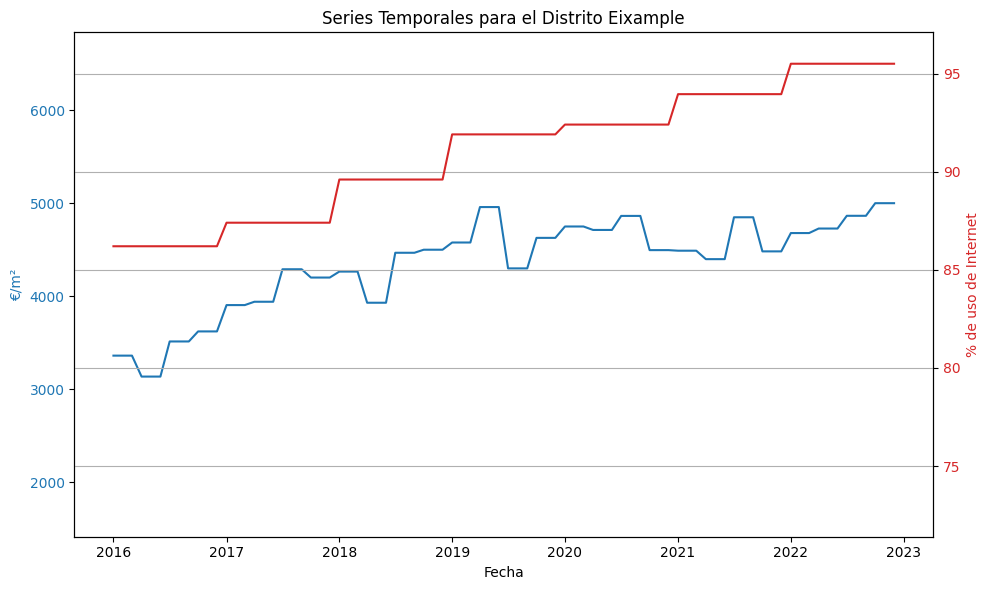

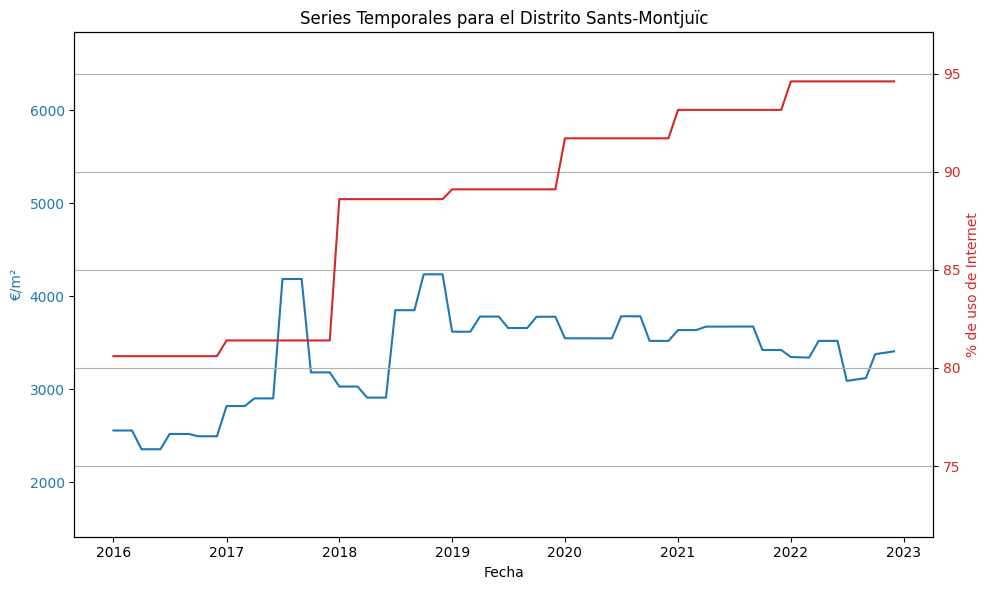

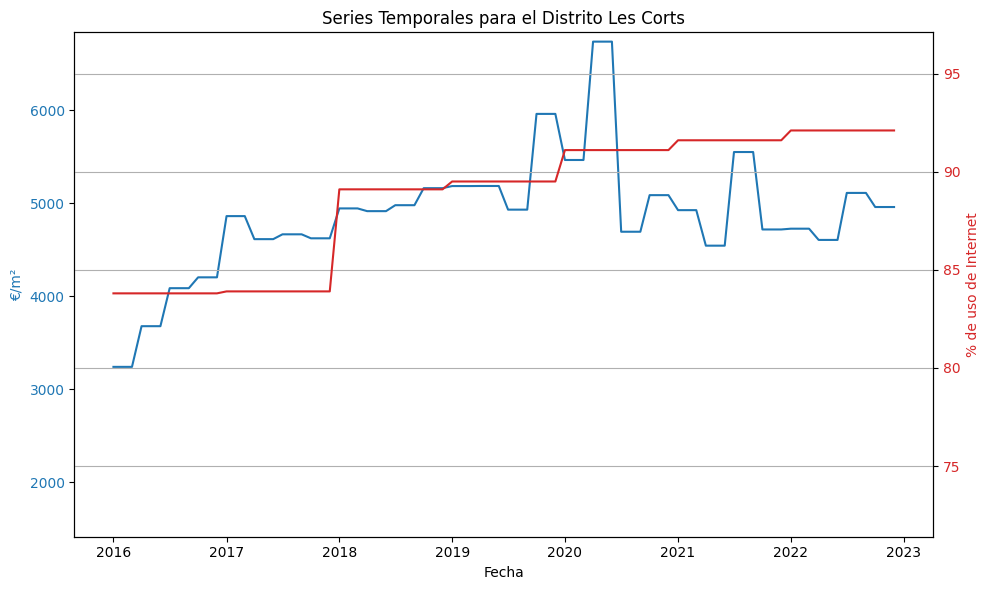

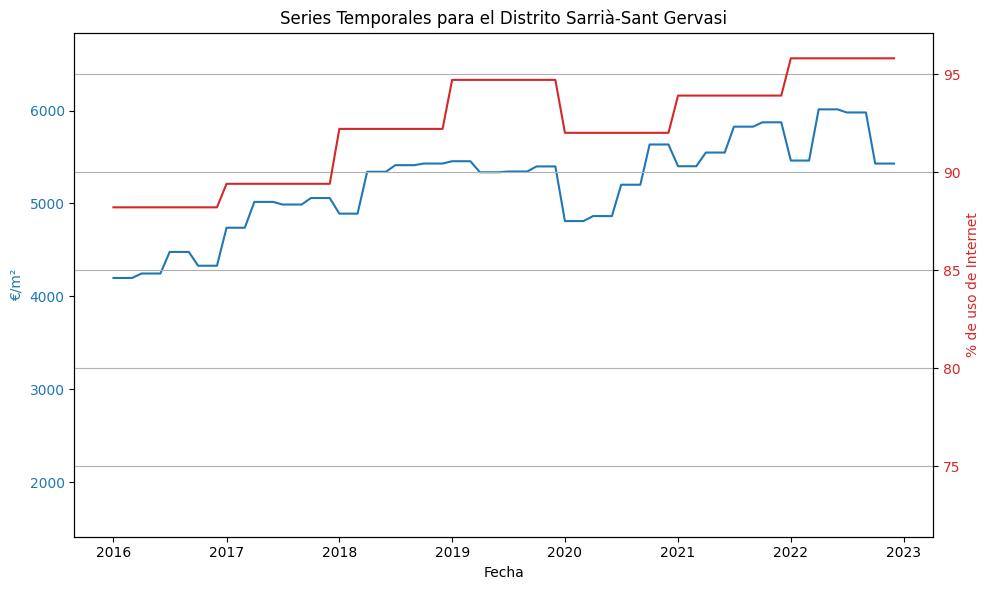

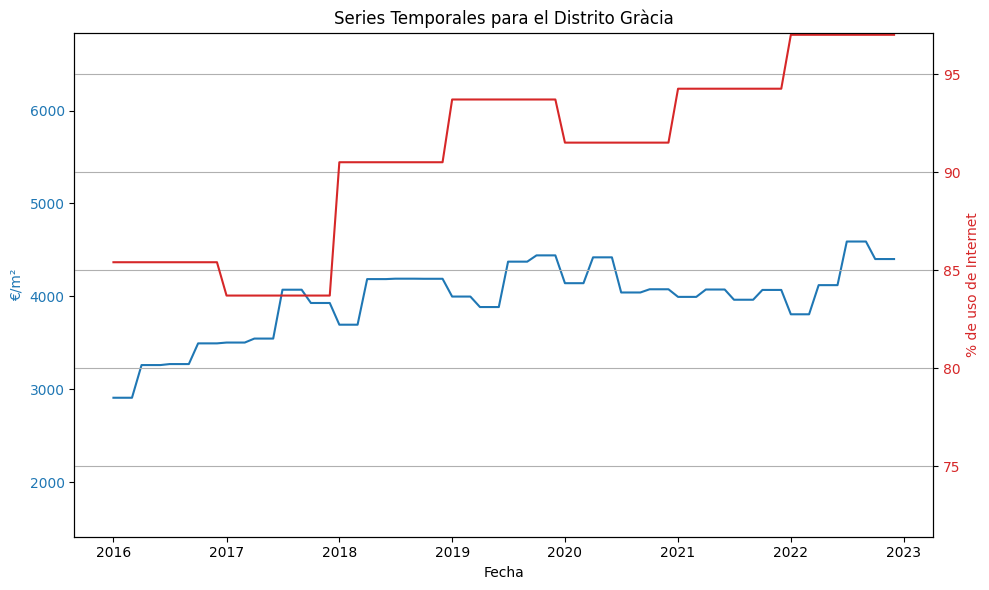

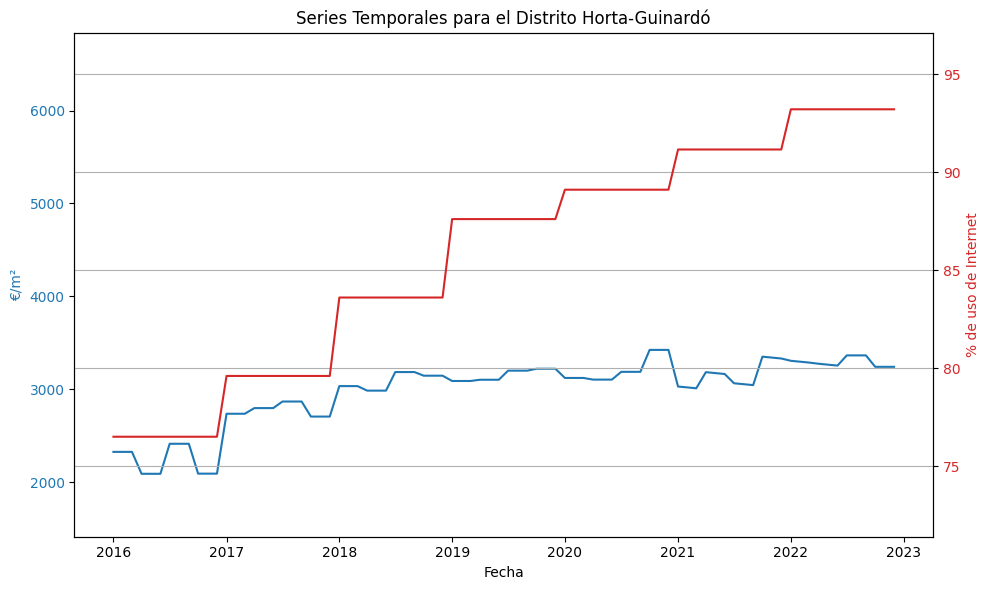

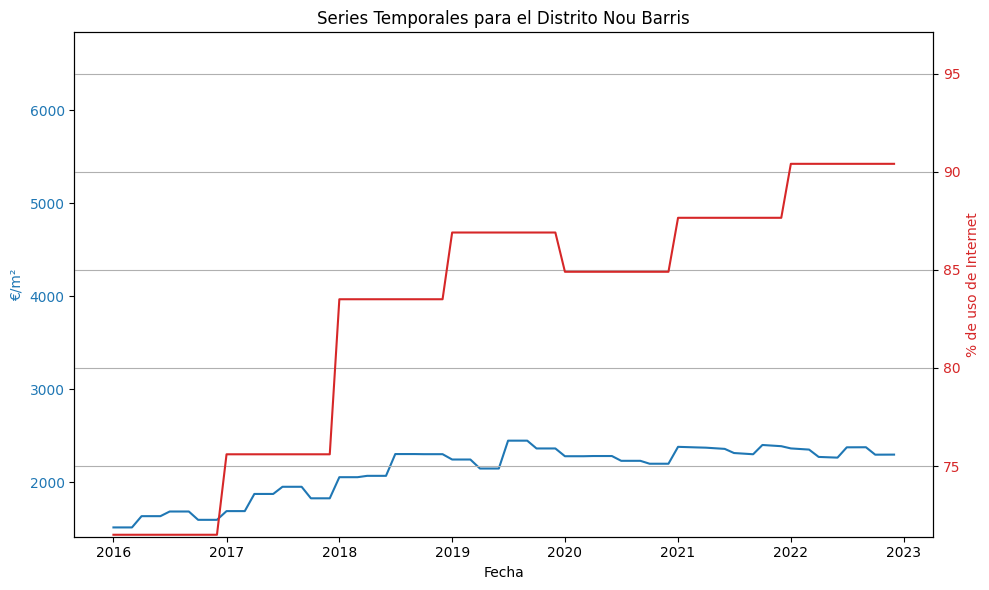

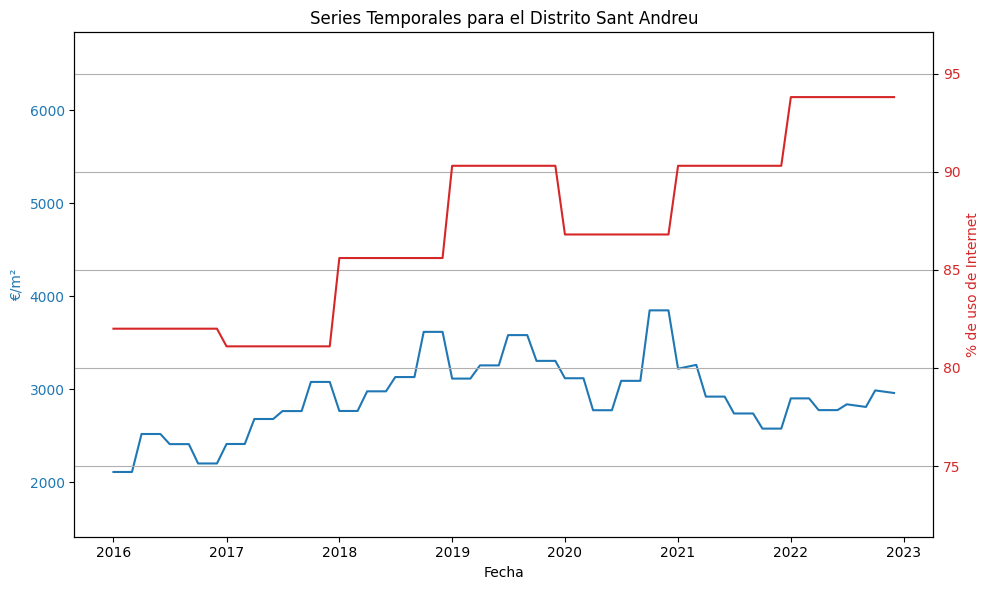

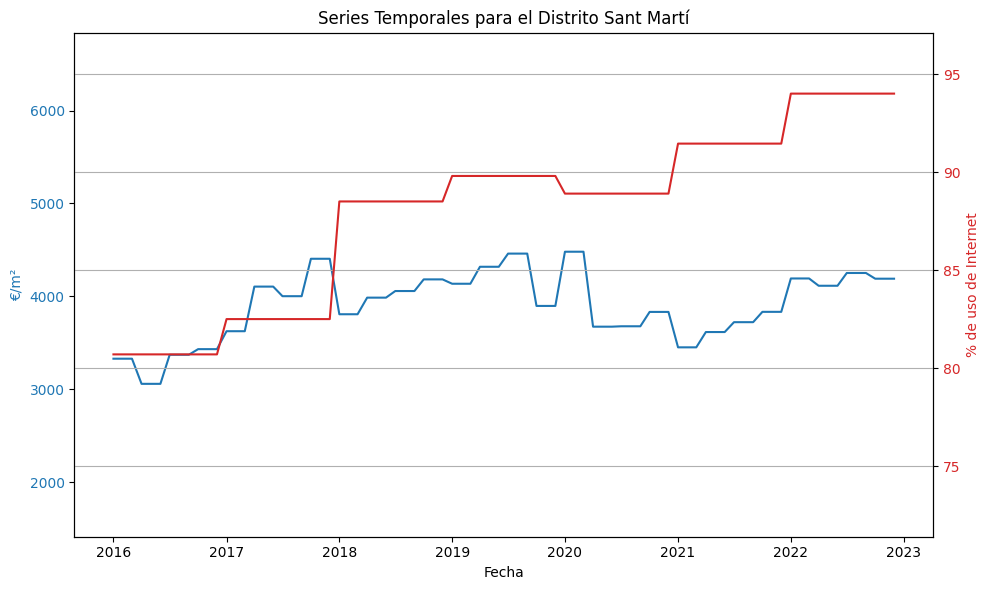

In [ ]:
# Establecer límites para los ejes y
ylim_serie1 = (df_merged['Compraventa_Unitario'].min()-100, df_merged['Compraventa_Unitario'].max()+100)  # Límites para Serie1
ylim_serie2 = (df_merged['Internet'].min()-0.1, df_merged['Internet'].max()+0.1)  # Límites para Serie2

#Crear un gráfico para la media de 'Compraventa_Unitario' por cada categoría, año y mes
for categoria, datos_categoria in df_merged.groupby(['Codi_Districte', 'Nom_Districte']):
    # Crear una figura y un conjunto de ejes
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Serie1 en el primer eje y (izquierda)
    color1 = 'tab:blue'
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('€/m²', color=color1)
    ax1.plot(datos_categoria.index, datos_categoria['Compraventa_Unitario'], label=f'Media de Compraventa_Unitario', color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.set_ylim(ylim_serie1)  # Establecer límites para Serie1

    # Crear un segundo eje y (derecha) para Serie2
    ax2 = ax1.twinx()
    color2 = 'tab:red'
    ax2.set_ylabel('% de uso de Internet', color=color2)
    ax2.plot(datos_categoria.index, datos_categoria['Internet'], label=f'Media de uso de Internet', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)
    ax2.set_ylim(ylim_serie2)  # Establecer límites para Serie2

    # Añadir título y leyendas
    plt.title(f'Series Temporales para el Distrito {categoria[1]}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Independientemente de la escala de las dos variables, en la grafica se puede diferenciar entre la tendencia de valor de compraventas unitario y la tendencia del % de uso de Internet. Ambas series tiene una tendencia al alza.

Generalizando, podriamos decir que a mas unitario de compraventa, mayor porcentaje de uso de Internet. En el distrito de Nou Barris con el unitario de compraventa más bajo de toda la ciudad de Barcelona, tambien se observa el % mas bajo de uso de Internet.

###Compraventa Unitario vs indicador nº74. Movil

In [ ]:
df_movil = data[['Any', 'Trimestre', 'Mes', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Compraventa_Unitario', 'Movil']]

In [ ]:
df_movil.head()

Any  Trimestre  Mes  Codi_Districte Nom_Districte  Codi_Barri  \
Fecha                                                                        
2014-01-01  2014          1    1               1  Ciutat Vella           1   
2014-02-01  2014          1    2               1  Ciutat Vella           1   
2014-03-01  2014          1    3               1  Ciutat Vella           1   
2014-04-01  2014          2    4               1  Ciutat Vella           1   
2014-05-01  2014          2    5               1  Ciutat Vella           1   

           Nom_Barri  Compraventa_Unitario  Movil  
Fecha                                              
2014-01-01  el Raval                2813.0    NaN  
2014-02-01  el Raval                2813.0    NaN  
2014-03-01  el Raval                2813.0    NaN  
2014-04-01  el Raval                2948.8    NaN  
2014-05-01  el Raval                2948.8    NaN

In [ ]:
df_movil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8541 entries, 2014-01-01 to 2023-09-01
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Any                   8541 non-null   int64  
 1   Trimestre             8541 non-null   int64  
 2   Mes                   8541 non-null   int64  
 3   Codi_Districte        8541 non-null   int64  
 4   Nom_Districte         8541 non-null   object 
 5   Codi_Barri            8541 non-null   int64  
 6   Nom_Barri             8541 non-null   object 
 7   Compraventa_Unitario  8541 non-null   float64
 8   Movil                 6132 non-null   float64
dtypes: float64(2), int64(5), object(2)
memory usage: 667.3+ KB


In [ ]:
df_movil=df_movil.dropna()

In [ ]:
# Calcular la media de 'Compraventa_Unitario' agrupada por categoría, año y mes
media_compraventa = df_movil.groupby(['Codi_Districte', 'Nom_Districte','Any', 'Mes'])['Compraventa_Unitario'].mean().reset_index()

In [ ]:
# Calcular la suma de 'ConsumResidencial' agrupada por categoría
media_movil = df_movil.groupby(['Codi_Districte', 'Nom_Districte','Any', 'Mes'])['Movil'].mean().reset_index()

In [ ]:
# Unimos los dos dataframes
df_merged = pd.merge(media_compraventa, media_movil, how='inner', left_on=['Codi_Districte',	'Nom_Districte',	'Any',	'Mes'], right_on=['Codi_Districte',	'Nom_Districte',	'Any',	'Mes'])

In [ ]:
# Añadimos la columna de fecha y la establecemos como indice
df_merged['Fecha'] = df_merged.apply(lambda row: pd.to_datetime(f"{row[2]}-{row[3]}"), axis=1)
df_merged.set_index('Fecha', inplace=True)

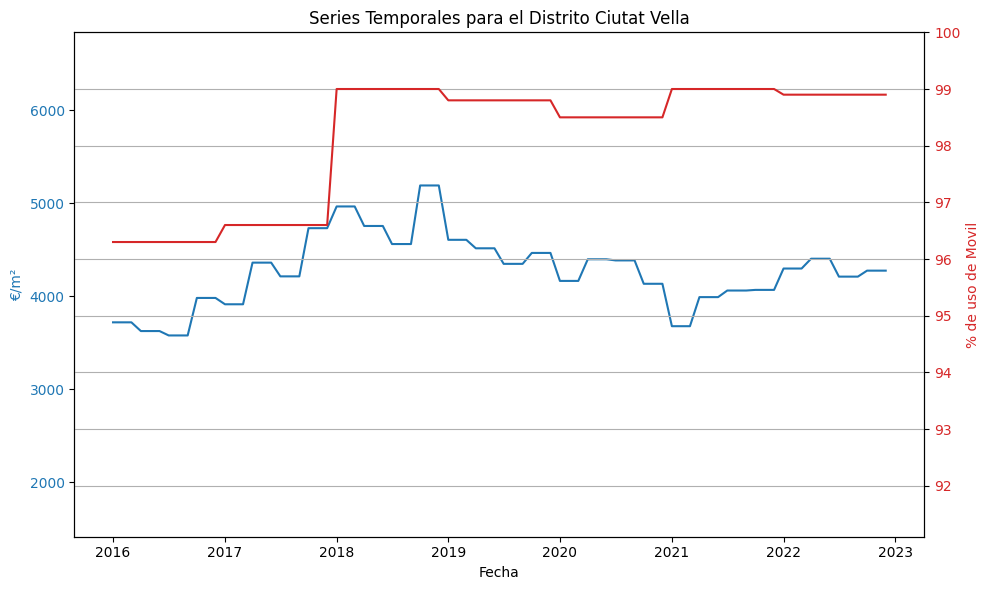

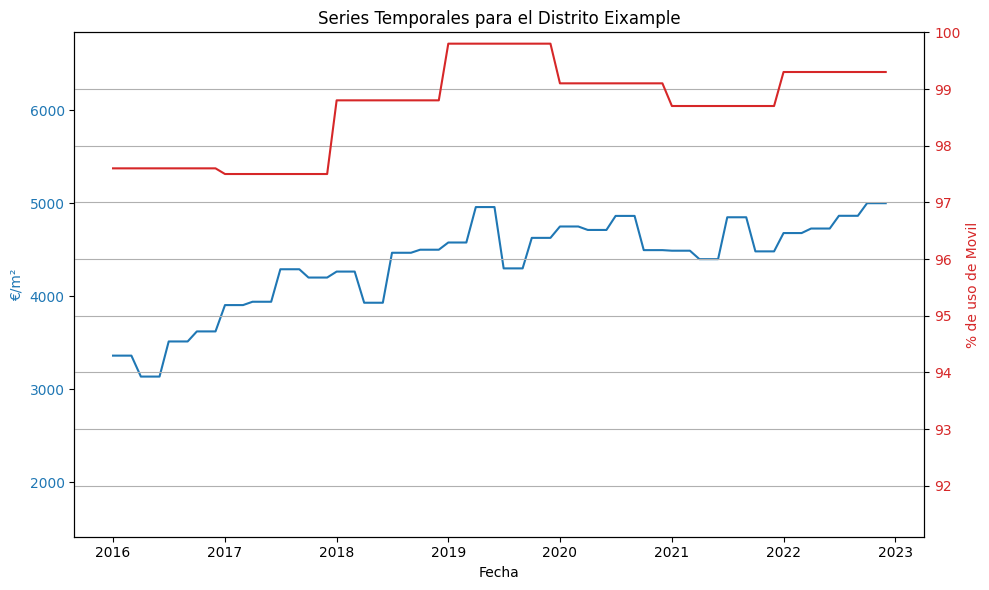

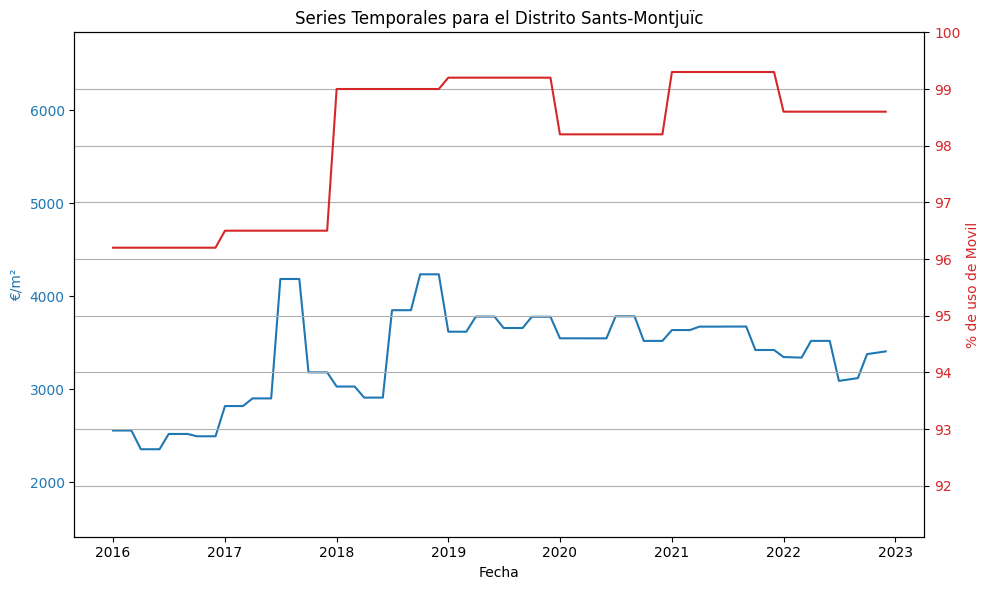

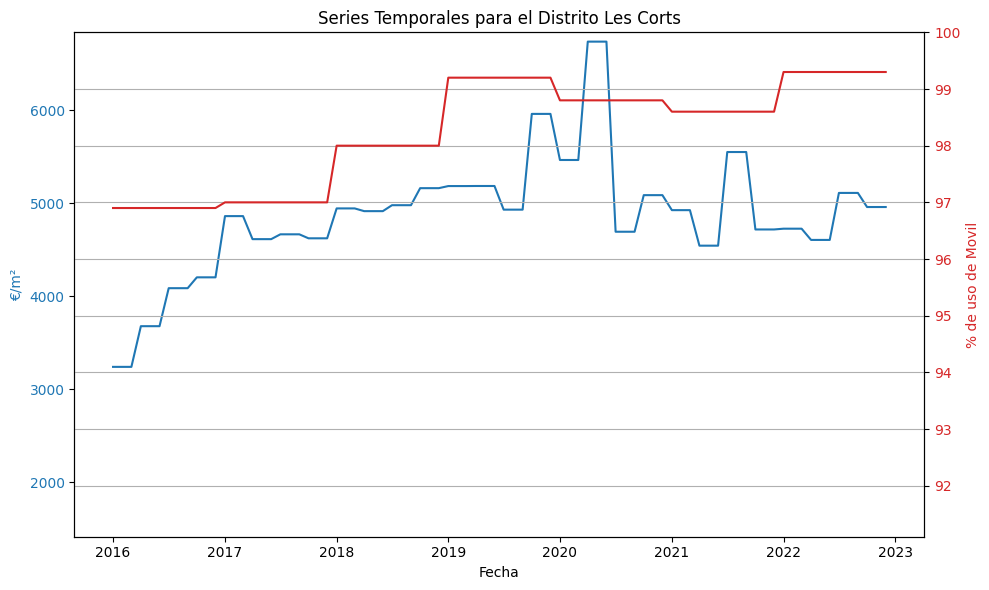

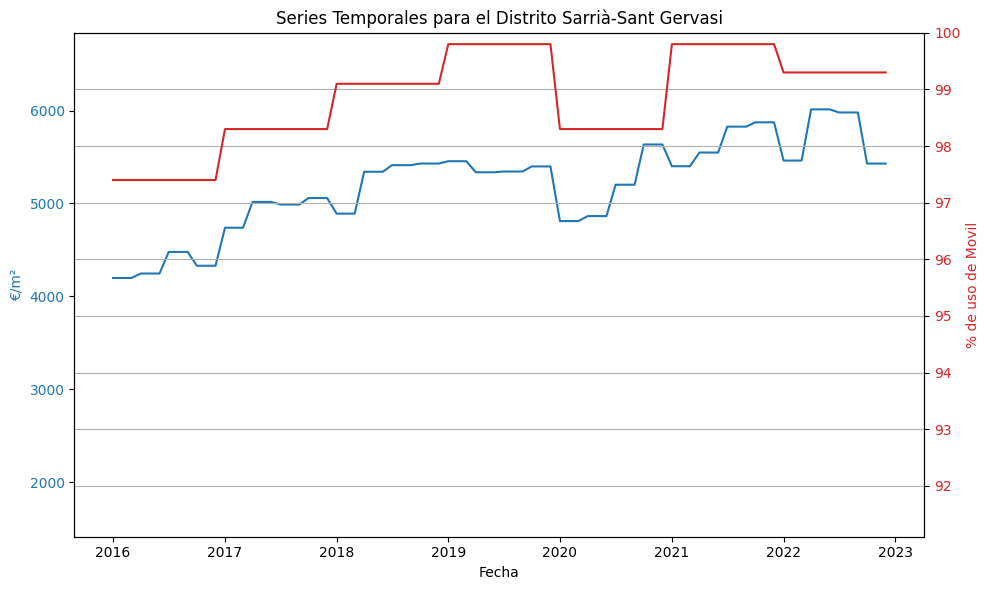

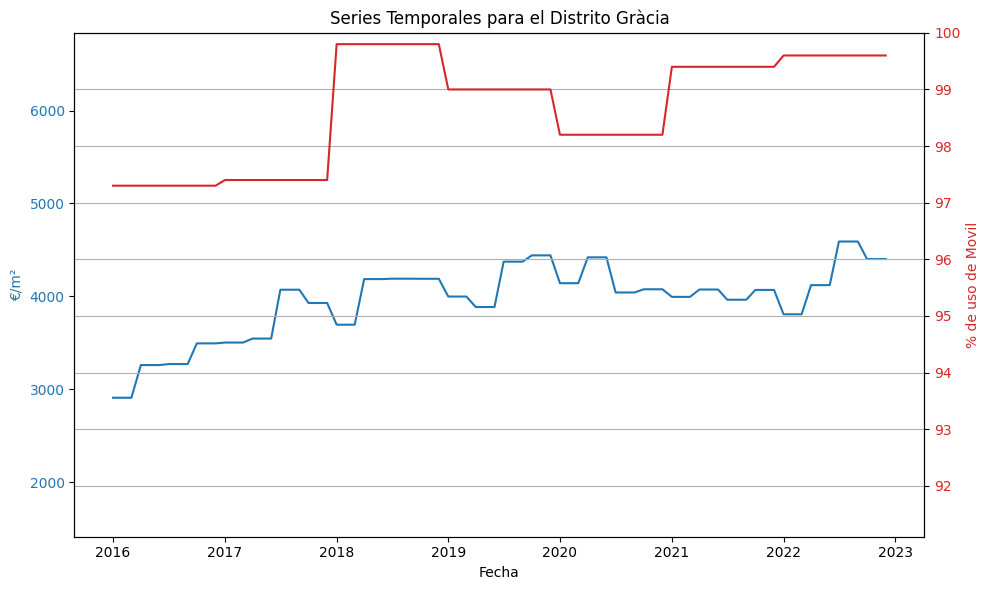

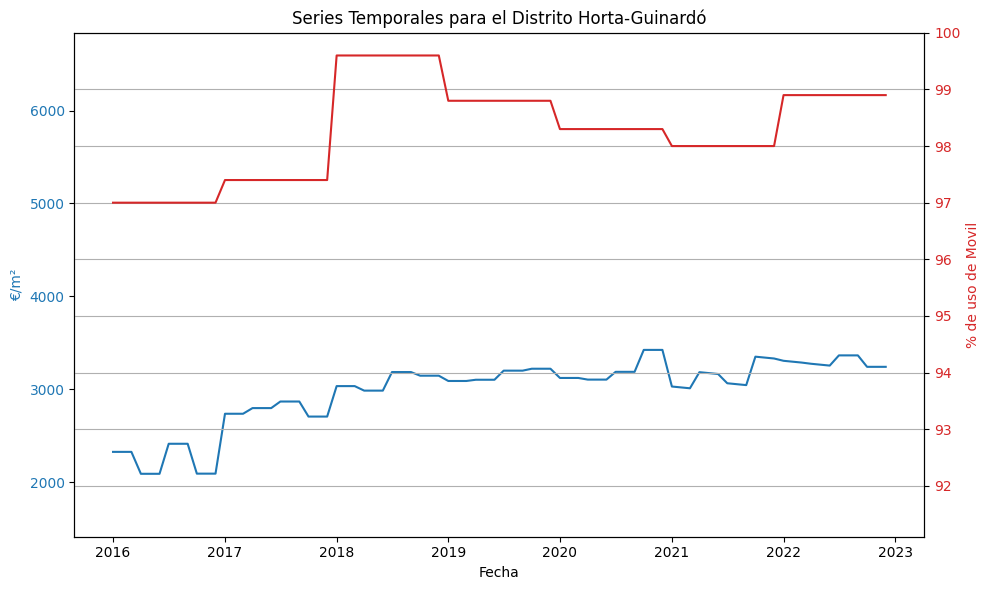

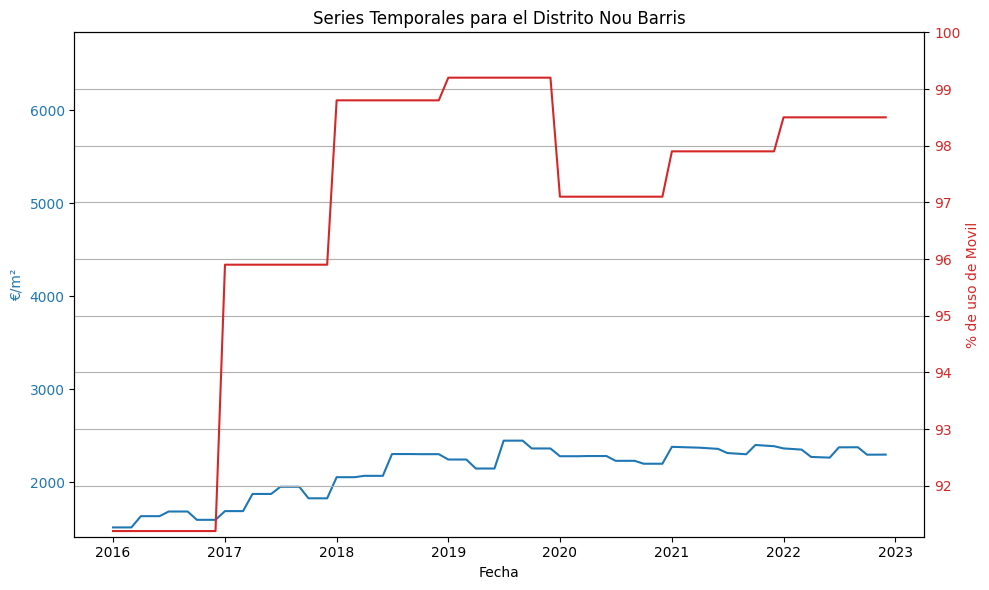

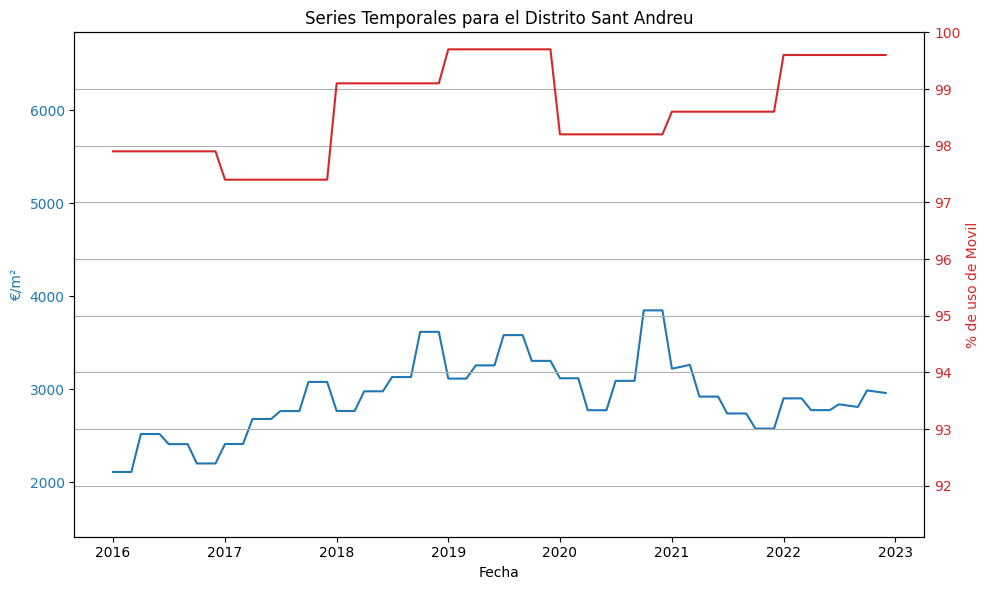

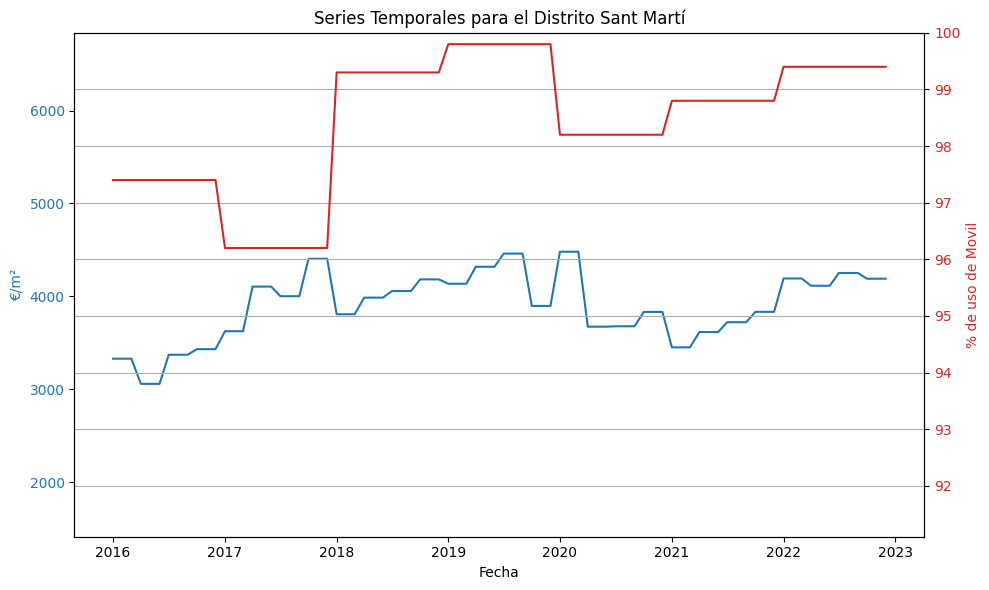

In [ ]:
# Establecer límites para los ejes y
ylim_serie1 = (df_merged['Compraventa_Unitario'].min()-100, df_merged['Compraventa_Unitario'].max()+100)  # Límites para Serie1
ylim_serie2 = (df_merged['Movil'].min()-0.1, 100)  # Límites para Serie2

#Crear un gráfico para la media de 'Compraventa_Unitario' por cada categoría, año y mes
for categoria, datos_categoria in df_merged.groupby(['Codi_Districte', 'Nom_Districte']):
    # Crear una figura y un conjunto de ejes
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Serie1 en el primer eje y (izquierda)
    color1 = 'tab:blue'
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('€/m²', color=color1)
    ax1.plot(datos_categoria.index, datos_categoria['Compraventa_Unitario'], label=f'Media de Compraventa_Unitario', color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.set_ylim(ylim_serie1)  # Establecer límites para Serie1

    # Crear un segundo eje y (derecha) para Serie2
    ax2 = ax1.twinx()
    color2 = 'tab:red'
    ax2.set_ylabel('% de uso de Movil', color=color2)
    ax2.plot(datos_categoria.index, datos_categoria['Movil'], label=f'Media de uso de Movil', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)
    ax2.set_ylim(ylim_serie2)  # Establecer límites para Serie2

    # Añadir título y leyendas
    plt.title(f'Series Temporales para el Distrito {categoria[1]}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Independientemente de la escala de las dos variables, en la grafica se puede diferenciar entre la tendencia de valor de compraventas unitario y la tendencia del % de uso de Movil. Ambas series tiene una tendencia al alza.

Con estos graficos podemos afirmar que el uso del movil esta muy extendido, mas del 99% en casi todos los distritos, y que es independiente a la serie de compraventa unitario.

###Compraventa Unitario vs indicador nº79. Automoviles personales por capita

In [ ]:
df_turisme = data[['Any', 'Trimestre', 'Mes', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Compraventa_Unitario', 'Index_Turisme']]

In [ ]:
df_turisme.head()

Any  Trimestre  Mes  Codi_Districte Nom_Districte  Codi_Barri  \
Fecha                                                                        
2014-01-01  2014          1    1               1  Ciutat Vella           1   
2014-02-01  2014          1    2               1  Ciutat Vella           1   
2014-03-01  2014          1    3               1  Ciutat Vella           1   
2014-04-01  2014          2    4               1  Ciutat Vella           1   
2014-05-01  2014          2    5               1  Ciutat Vella           1   

           Nom_Barri  Compraventa_Unitario  Index_Turisme  
Fecha                                                      
2014-01-01  el Raval                2813.0            NaN  
2014-02-01  el Raval                2813.0            NaN  
2014-03-01  el Raval                2813.0            NaN  
2014-04-01  el Raval                2948.8            NaN  
2014-05-01  el Raval                2948.8            NaN

In [ ]:
df_turisme.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8541 entries, 2014-01-01 to 2023-09-01
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Any                   8541 non-null   int64  
 1   Trimestre             8541 non-null   int64  
 2   Mes                   8541 non-null   int64  
 3   Codi_Districte        8541 non-null   int64  
 4   Nom_Districte         8541 non-null   object 
 5   Codi_Barri            8541 non-null   int64  
 6   Nom_Barri             8541 non-null   object 
 7   Compraventa_Unitario  8541 non-null   float64
 8   Index_Turisme         2628 non-null   float64
dtypes: float64(2), int64(5), object(2)
memory usage: 667.3+ KB


In [ ]:
df_turisme=df_turisme.dropna()

In [ ]:
# Calcular la media de 'Compraventa_Unitario' agrupada por categoría, año y mes
media_compraventa = df_turisme.groupby(['Codi_Districte', 'Nom_Districte','Any', 'Mes'])['Compraventa_Unitario'].mean().reset_index()

In [ ]:
# Calcular la suma de 'Index_Turisme' agrupada por categoría
media_turisme = df_turisme.groupby(['Codi_Districte', 'Nom_Districte','Any', 'Mes'])['Index_Turisme'].mean().reset_index()

In [ ]:
# Unimos los dos dataframes
df_merged = pd.merge(media_compraventa, media_turisme, how='inner', left_on=['Codi_Districte',	'Nom_Districte',	'Any',	'Mes'], right_on=['Codi_Districte',	'Nom_Districte',	'Any',	'Mes'])

In [ ]:
# Añadimos la columna de fecha y la establecemos como indice
df_merged['Fecha'] = df_merged.apply(lambda row: pd.to_datetime(f"{row[2]}-{row[3]}"), axis=1)
df_merged.set_index('Fecha', inplace=True)

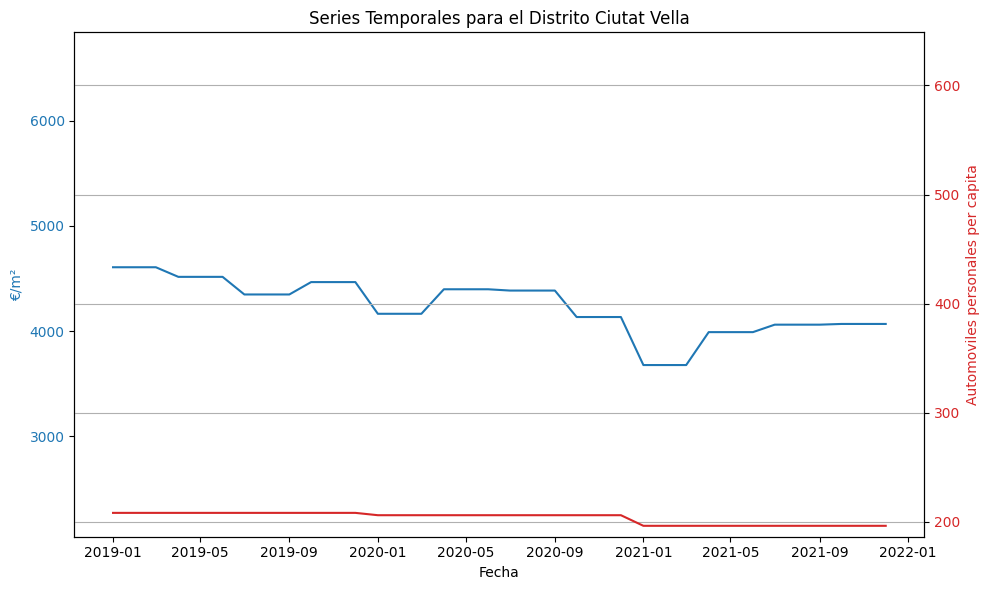

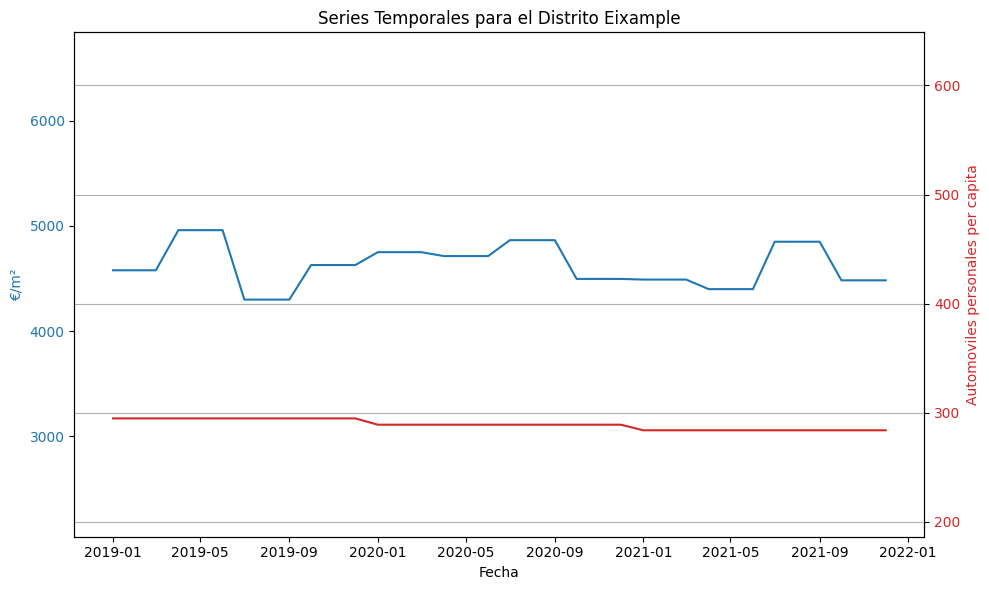

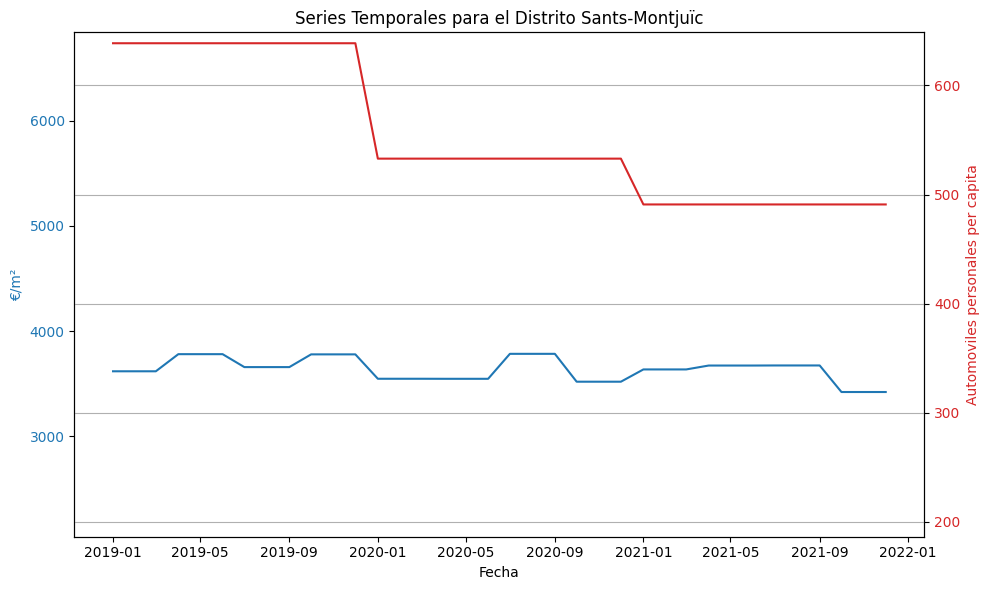

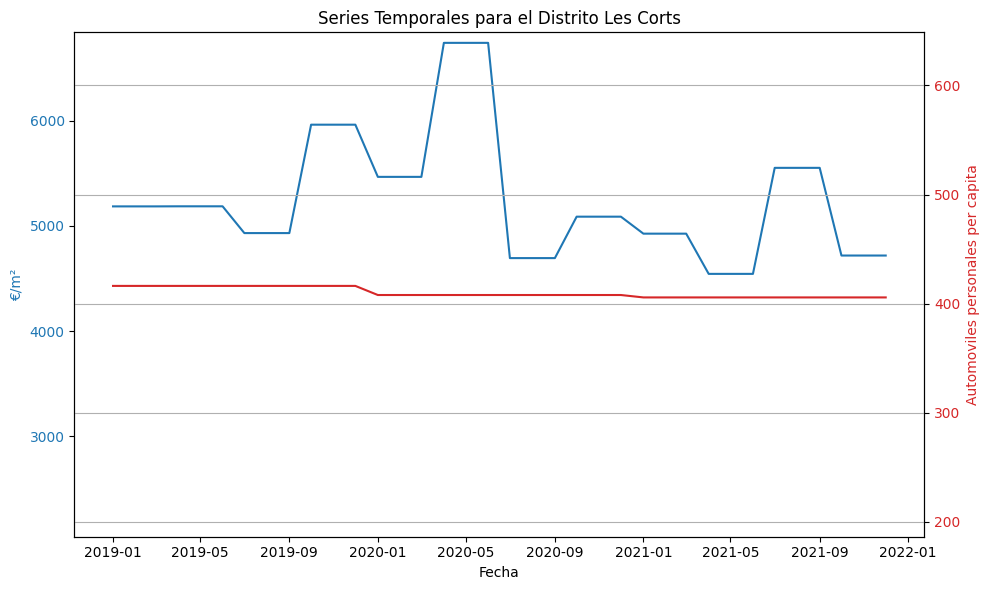

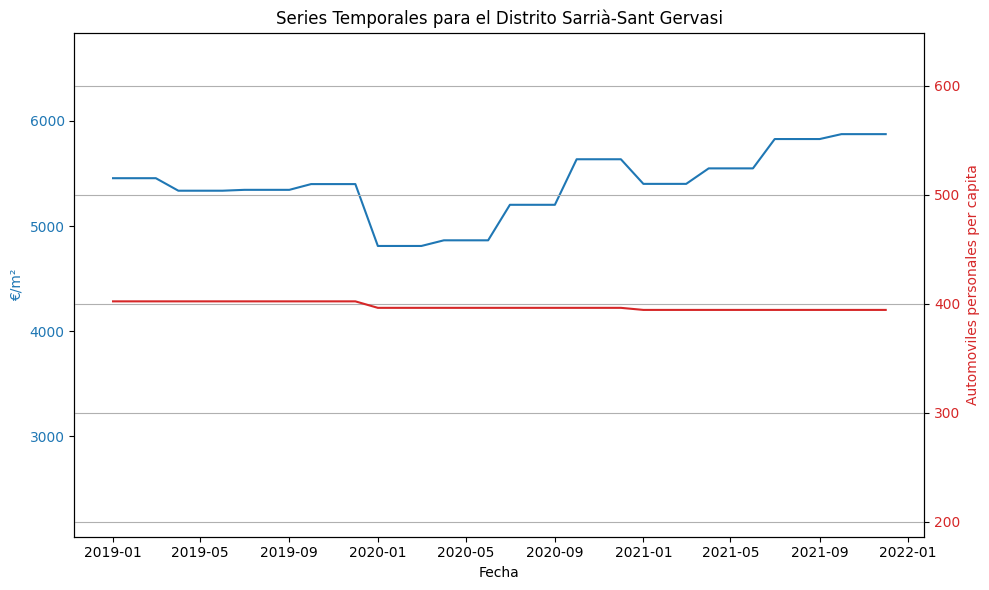

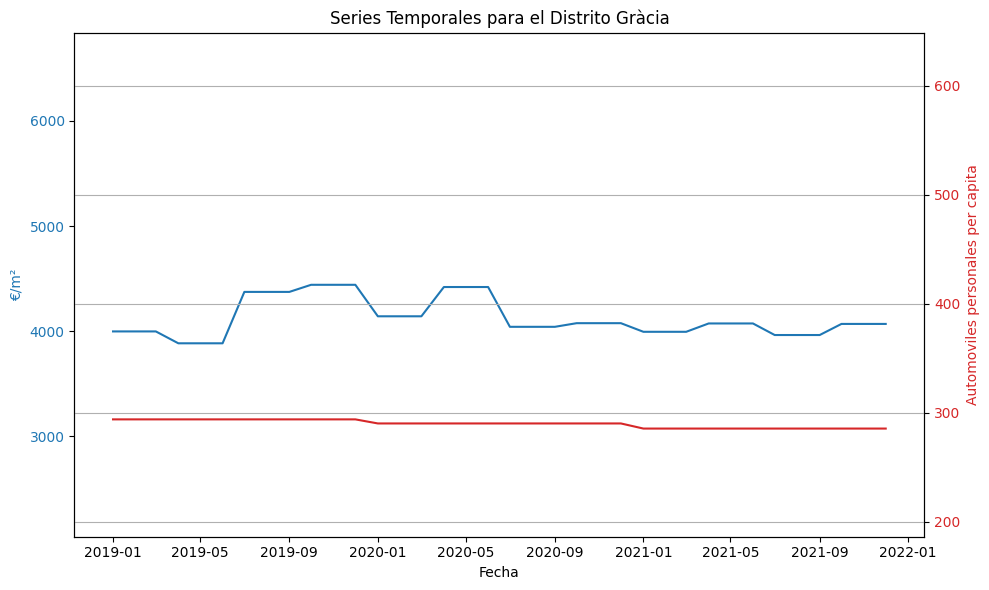

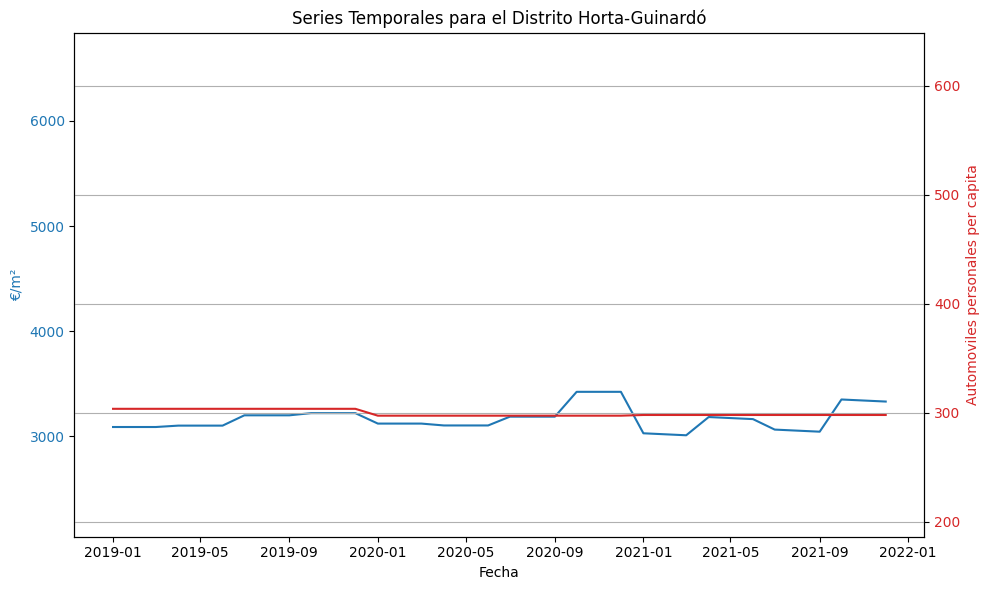

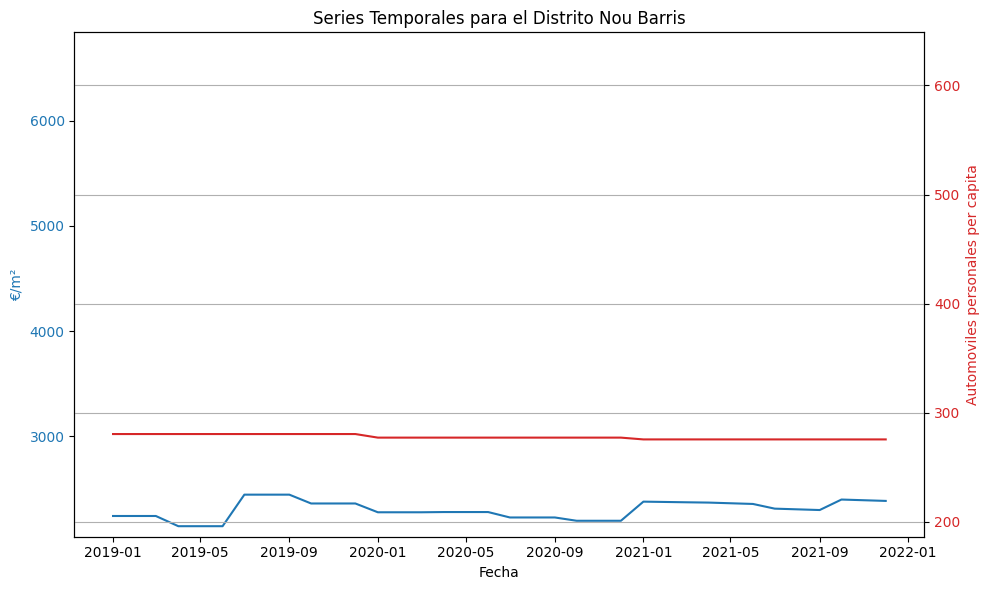

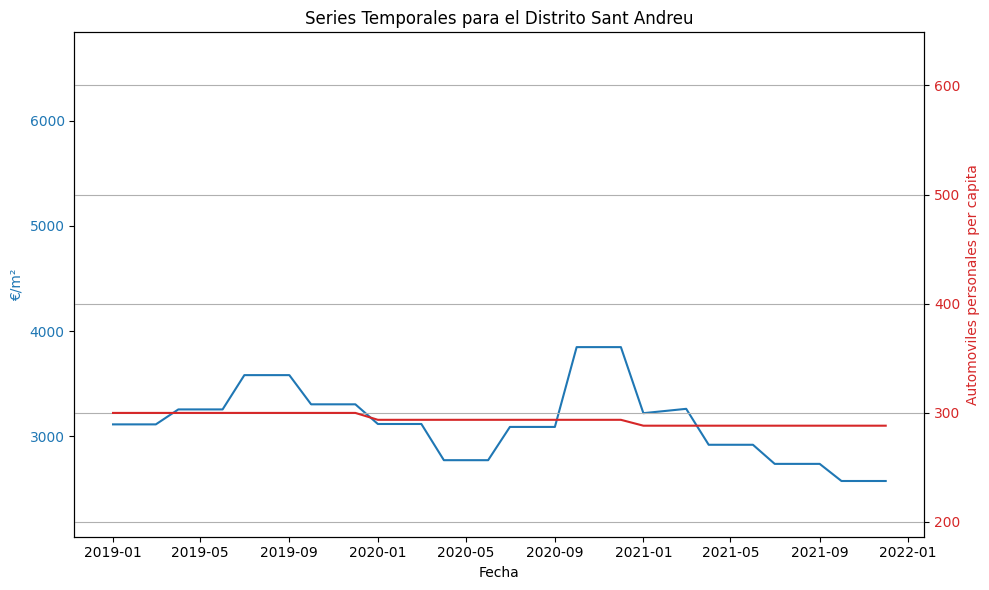

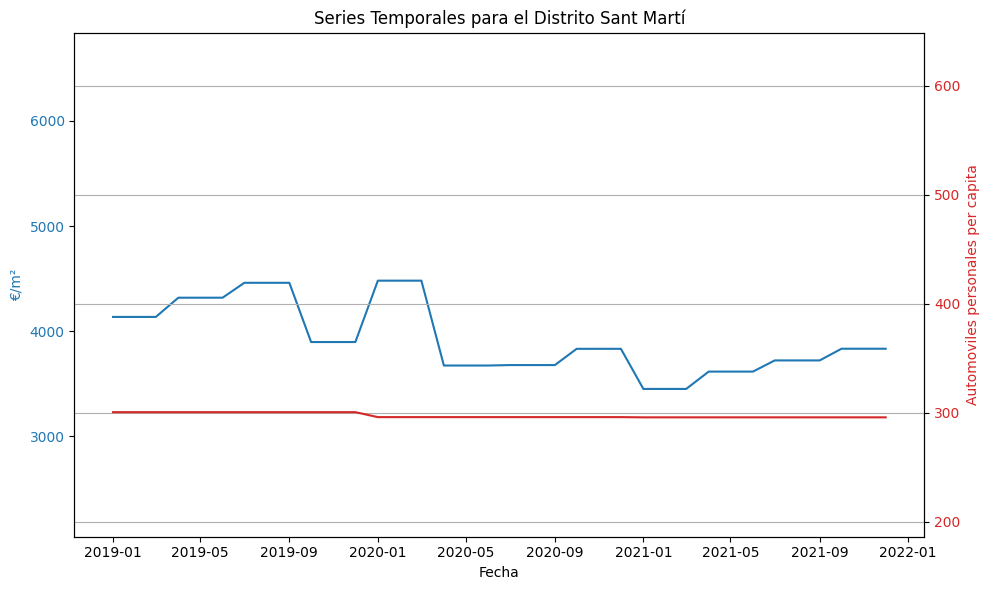

In [ ]:
# Establecer límites para los ejes y
ylim_serie1 = (df_merged['Compraventa_Unitario'].min()-100, df_merged['Compraventa_Unitario'].max()+100)  # Límites para Serie1
ylim_serie2 = (df_merged['Index_Turisme'].min()-10, df_merged['Index_Turisme'].max()+10)  # Límites para Serie2

#Crear un gráfico para la media de 'Compraventa_Unitario' por cada categoría, año y mes
for categoria, datos_categoria in df_merged.groupby(['Codi_Districte', 'Nom_Districte']):
    # Crear una figura y un conjunto de ejes
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Serie1 en el primer eje y (izquierda)
    color1 = 'tab:blue'
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('€/m²', color=color1)
    ax1.plot(datos_categoria.index, datos_categoria['Compraventa_Unitario'], label=f'Media de Compraventa_Unitario', color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.set_ylim(ylim_serie1)  # Establecer límites para Serie1

    # Crear un segundo eje y (derecha) para Serie2
    ax2 = ax1.twinx()
    color2 = 'tab:red'
    ax2.set_ylabel('Automoviles personales per capita', color=color2)
    ax2.plot(datos_categoria.index, datos_categoria['Index_Turisme'], label=f'Automoviles personales per capita', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)
    ax2.set_ylim(ylim_serie2)  # Establecer límites para Serie2

    # Añadir título y leyendas
    plt.title(f'Series Temporales para el Distrito {categoria[1]}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

###Compraventa Unitario vs indicador nº85. Superficie verde por habitante

In [ ]:
df_verde = data[['Any', 'Trimestre', 'Mes', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Compraventa_Unitario', 'm² por habitante']]

In [ ]:
df_verde.head()

Any  Trimestre  Mes  Codi_Districte Nom_Districte  Codi_Barri  \
Fecha                                                                        
2014-01-01  2014          1    1               1  Ciutat Vella           1   
2014-02-01  2014          1    2               1  Ciutat Vella           1   
2014-03-01  2014          1    3               1  Ciutat Vella           1   
2014-04-01  2014          2    4               1  Ciutat Vella           1   
2014-05-01  2014          2    5               1  Ciutat Vella           1   

           Nom_Barri  Compraventa_Unitario  m² por habitante  
Fecha                                                         
2014-01-01  el Raval                2813.0               6.2  
2014-02-01  el Raval                2813.0               6.2  
2014-03-01  el Raval                2813.0               6.2  
2014-04-01  el Raval                2948.8               6.2  
2014-05-01  el Raval                2948.8               6.2

In [ ]:
df_verde.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8541 entries, 2014-01-01 to 2023-09-01
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Any                   8541 non-null   int64  
 1   Trimestre             8541 non-null   int64  
 2   Mes                   8541 non-null   int64  
 3   Codi_Districte        8541 non-null   int64  
 4   Nom_Districte         8541 non-null   object 
 5   Codi_Barri            8541 non-null   int64  
 6   Nom_Barri             8541 non-null   object 
 7   Compraventa_Unitario  8541 non-null   float64
 8   m² por habitante      7008 non-null   float64
dtypes: float64(2), int64(5), object(2)
memory usage: 667.3+ KB


In [ ]:
df_verde=df_verde.dropna()

In [ ]:
# Calcular la media de 'Compraventa_Unitario' agrupada por categoría, año y mes
media_compraventa = df_verde.groupby(['Codi_Districte', 'Nom_Districte','Any', 'Mes'])['Compraventa_Unitario'].mean().reset_index()

In [ ]:
# Calcular la suma de 'm² por habitante' agrupada por categoría
media_verde = df_verde.groupby(['Codi_Districte', 'Nom_Districte','Any', 'Mes'])['m² por habitante'].mean().reset_index()

In [ ]:
# Unimos los dos dataframes
df_merged = pd.merge(media_compraventa, media_verde, how='inner', left_on=['Codi_Districte',	'Nom_Districte',	'Any',	'Mes'], right_on=['Codi_Districte',	'Nom_Districte',	'Any',	'Mes'])

In [ ]:
# Añadimos la columna de fecha y la establecemos como indice
df_merged['Fecha'] = df_merged.apply(lambda row: pd.to_datetime(f"{row[2]}-{row[3]}"), axis=1)
df_merged.set_index('Fecha', inplace=True)

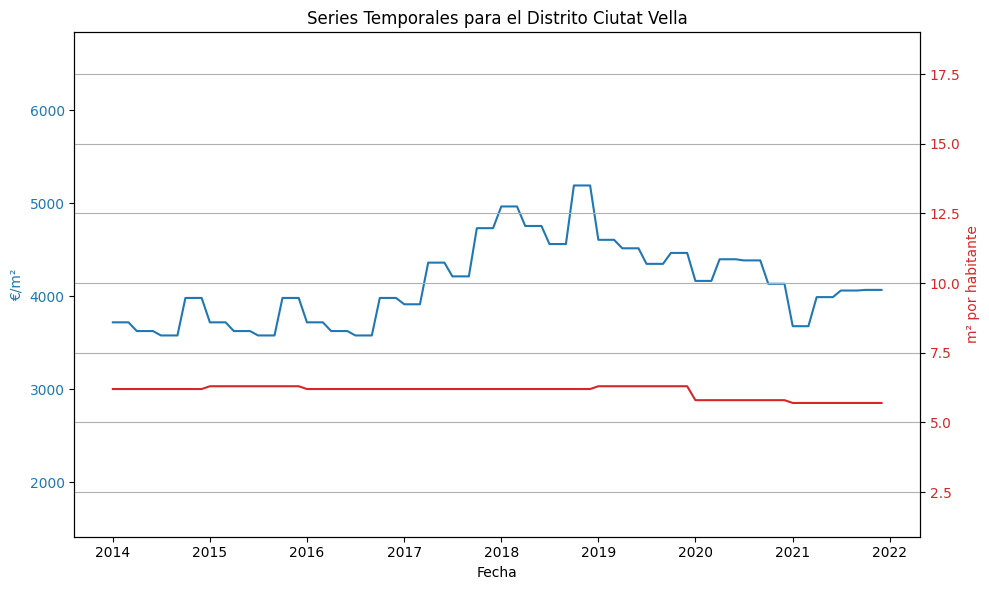

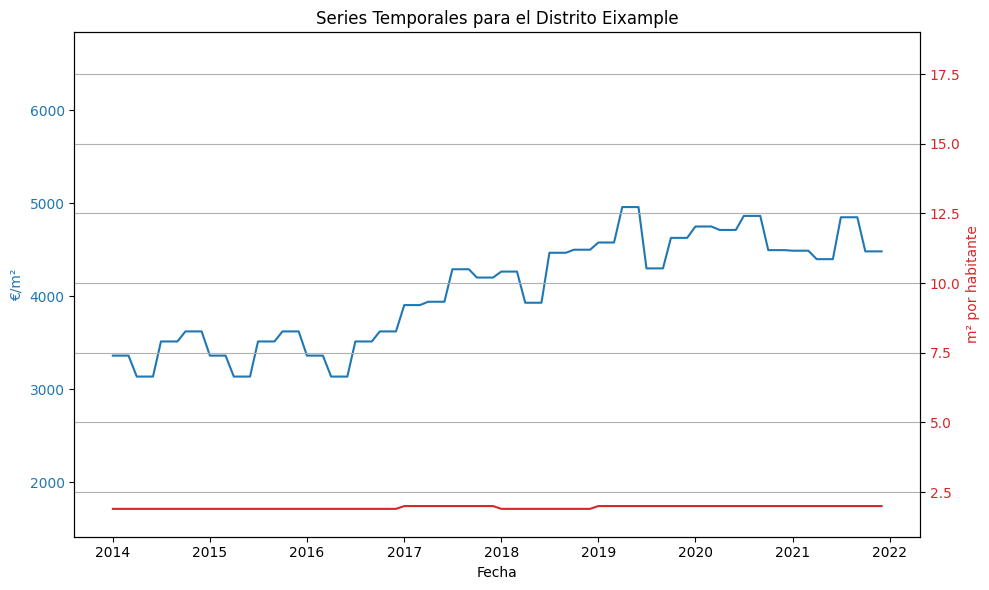

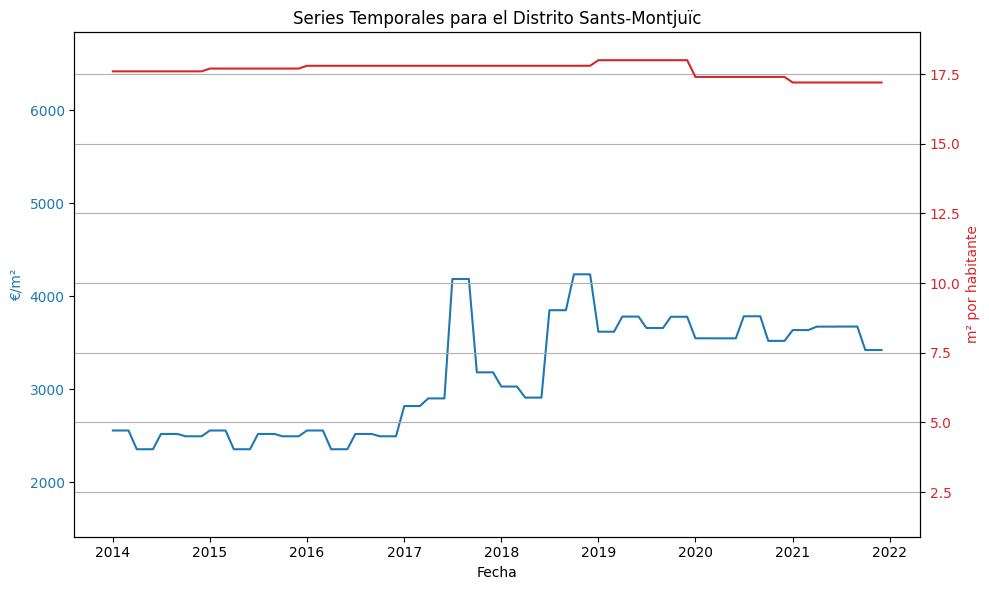

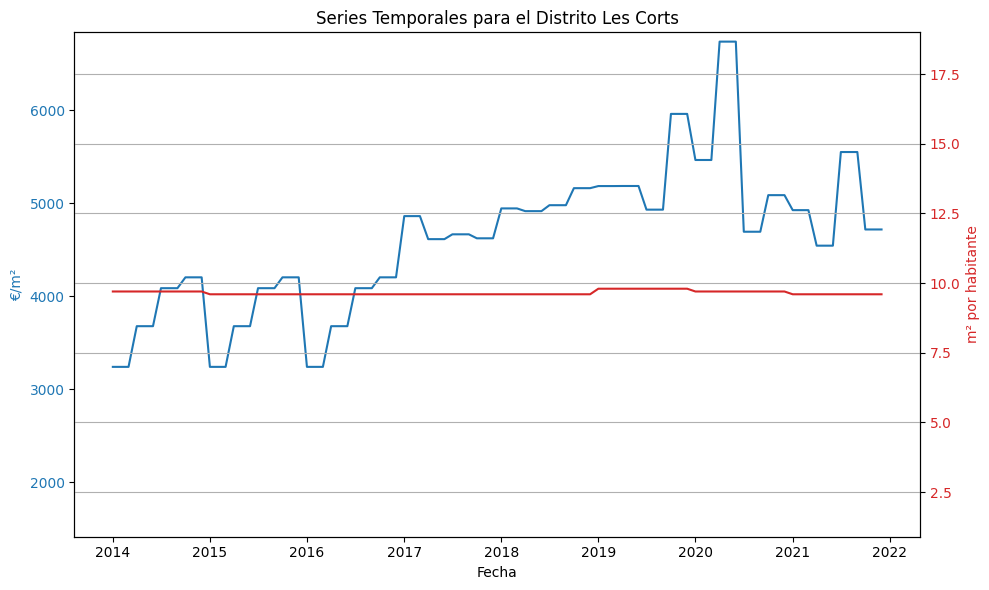

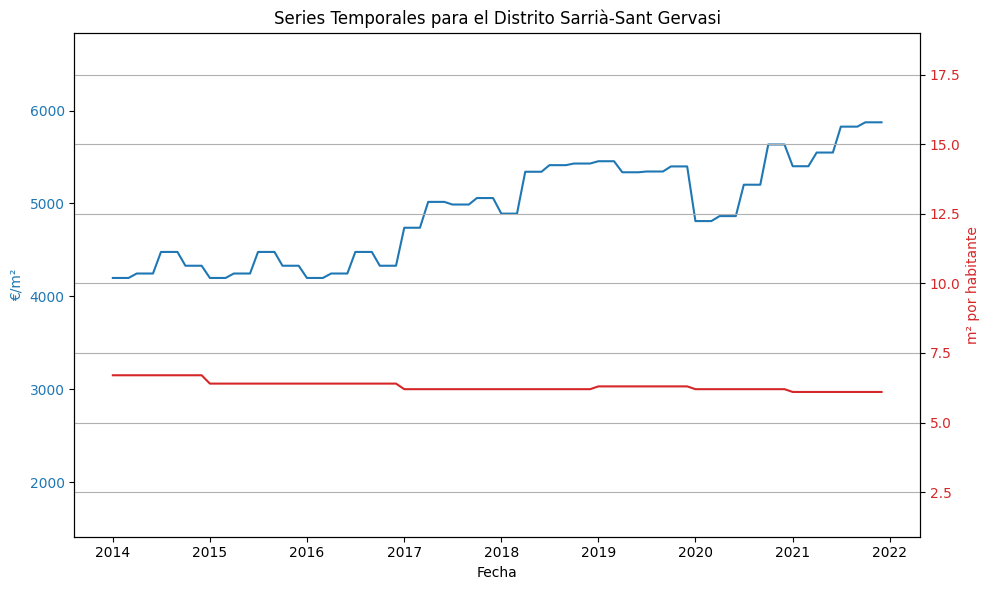

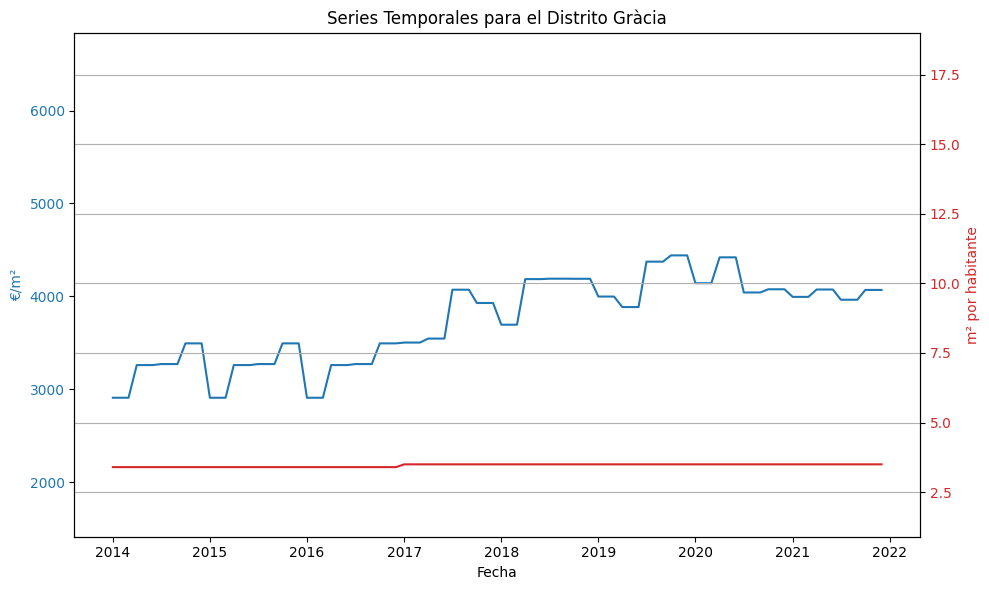

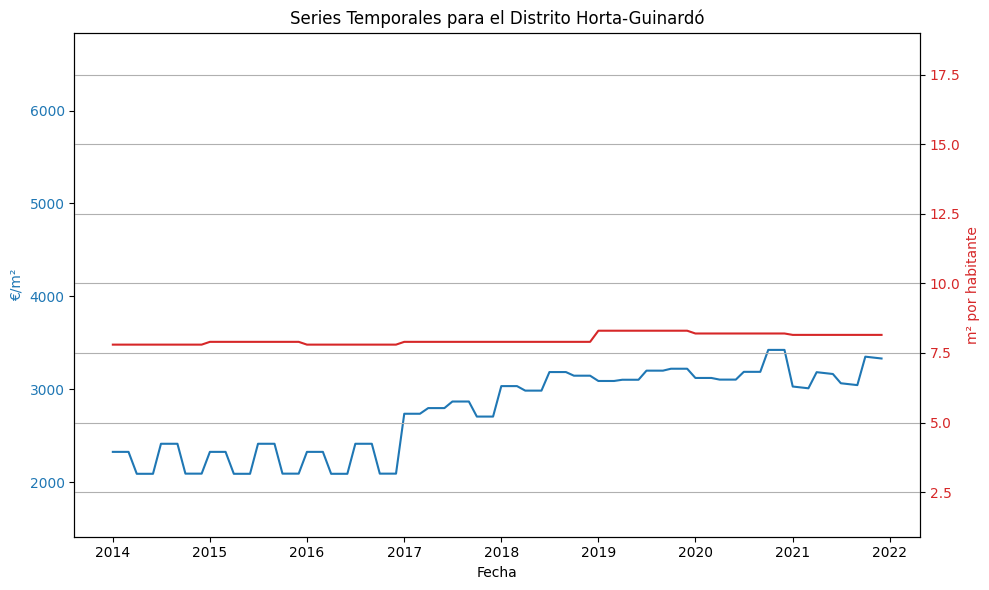

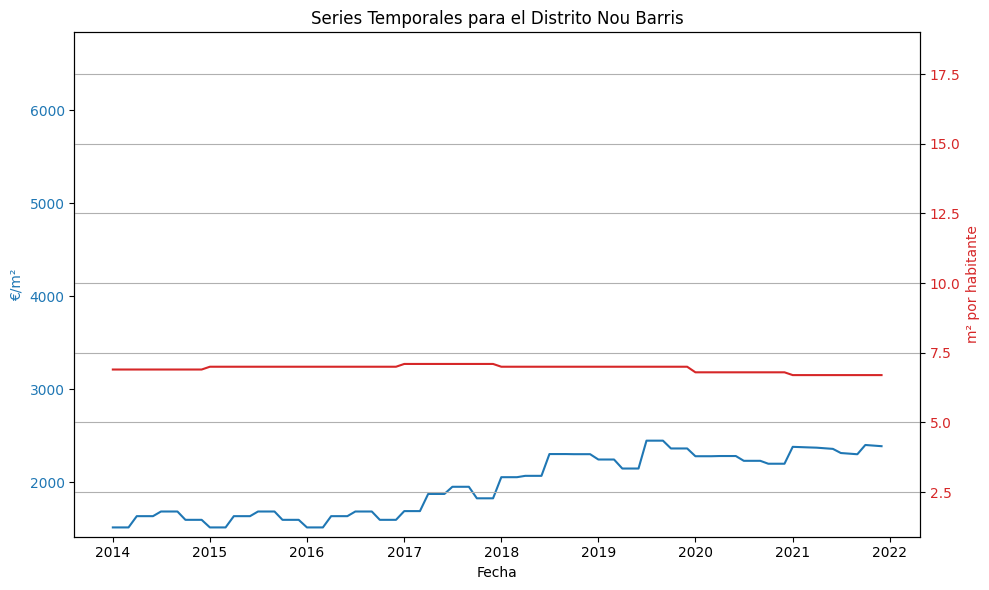

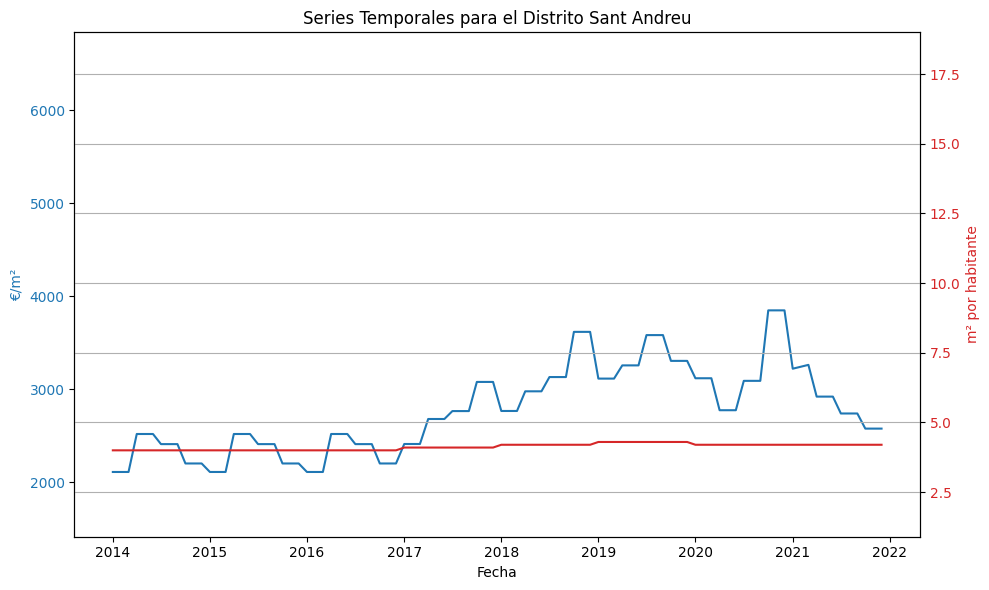

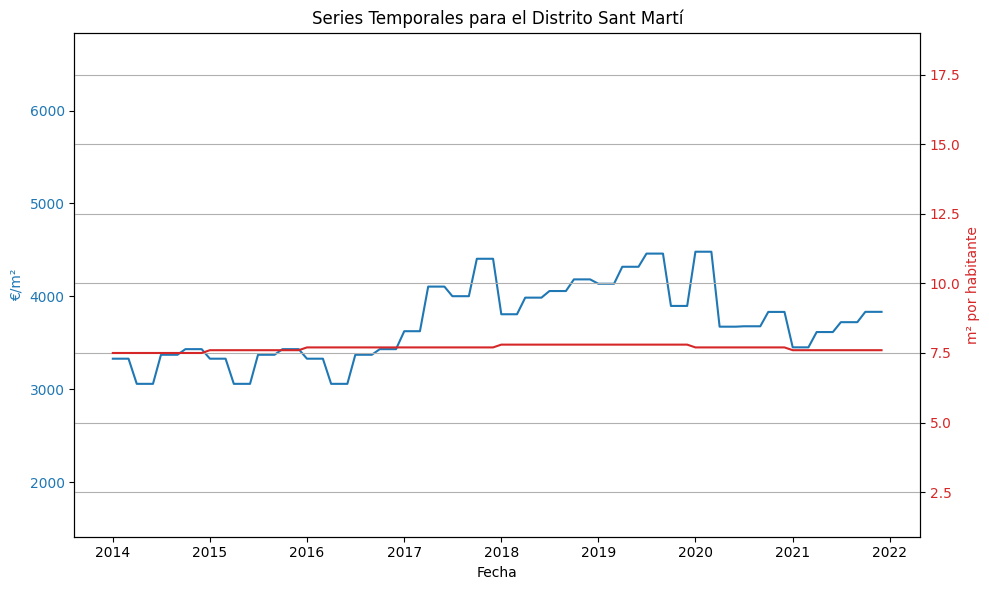

In [ ]:
# Establecer límites para los ejes y
ylim_serie1 = (df_merged['Compraventa_Unitario'].min()-100, df_merged['Compraventa_Unitario'].max()+100)  # Límites para Serie1
ylim_serie2 = (df_merged['m² por habitante'].min()-1, df_merged['m² por habitante'].max()+1)  # Límites para Serie2

#Crear un gráfico para la media de 'Compraventa_Unitario' por cada categoría, año y mes
for categoria, datos_categoria in df_merged.groupby(['Codi_Districte', 'Nom_Districte']):
    # Crear una figura y un conjunto de ejes
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Serie1 en el primer eje y (izquierda)
    color1 = 'tab:blue'
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('€/m²', color=color1)
    ax1.plot(datos_categoria.index, datos_categoria['Compraventa_Unitario'], label=f'Media de Compraventa_Unitario', color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.set_ylim(ylim_serie1)  # Establecer límites para Serie1

    # Crear un segundo eje y (derecha) para Serie2
    ax2 = ax1.twinx()
    color2 = 'tab:red'
    ax2.set_ylabel('m² por habitante', color=color2)
    ax2.plot(datos_categoria.index, datos_categoria['m² por habitante'], label=f'Superficie verde por habitante', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)
    ax2.set_ylim(ylim_serie2)  # Establecer límites para Serie2

    # Añadir título y leyendas
    plt.title(f'Series Temporales para el Distrito {categoria[1]}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Independientemente de la escala de las dos variables, en la grafica se puede diferenciar entre la tendencia de valor de compraventas unitario y la tendencia de los m² por habitante de zonas verdes.

En la serie temporal de zonas verdes, podemos identificar como 3 grupos de distritos:
- los que estan por debajo de los 5m² por habitante de zonas verdes
- los que estan en 5 y 10 m² de zonas verdes
- y el unico que tiene alrededor de 17.5m²  de zonas verdes

Independientemente del grupo en el que estemos, no se aprecia ninguna relacion con el valor de compraventa unitario

##Conclusiones

Se ha demostrado como el posterior Análisis de Datos (Forecasting) no es posible realizarlo con todos los indicadores estudiados más la variable de compraventa unitario por falta de datos.

El realizar el posterior Analisis de Datos (Forecasting) por par de variables es la forma más fiable de obtener resultados coherentes ya que, como hemos visto en la exploracion, cada indicador tiene realidades muy diversas e inconexas con la variable de estudio.

Dada las caracteristicas del conjunto de datos obtenido, compuestos de  11 series temporales referentes a los indicadores, mas otra referente a la compraventa unitario, y la realidad de la ciudad de Barcelona con 10 distritos y 73 barrios, se hace inviable en tiempo poder analizar cada una de las combinaciones. Por poner un ejemplo si quisieramos analizar los 10 distritos, para los 11 indicadores, se deberian realizar 110 analisis.

Es por ello, que por tal de simplificar y acortar tiempos, se analizaran 2 realidades diferentes de la ciudad de Barcelona, como son el distrito de Sarrià-Sant Gervasi y el distrito de Nou Barris. Para estos dos distritos se aplicaran tecnicas de Machine Learning, como el Forecasting. Se aplicaran los modelos de VAR y VARMAX para predecir comportamientos futuros.

